In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#data=pd.read_csv('/Users/reza/Desktop/NRC_project/data/Testset_1_T1000K.csv')
import glob
import os

num_input = 3
epss = 0
removee = 0
#data_files=glob.glob('/Users/reza/Desktop/NRC_project/data/Kinetics_sample/*.xlsx')
#data_files=glob.glob('/Users/reza/Desktop/NRC_project/data/data/*.xlsx')
train_files=glob.glob('/home/ali/Downloads/Codes/nrc/data/train/*.xlsx')

print('num files:',len(train_files))
#print('files names:',train_files)


train_data=pd.read_excel(train_files[0])
#print(train_data)
for i in train_files[1:]:
    each_data=pd.read_excel(i)
    train_data=pd.concat([train_data, each_data], ignore_index=True)
    
#data.drop(labels='Time [us]',inplace=True,axis=1)
#test_files=glob.glob('/Users/reza/Desktop/NRC_project/data/data/Testset_3_T_1400K.xlsx')
test_data=pd.read_excel(train_files[0])

def creating_datasets(dataa,num_input):
    #num_input = 3
    data=dataa.copy()
    data.drop(labels='Time [us]',inplace=True,axis=1)
    data = data.loc[removee:,:]
    X_dataset=data.drop(labels=len(data)-1,axis=0,inplace=False)
    Y_dataset=data.loc[num_input:,:]
    Y_dataset.reset_index(inplace=True)
    Y_dataset.drop(labels='index',axis=1,inplace=True)
    print('X_dataset.shape:',X_dataset.shape)
    
    X_dataset_numpy = X_dataset.to_numpy()
    X_new = np.ones((len(X_dataset_numpy)-(num_input-1),num_input*13))
    print('len(X_dataset):',X_dataset_numpy.shape)
    for i in range(len(X_dataset)-(num_input-1)):
        X_new[i,:] = X_dataset_numpy[i:i+num_input,:].flatten()
    X_new = pd.DataFrame(X_new)
    print('X_new.shape:',X_new.shape)

    return [X_new, Y_dataset]

X_train_dataset, Y_train_dataset = creating_datasets(train_data,num_input)
#X_test_dataset, Y_test_dataset = creating_datasets(test_data)
    

#X_dataset=data.drop(labels=len(data)-1,
            #axis=0,
            #inplace=False)
#print('X_dataset.shape:',X_dataset.shape)

#Y_dataset=data.loc[1:,:]
#Y_dataset.reset_index(inplace=True)

#Y_dataset.drop(labels='index',axis=1,inplace=True )
#X_train_dataset=X_dataset.sample(frac=0.9,random_state=0)

#X_test_dataset=X_dataset.drop(X_train_dataset.index)


#Y_train_dataset=Y_dataset.loc[X_train_dataset.index,: ]
#Y_test_dataset=Y_dataset.loc[X_test_dataset.index,:]


#print('X_train_dataset.shape:',X_train_dataset.shape)
#print('Y_train_dataset.shape:',Y_train_dataset.shape)

def label(feature):
    if type(feature)==str and feature in list(Y_train_dataset.columns):
        train_label=Y_train_dataset.pop(feature)
        test_label=Y_test_dataset.pop(feature)
        return train_label, test_label
    else:
        return print('inserted feature is not valid') 
    
    
normalizer=layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train_dataset))
print('finish')
#first=np.array(X_train_dataset[:5])
#print('first example:', first)
#print()
#print('Normalized:', normalizer(first).numpy())

2022-03-24 00:33:41.829222: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-24 00:33:41.829249: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


num files: 5


/tmp/ipykernel_79795/2529897800.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_dataset.drop(labels='index',axis=1,inplace=True)
2022-03-24 00:33:44.378525: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-24 00:33:44.378551: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-24 00:33:44.378568: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ali-Inspiron-5570): /proc/driver/nvidia/version does not exist
2022-03-24 00:33:44.378748: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with on

X_dataset.shape: (5999, 13)
len(X_dataset): (5999, 13)
X_new.shape: (5997, 39)
finish


In [2]:
def creating_test_datasets(data,num_input):
    #num_input = 3
    dataa=data.copy()
    dataa.drop(labels='Time [us]',inplace=True,axis=1)
    dataa = dataa.loc[removee:,:]
    X_dataset=dataa.drop(labels=len(dataa)-1,axis=0,inplace=False)
    Y_dataset=dataa.loc[num_input:,:]
    Y_dataset.reset_index(inplace=True)
    Y_dataset.drop(labels='index',axis=1,inplace=True)
    print('X_dataset.shape:',X_dataset.shape)
    
    X_dataset_numpy = X_dataset.to_numpy()
    X_new = np.ones((len(X_dataset_numpy)-(num_input-1),num_input*13))
    print('len(X_dataset):',X_dataset_numpy.shape)
    for i in range(len(X_dataset)-(num_input-1)):
        X_new[i,:] = X_dataset_numpy[i:i+num_input,:].flatten()
    X_new = pd.DataFrame(X_new)
    print('X_new.shape:',X_new.shape)

    return [X_new, Y_dataset]
test_data=pd.read_excel(train_files[0])
X_test_dataset, Y_test_dataset = creating_test_datasets(test_data, num_input)

X_dataset.shape: (1199, 13)
len(X_dataset): (1199, 13)
X_new.shape: (1197, 39)


/tmp/ipykernel_79795/3086849176.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_dataset.drop(labels='index',axis=1,inplace=True)


In [3]:
X_train_dataset.shape

(5997, 39)

In [4]:
Y_test_dataset.shape

(1197, 13)

In [5]:
T_train_label, T_test_label=label('Temperature [K]')
H2_train_label, H2_test_label=label('H2 fraction')
O2_train_label, O2_test_label=label('O2 fraction')
OH_train_label, OH_test_label=label('OH fraction')
H_train_label, H_test_label=label('H fraction')
H2O_train_label, H2O_test_label=label('H2O fraction')
O_train_label, O_test_label=label('O fraction')
HO2_train_label, HO2_test_label=label('HO2 fraction')
H2O2_train_label, H2O2_test_label=label('H2O2 fraction')
N2_train_label, N2_test_label=label('N2 fraction')
N_train_label, N_test_label=label('N fraction')
NO_train_label, NO_test_label=label('NO fraction')
NO2_train_label, NO2_test_label=label('NO2 fraction')

In [6]:
def Sig_model():
    expert_model=keras.Sequential([normalizer,
                         layers.Dense(64,activation='relu',kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)),
                                   layers.LayerNormalization(),
                         layers.Dense(32,activation='relu',kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)),
                                   layers.LayerNormalization(),
                         layers.Dense(1, activation='sigmoid')
                         ])
    
    return expert_model
def get_model():
    model=keras.Sequential([normalizer,
                         layers.Dense(64,activation='relu',kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)),
                                   layers.LayerNormalization(),
                         layers.Dense(32,activation='relu',kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)),
                                   layers.LayerNormalization(),
                         layers.Dense(1)
                         ])
    
    return model
    

In [7]:
model_T=get_model()
model_H2=Sig_model()
model_O2=Sig_model()
model_OH=Sig_model()
model_H=Sig_model()
model_H2O=Sig_model()
model_O=Sig_model()
model_HO2=Sig_model()
model_H2O2=Sig_model()
model_N2=Sig_model()
model_N=Sig_model()
model_NO=Sig_model()
model_NO2=Sig_model()


In [8]:
inputs=keras.Input(shape=(num_input*13,))


T=model_T(inputs)
H2=model_H2(inputs)
O2=model_O2(inputs)
OH=model_OH(inputs)
H=model_H(inputs)
H2O=model_H2O(inputs)
O=model_O(inputs)
HO2=model_HO2(inputs)
H2O2=model_H2O2(inputs)
N2=model_N2(inputs)
N=model_N(inputs)
NO=model_NO(inputs)
NO2=model_NO2(inputs)

final_model=keras.Model(inputs=inputs,outputs=[T,H2,O2,OH,H,H2O,O,HO2,H2O2,N2,N,NO,NO2])

final_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 39)]         0           []                               
                                                                                                  
 sequential (Sequential)        (None, 1)            4944        ['input_1[0][0]']                
                                                                                                  
 sequential_1 (Sequential)      (None, 1)            4944        ['input_1[0][0]']                
                                                                                                  
 sequential_2 (Sequential)      (None, 1)            4944        ['input_1[0][0]']                
                                                                                              

In [9]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=1000,
    decay_rate=0.9)

In [10]:
from keras import backend as K

def MSE(y_true, y_pred):
        return K.mean(K.square(y_pred - y_true))
def RMSLE(y_true, y_pred):
        return K.sqrt(K.mean(K.square(K.log(y_pred) - K.log(y_true))))
def final_loss(y_true, y_pred):
    return 0.4*(K.mean(K.square(K.log(y_pred) - K.log(y_true)))) + 0.6*(K.mean(K.square(y_pred - y_true)))
def expert_loss(y_true, y_pred):
    return K.mean(K.square(K.log(y_pred) - K.log(y_true))) + K.mean(K.square(y_pred - y_true))+K.mean(K.square(K.abs(y_pred-y_true)+K.log(y_pred/y_true)))
def log_loss(y_true,y_pred):
    return K.mean(K.square(K.abs(y_pred-y_true)+K.log(y_pred/y_true)))


def alaki_loss(y_true, y_pred):
    return K.mean(K.square(K.log(y_pred) - K.log(y_true)))

#new_model=tf.keras.models.load_model('/home/ali/Downloads/Codes/nrc/data/model_temporal1',compile=False)
#final_model = new_model
final_model.compile(loss= [tf.keras.losses.MeanAbsoluteError(),tf.keras.losses.MeanAbsoluteError(),tf.keras.losses.MeanAbsoluteError(),
                          tf.keras.losses.MeanAbsoluteError(),tf.keras.losses.MeanAbsoluteError(),log_loss,
                          tf.keras.losses.MeanAbsoluteError(),tf.keras.losses.MeanAbsoluteError(),tf.keras.losses.MeanAbsoluteError(),
                          tf.keras.losses.MeanAbsoluteError(),tf.keras.losses.MeanAbsoluteError(),tf.keras.losses.MeanAbsoluteError(),
                          tf.keras.losses.MeanAbsoluteError()],
                optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule, beta_1=0.9, beta_2=0.999, epsilon=3e-04),
                   metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [11]:
history=final_model.fit(X_train_dataset,[T_train_label,H2_train_label,O2_train_label, OH_train_label, H_train_label
                                        ,H2O_train_label,O_train_label, HO2_train_label, H2O2_train_label, N2_train_label
                                        ,N_train_label, NO_train_label, NO2_train_label],
                        batch_size=100,validation_split=0.2,
                    verbose=2,epochs=1000)

Epoch 1/1000
48/48 - 9s - loss: 2455.4641 - sequential_loss: 2417.7158 - sequential_1_loss: 0.0336 - sequential_2_loss: 0.0363 - sequential_3_loss: 0.0347 - sequential_4_loss: 0.0255 - sequential_5_loss: 6.2610 - sequential_6_loss: 0.0146 - sequential_7_loss: 0.0226 - sequential_8_loss: 0.0263 - sequential_9_loss: 0.0829 - sequential_10_loss: 0.0132 - sequential_11_loss: 0.0231 - sequential_12_loss: 0.0246 - sequential_root_mean_squared_error: 2499.1357 - sequential_1_root_mean_squared_error: 0.0672 - sequential_2_root_mean_squared_error: 0.1241 - sequential_3_root_mean_squared_error: 0.1198 - sequential_4_root_mean_squared_error: 0.0908 - sequential_5_root_mean_squared_error: 0.0830 - sequential_6_root_mean_squared_error: 0.0597 - sequential_7_root_mean_squared_error: 0.1042 - sequential_8_root_mean_squared_error: 0.1257 - sequential_9_root_mean_squared_error: 0.1325 - sequential_10_root_mean_squared_error: 0.0660 - sequential_11_root_mean_squared_error: 0.1053 - sequential_12_root_me

Epoch 5/1000
48/48 - 0s - loss: 1737.6241 - sequential_loss: 1734.5500 - sequential_1_loss: 0.0058 - sequential_2_loss: 0.0038 - sequential_3_loss: 0.0036 - sequential_4_loss: 0.0046 - sequential_5_loss: 1.4932 - sequential_6_loss: 0.0020 - sequential_7_loss: 3.0683e-05 - sequential_8_loss: 2.7602e-05 - sequential_9_loss: 0.0073 - sequential_10_loss: 2.5282e-05 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.5944e-05 - sequential_root_mean_squared_error: 1848.4153 - sequential_1_root_mean_squared_error: 0.0133 - sequential_2_root_mean_squared_error: 0.0104 - sequential_3_root_mean_squared_error: 0.0046 - sequential_4_root_mean_squared_error: 0.0069 - sequential_5_root_mean_squared_error: 0.0408 - sequential_6_root_mean_squared_error: 0.0026 - sequential_7_root_mean_squared_error: 3.1424e-05 - sequential_8_root_mean_squared_error: 2.7699e-05 - sequential_9_root_mean_squared_error: 0.0091 - sequential_10_root_mean_squared_error: 2.5380e-05 - sequential_11_root_mean_squared_error: 0.

Epoch 9/1000
48/48 - 0s - loss: 369.3152 - sequential_loss: 364.4137 - sequential_1_loss: 0.0067 - sequential_2_loss: 0.0058 - sequential_3_loss: 0.0030 - sequential_4_loss: 0.0040 - sequential_5_loss: 1.6487 - sequential_6_loss: 0.0020 - sequential_7_loss: 1.4850e-05 - sequential_8_loss: 1.4067e-05 - sequential_9_loss: 0.0048 - sequential_10_loss: 1.2287e-05 - sequential_11_loss: 0.0011 - sequential_12_loss: 1.3698e-05 - sequential_root_mean_squared_error: 434.4211 - sequential_1_root_mean_squared_error: 0.0164 - sequential_2_root_mean_squared_error: 0.0182 - sequential_3_root_mean_squared_error: 0.0037 - sequential_4_root_mean_squared_error: 0.0063 - sequential_5_root_mean_squared_error: 0.0343 - sequential_6_root_mean_squared_error: 0.0028 - sequential_7_root_mean_squared_error: 1.8413e-05 - sequential_8_root_mean_squared_error: 1.4101e-05 - sequential_9_root_mean_squared_error: 0.0064 - sequential_10_root_mean_squared_error: 1.2338e-05 - sequential_11_root_mean_squared_error: 0.001

Epoch 13/1000
48/48 - 0s - loss: 21.4619 - sequential_loss: 16.7821 - sequential_1_loss: 0.0059 - sequential_2_loss: 0.0028 - sequential_3_loss: 0.0025 - sequential_4_loss: 0.0029 - sequential_5_loss: 1.2077 - sequential_6_loss: 0.0023 - sequential_7_loss: 8.8027e-06 - sequential_8_loss: 8.5890e-06 - sequential_9_loss: 0.0038 - sequential_10_loss: 7.2950e-06 - sequential_11_loss: 0.0011 - sequential_12_loss: 8.7412e-06 - sequential_root_mean_squared_error: 63.6470 - sequential_1_root_mean_squared_error: 0.0143 - sequential_2_root_mean_squared_error: 0.0080 - sequential_3_root_mean_squared_error: 0.0032 - sequential_4_root_mean_squared_error: 0.0055 - sequential_5_root_mean_squared_error: 0.0332 - sequential_6_root_mean_squared_error: 0.0031 - sequential_7_root_mean_squared_error: 1.5950e-05 - sequential_8_root_mean_squared_error: 8.6233e-06 - sequential_9_root_mean_squared_error: 0.0050 - sequential_10_root_mean_squared_error: 7.3609e-06 - sequential_11_root_mean_squared_error: 0.0016 

Epoch 17/1000
48/48 - 0s - loss: 19.4221 - sequential_loss: 14.5435 - sequential_1_loss: 0.0055 - sequential_2_loss: 0.0024 - sequential_3_loss: 0.0023 - sequential_4_loss: 0.0027 - sequential_5_loss: 1.4010 - sequential_6_loss: 0.0014 - sequential_7_loss: 5.9520e-06 - sequential_8_loss: 5.7603e-06 - sequential_9_loss: 0.0050 - sequential_10_loss: 4.7666e-06 - sequential_11_loss: 0.0011 - sequential_12_loss: 6.1363e-06 - sequential_root_mean_squared_error: 64.8288 - sequential_1_root_mean_squared_error: 0.0143 - sequential_2_root_mean_squared_error: 0.0077 - sequential_3_root_mean_squared_error: 0.0031 - sequential_4_root_mean_squared_error: 0.0053 - sequential_5_root_mean_squared_error: 0.0340 - sequential_6_root_mean_squared_error: 0.0019 - sequential_7_root_mean_squared_error: 1.5804e-05 - sequential_8_root_mean_squared_error: 5.8044e-06 - sequential_9_root_mean_squared_error: 0.0067 - sequential_10_root_mean_squared_error: 4.8603e-06 - sequential_11_root_mean_squared_error: 0.0016 

Epoch 21/1000
48/48 - 0s - loss: 16.6169 - sequential_loss: 12.4409 - sequential_1_loss: 0.0041 - sequential_2_loss: 0.0036 - sequential_3_loss: 0.0033 - sequential_4_loss: 0.0043 - sequential_5_loss: 1.1628 - sequential_6_loss: 0.0015 - sequential_7_loss: 5.2133e-06 - sequential_8_loss: 4.1091e-06 - sequential_9_loss: 0.0041 - sequential_10_loss: 3.3923e-06 - sequential_11_loss: 0.0011 - sequential_12_loss: 4.6087e-06 - sequential_root_mean_squared_error: 63.7531 - sequential_1_root_mean_squared_error: 0.0149 - sequential_2_root_mean_squared_error: 0.0125 - sequential_3_root_mean_squared_error: 0.0038 - sequential_4_root_mean_squared_error: 0.0076 - sequential_5_root_mean_squared_error: 0.0254 - sequential_6_root_mean_squared_error: 0.0020 - sequential_7_root_mean_squared_error: 1.5941e-05 - sequential_8_root_mean_squared_error: 4.1459e-06 - sequential_9_root_mean_squared_error: 0.0059 - sequential_10_root_mean_squared_error: 3.5165e-06 - sequential_11_root_mean_squared_error: 0.0016 

Epoch 25/1000
48/48 - 0s - loss: 14.8854 - sequential_loss: 10.8277 - sequential_1_loss: 0.0064 - sequential_2_loss: 0.0022 - sequential_3_loss: 0.0031 - sequential_4_loss: 0.0045 - sequential_5_loss: 1.2025 - sequential_6_loss: 0.0012 - sequential_7_loss: 5.0615e-06 - sequential_8_loss: 3.1149e-06 - sequential_9_loss: 0.0031 - sequential_10_loss: 2.4445e-06 - sequential_11_loss: 0.0011 - sequential_12_loss: 3.6041e-06 - sequential_root_mean_squared_error: 58.5456 - sequential_1_root_mean_squared_error: 0.0162 - sequential_2_root_mean_squared_error: 0.0070 - sequential_3_root_mean_squared_error: 0.0039 - sequential_4_root_mean_squared_error: 0.0069 - sequential_5_root_mean_squared_error: 0.0358 - sequential_6_root_mean_squared_error: 0.0017 - sequential_7_root_mean_squared_error: 1.6030e-05 - sequential_8_root_mean_squared_error: 3.1435e-06 - sequential_9_root_mean_squared_error: 0.0048 - sequential_10_root_mean_squared_error: 2.6116e-06 - sequential_11_root_mean_squared_error: 0.0016 

Epoch 29/1000
48/48 - 0s - loss: 11.7135 - sequential_loss: 7.9028 - sequential_1_loss: 0.0040 - sequential_2_loss: 0.0024 - sequential_3_loss: 0.0027 - sequential_4_loss: 0.0034 - sequential_5_loss: 1.0317 - sequential_6_loss: 0.0014 - sequential_7_loss: 5.0569e-06 - sequential_8_loss: 2.4299e-06 - sequential_9_loss: 0.0038 - sequential_10_loss: 1.8801e-06 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.8783e-06 - sequential_root_mean_squared_error: 47.2938 - sequential_1_root_mean_squared_error: 0.0156 - sequential_2_root_mean_squared_error: 0.0091 - sequential_3_root_mean_squared_error: 0.0033 - sequential_4_root_mean_squared_error: 0.0054 - sequential_5_root_mean_squared_error: 0.0276 - sequential_6_root_mean_squared_error: 0.0018 - sequential_7_root_mean_squared_error: 1.6044e-05 - sequential_8_root_mean_squared_error: 2.4536e-06 - sequential_9_root_mean_squared_error: 0.0057 - sequential_10_root_mean_squared_error: 2.0589e-06 - sequential_11_root_mean_squared_error: 0.0016 -

Epoch 33/1000
48/48 - 0s - loss: 9.9163 - sequential_loss: 6.1744 - sequential_1_loss: 0.0049 - sequential_2_loss: 0.0079 - sequential_3_loss: 0.0026 - sequential_4_loss: 0.0039 - sequential_5_loss: 1.0309 - sequential_6_loss: 0.0011 - sequential_7_loss: 5.0570e-06 - sequential_8_loss: 1.9668e-06 - sequential_9_loss: 0.0028 - sequential_10_loss: 1.5547e-06 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.3569e-06 - sequential_root_mean_squared_error: 43.6046 - sequential_1_root_mean_squared_error: 0.0160 - sequential_2_root_mean_squared_error: 0.0255 - sequential_3_root_mean_squared_error: 0.0032 - sequential_4_root_mean_squared_error: 0.0059 - sequential_5_root_mean_squared_error: 0.0288 - sequential_6_root_mean_squared_error: 0.0015 - sequential_7_root_mean_squared_error: 1.6049e-05 - sequential_8_root_mean_squared_error: 1.9907e-06 - sequential_9_root_mean_squared_error: 0.0043 - sequential_10_root_mean_squared_error: 1.7120e-06 - sequential_11_root_mean_squared_error: 0.0016 - 

Epoch 37/1000
48/48 - 0s - loss: 9.3109 - sequential_loss: 5.5237 - sequential_1_loss: 0.0038 - sequential_2_loss: 0.0021 - sequential_3_loss: 0.0024 - sequential_4_loss: 0.0039 - sequential_5_loss: 1.1628 - sequential_6_loss: 0.0016 - sequential_7_loss: 5.0550e-06 - sequential_8_loss: 1.6076e-06 - sequential_9_loss: 0.0038 - sequential_10_loss: 1.3345e-06 - sequential_11_loss: 0.0011 - sequential_12_loss: 1.9562e-06 - sequential_root_mean_squared_error: 41.1975 - sequential_1_root_mean_squared_error: 0.0152 - sequential_2_root_mean_squared_error: 0.0068 - sequential_3_root_mean_squared_error: 0.0030 - sequential_4_root_mean_squared_error: 0.0057 - sequential_5_root_mean_squared_error: 0.0307 - sequential_6_root_mean_squared_error: 0.0020 - sequential_7_root_mean_squared_error: 1.6043e-05 - sequential_8_root_mean_squared_error: 1.6366e-06 - sequential_9_root_mean_squared_error: 0.0052 - sequential_10_root_mean_squared_error: 1.4730e-06 - sequential_11_root_mean_squared_error: 0.0016 - 

Epoch 41/1000
48/48 - 0s - loss: 8.0405 - sequential_loss: 4.2550 - sequential_1_loss: 0.0051 - sequential_2_loss: 0.0019 - sequential_3_loss: 0.0028 - sequential_4_loss: 0.0037 - sequential_5_loss: 1.2423 - sequential_6_loss: 0.0013 - sequential_7_loss: 5.0568e-06 - sequential_8_loss: 1.3411e-06 - sequential_9_loss: 0.0029 - sequential_10_loss: 1.1648e-06 - sequential_11_loss: 0.0011 - sequential_12_loss: 1.6385e-06 - sequential_root_mean_squared_error: 39.7888 - sequential_1_root_mean_squared_error: 0.0192 - sequential_2_root_mean_squared_error: 0.0060 - sequential_3_root_mean_squared_error: 0.0034 - sequential_4_root_mean_squared_error: 0.0050 - sequential_5_root_mean_squared_error: 0.0323 - sequential_6_root_mean_squared_error: 0.0017 - sequential_7_root_mean_squared_error: 1.6052e-05 - sequential_8_root_mean_squared_error: 1.3813e-06 - sequential_9_root_mean_squared_error: 0.0043 - sequential_10_root_mean_squared_error: 1.2928e-06 - sequential_11_root_mean_squared_error: 0.0015 - 

Epoch 45/1000
48/48 - 0s - loss: 9.1425 - sequential_loss: 5.5260 - sequential_1_loss: 0.0040 - sequential_2_loss: 0.0022 - sequential_3_loss: 0.0034 - sequential_4_loss: 0.0037 - sequential_5_loss: 1.0754 - sequential_6_loss: 0.0012 - sequential_7_loss: 5.0573e-06 - sequential_8_loss: 1.1221e-06 - sequential_9_loss: 0.0034 - sequential_10_loss: 1.0440e-06 - sequential_11_loss: 0.0011 - sequential_12_loss: 1.3883e-06 - sequential_root_mean_squared_error: 41.2941 - sequential_1_root_mean_squared_error: 0.0159 - sequential_2_root_mean_squared_error: 0.0087 - sequential_3_root_mean_squared_error: 0.0041 - sequential_4_root_mean_squared_error: 0.0050 - sequential_5_root_mean_squared_error: 0.0317 - sequential_6_root_mean_squared_error: 0.0017 - sequential_7_root_mean_squared_error: 1.6054e-05 - sequential_8_root_mean_squared_error: 1.1799e-06 - sequential_9_root_mean_squared_error: 0.0052 - sequential_10_root_mean_squared_error: 1.1680e-06 - sequential_11_root_mean_squared_error: 0.0016 - 

Epoch 49/1000
48/48 - 0s - loss: 8.1990 - sequential_loss: 4.6894 - sequential_1_loss: 0.0036 - sequential_2_loss: 0.0019 - sequential_3_loss: 0.0027 - sequential_4_loss: 0.0030 - sequential_5_loss: 1.0209 - sequential_6_loss: 0.0012 - sequential_7_loss: 5.0560e-06 - sequential_8_loss: 9.5500e-07 - sequential_9_loss: 0.0029 - sequential_10_loss: 9.6571e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 1.1861e-06 - sequential_root_mean_squared_error: 41.0880 - sequential_1_root_mean_squared_error: 0.0151 - sequential_2_root_mean_squared_error: 0.0081 - sequential_3_root_mean_squared_error: 0.0032 - sequential_4_root_mean_squared_error: 0.0046 - sequential_5_root_mean_squared_error: 0.0296 - sequential_6_root_mean_squared_error: 0.0016 - sequential_7_root_mean_squared_error: 1.6048e-05 - sequential_8_root_mean_squared_error: 1.0346e-06 - sequential_9_root_mean_squared_error: 0.0041 - sequential_10_root_mean_squared_error: 1.0855e-06 - sequential_11_root_mean_squared_error: 0.0016 - 

Epoch 53/1000
48/48 - 0s - loss: 7.6943 - sequential_loss: 4.3699 - sequential_1_loss: 0.0033 - sequential_2_loss: 0.0019 - sequential_3_loss: 0.0025 - sequential_4_loss: 0.0026 - sequential_5_loss: 0.9286 - sequential_6_loss: 0.0012 - sequential_7_loss: 5.0531e-06 - sequential_8_loss: 8.2126e-07 - sequential_9_loss: 0.0028 - sequential_10_loss: 9.1272e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 1.0201e-06 - sequential_root_mean_squared_error: 40.6664 - sequential_1_root_mean_squared_error: 0.0135 - sequential_2_root_mean_squared_error: 0.0061 - sequential_3_root_mean_squared_error: 0.0032 - sequential_4_root_mean_squared_error: 0.0043 - sequential_5_root_mean_squared_error: 0.0284 - sequential_6_root_mean_squared_error: 0.0016 - sequential_7_root_mean_squared_error: 1.6045e-05 - sequential_8_root_mean_squared_error: 9.2672e-07 - sequential_9_root_mean_squared_error: 0.0043 - sequential_10_root_mean_squared_error: 1.0305e-06 - sequential_11_root_mean_squared_error: 0.0016 - 

Epoch 57/1000
48/48 - 0s - loss: 7.1705 - sequential_loss: 3.8553 - sequential_1_loss: 0.0064 - sequential_2_loss: 0.0023 - sequential_3_loss: 0.0033 - sequential_4_loss: 0.0031 - sequential_5_loss: 0.9393 - sequential_6_loss: 0.0012 - sequential_7_loss: 5.0530e-06 - sequential_8_loss: 7.0917e-07 - sequential_9_loss: 0.0034 - sequential_10_loss: 8.7352e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 8.8013e-07 - sequential_root_mean_squared_error: 40.4455 - sequential_1_root_mean_squared_error: 0.0175 - sequential_2_root_mean_squared_error: 0.0098 - sequential_3_root_mean_squared_error: 0.0040 - sequential_4_root_mean_squared_error: 0.0046 - sequential_5_root_mean_squared_error: 0.0379 - sequential_6_root_mean_squared_error: 0.0017 - sequential_7_root_mean_squared_error: 1.6046e-05 - sequential_8_root_mean_squared_error: 8.4412e-07 - sequential_9_root_mean_squared_error: 0.0048 - sequential_10_root_mean_squared_error: 9.9157e-07 - sequential_11_root_mean_squared_error: 0.0016 - 

Epoch 61/1000
48/48 - 0s - loss: 7.4304 - sequential_loss: 3.9452 - sequential_1_loss: 0.0059 - sequential_2_loss: 0.0023 - sequential_3_loss: 0.0028 - sequential_4_loss: 0.0024 - sequential_5_loss: 1.0894 - sequential_6_loss: 0.0012 - sequential_7_loss: 5.0528e-06 - sequential_8_loss: 6.1885e-07 - sequential_9_loss: 0.0030 - sequential_10_loss: 8.4374e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 7.6407e-07 - sequential_root_mean_squared_error: 40.3675 - sequential_1_root_mean_squared_error: 0.0128 - sequential_2_root_mean_squared_error: 0.0084 - sequential_3_root_mean_squared_error: 0.0036 - sequential_4_root_mean_squared_error: 0.0038 - sequential_5_root_mean_squared_error: 0.0430 - sequential_6_root_mean_squared_error: 0.0017 - sequential_7_root_mean_squared_error: 1.6043e-05 - sequential_8_root_mean_squared_error: 7.8559e-07 - sequential_9_root_mean_squared_error: 0.0046 - sequential_10_root_mean_squared_error: 9.6406e-07 - sequential_11_root_mean_squared_error: 0.0016 - 

Epoch 65/1000
48/48 - 0s - loss: 7.1252 - sequential_loss: 3.8768 - sequential_1_loss: 0.0063 - sequential_2_loss: 0.0022 - sequential_3_loss: 0.0018 - sequential_4_loss: 0.0025 - sequential_5_loss: 0.9367 - sequential_6_loss: 0.0011 - sequential_7_loss: 5.0525e-06 - sequential_8_loss: 5.4138e-07 - sequential_9_loss: 0.0029 - sequential_10_loss: 8.1934e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 6.7367e-07 - sequential_root_mean_squared_error: 40.5325 - sequential_1_root_mean_squared_error: 0.0157 - sequential_2_root_mean_squared_error: 0.0080 - sequential_3_root_mean_squared_error: 0.0024 - sequential_4_root_mean_squared_error: 0.0039 - sequential_5_root_mean_squared_error: 0.0266 - sequential_6_root_mean_squared_error: 0.0017 - sequential_7_root_mean_squared_error: 1.6046e-05 - sequential_8_root_mean_squared_error: 7.4198e-07 - sequential_9_root_mean_squared_error: 0.0045 - sequential_10_root_mean_squared_error: 9.4410e-07 - sequential_11_root_mean_squared_error: 0.0016 - 

Epoch 69/1000
48/48 - 0s - loss: 7.5932 - sequential_loss: 4.3104 - sequential_1_loss: 0.0072 - sequential_2_loss: 0.0024 - sequential_3_loss: 0.0022 - sequential_4_loss: 0.0025 - sequential_5_loss: 1.0105 - sequential_6_loss: 0.0010 - sequential_7_loss: 5.0535e-06 - sequential_8_loss: 4.7474e-07 - sequential_9_loss: 0.0024 - sequential_10_loss: 8.0022e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 6.0230e-07 - sequential_root_mean_squared_error: 40.6635 - sequential_1_root_mean_squared_error: 0.0198 - sequential_2_root_mean_squared_error: 0.0076 - sequential_3_root_mean_squared_error: 0.0027 - sequential_4_root_mean_squared_error: 0.0037 - sequential_5_root_mean_squared_error: 0.0254 - sequential_6_root_mean_squared_error: 0.0014 - sequential_7_root_mean_squared_error: 1.6047e-05 - sequential_8_root_mean_squared_error: 7.1030e-07 - sequential_9_root_mean_squared_error: 0.0038 - sequential_10_root_mean_squared_error: 9.3025e-07 - sequential_11_root_mean_squared_error: 0.0016 - 

Epoch 73/1000
48/48 - 0s - loss: 6.7214 - sequential_loss: 3.5457 - sequential_1_loss: 0.0063 - sequential_2_loss: 0.0017 - sequential_3_loss: 0.0020 - sequential_4_loss: 0.0027 - sequential_5_loss: 0.9282 - sequential_6_loss: 0.0011 - sequential_7_loss: 5.0538e-06 - sequential_8_loss: 4.1953e-07 - sequential_9_loss: 0.0029 - sequential_10_loss: 7.8467e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 5.4432e-07 - sequential_root_mean_squared_error: 40.1827 - sequential_1_root_mean_squared_error: 0.0169 - sequential_2_root_mean_squared_error: 0.0062 - sequential_3_root_mean_squared_error: 0.0025 - sequential_4_root_mean_squared_error: 0.0043 - sequential_5_root_mean_squared_error: 0.0343 - sequential_6_root_mean_squared_error: 0.0017 - sequential_7_root_mean_squared_error: 1.6043e-05 - sequential_8_root_mean_squared_error: 6.8874e-07 - sequential_9_root_mean_squared_error: 0.0043 - sequential_10_root_mean_squared_error: 9.2111e-07 - sequential_11_root_mean_squared_error: 0.0016 - 

Epoch 77/1000
48/48 - 0s - loss: 7.5576 - sequential_loss: 4.2875 - sequential_1_loss: 0.0060 - sequential_2_loss: 0.0027 - sequential_3_loss: 0.0032 - sequential_4_loss: 0.0024 - sequential_5_loss: 1.0459 - sequential_6_loss: 0.0012 - sequential_7_loss: 5.0522e-06 - sequential_8_loss: 3.7130e-07 - sequential_9_loss: 0.0027 - sequential_10_loss: 7.7185e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 4.9703e-07 - sequential_root_mean_squared_error: 40.7411 - sequential_1_root_mean_squared_error: 0.0129 - sequential_2_root_mean_squared_error: 0.0077 - sequential_3_root_mean_squared_error: 0.0040 - sequential_4_root_mean_squared_error: 0.0036 - sequential_5_root_mean_squared_error: 0.0291 - sequential_6_root_mean_squared_error: 0.0015 - sequential_7_root_mean_squared_error: 1.6044e-05 - sequential_8_root_mean_squared_error: 6.7419e-07 - sequential_9_root_mean_squared_error: 0.0042 - sequential_10_root_mean_squared_error: 9.1558e-07 - sequential_11_root_mean_squared_error: 0.0016 - 

Epoch 81/1000
48/48 - 0s - loss: 7.9208 - sequential_loss: 4.7751 - sequential_1_loss: 0.0073 - sequential_2_loss: 0.0028 - sequential_3_loss: 0.0032 - sequential_4_loss: 0.0022 - sequential_5_loss: 0.9530 - sequential_6_loss: 9.9577e-04 - sequential_7_loss: 5.0533e-06 - sequential_8_loss: 3.2988e-07 - sequential_9_loss: 0.0032 - sequential_10_loss: 7.6074e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 4.5693e-07 - sequential_root_mean_squared_error: 40.8562 - sequential_1_root_mean_squared_error: 0.0226 - sequential_2_root_mean_squared_error: 0.0097 - sequential_3_root_mean_squared_error: 0.0039 - sequential_4_root_mean_squared_error: 0.0034 - sequential_5_root_mean_squared_error: 0.0271 - sequential_6_root_mean_squared_error: 0.0013 - sequential_7_root_mean_squared_error: 1.6045e-05 - sequential_8_root_mean_squared_error: 6.6545e-07 - sequential_9_root_mean_squared_error: 0.0046 - sequential_10_root_mean_squared_error: 9.1207e-07 - sequential_11_root_mean_squared_error: 0.001

Epoch 85/1000
48/48 - 0s - loss: 6.8642 - sequential_loss: 3.6476 - sequential_1_loss: 0.0058 - sequential_2_loss: 0.0025 - sequential_3_loss: 0.0025 - sequential_4_loss: 0.0026 - sequential_5_loss: 0.9766 - sequential_6_loss: 8.9137e-04 - sequential_7_loss: 5.0538e-06 - sequential_8_loss: 2.9384e-07 - sequential_9_loss: 0.0026 - sequential_10_loss: 7.5078e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 4.2314e-07 - sequential_root_mean_squared_error: 39.3180 - sequential_1_root_mean_squared_error: 0.0130 - sequential_2_root_mean_squared_error: 0.0089 - sequential_3_root_mean_squared_error: 0.0031 - sequential_4_root_mean_squared_error: 0.0038 - sequential_5_root_mean_squared_error: 0.0310 - sequential_6_root_mean_squared_error: 0.0012 - sequential_7_root_mean_squared_error: 1.6044e-05 - sequential_8_root_mean_squared_error: 6.5997e-07 - sequential_9_root_mean_squared_error: 0.0038 - sequential_10_root_mean_squared_error: 9.0993e-07 - sequential_11_root_mean_squared_error: 0.001

Epoch 89/1000
48/48 - 0s - loss: 7.3568 - sequential_loss: 4.2285 - sequential_1_loss: 0.0059 - sequential_2_loss: 0.0018 - sequential_3_loss: 0.0025 - sequential_4_loss: 0.0023 - sequential_5_loss: 0.9653 - sequential_6_loss: 9.9132e-04 - sequential_7_loss: 5.0520e-06 - sequential_8_loss: 2.6245e-07 - sequential_9_loss: 0.0024 - sequential_10_loss: 7.4235e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 3.9640e-07 - sequential_root_mean_squared_error: 39.9996 - sequential_1_root_mean_squared_error: 0.0135 - sequential_2_root_mean_squared_error: 0.0074 - sequential_3_root_mean_squared_error: 0.0032 - sequential_4_root_mean_squared_error: 0.0040 - sequential_5_root_mean_squared_error: 0.0281 - sequential_6_root_mean_squared_error: 0.0014 - sequential_7_root_mean_squared_error: 1.6045e-05 - sequential_8_root_mean_squared_error: 6.5755e-07 - sequential_9_root_mean_squared_error: 0.0037 - sequential_10_root_mean_squared_error: 9.0997e-07 - sequential_11_root_mean_squared_error: 0.001

Epoch 93/1000
48/48 - 0s - loss: 6.4088 - sequential_loss: 3.4286 - sequential_1_loss: 0.0058 - sequential_2_loss: 0.0023 - sequential_3_loss: 0.0027 - sequential_4_loss: 0.0021 - sequential_5_loss: 0.8454 - sequential_6_loss: 0.0012 - sequential_7_loss: 5.0518e-06 - sequential_8_loss: 2.3801e-07 - sequential_9_loss: 0.0026 - sequential_10_loss: 7.3494e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 3.7458e-07 - sequential_root_mean_squared_error: 39.4037 - sequential_1_root_mean_squared_error: 0.0123 - sequential_2_root_mean_squared_error: 0.0064 - sequential_3_root_mean_squared_error: 0.0034 - sequential_4_root_mean_squared_error: 0.0034 - sequential_5_root_mean_squared_error: 0.0261 - sequential_6_root_mean_squared_error: 0.0016 - sequential_7_root_mean_squared_error: 1.6045e-05 - sequential_8_root_mean_squared_error: 6.5681e-07 - sequential_9_root_mean_squared_error: 0.0037 - sequential_10_root_mean_squared_error: 9.1055e-07 - sequential_11_root_mean_squared_error: 0.0016 - 

Epoch 97/1000
48/48 - 0s - loss: 7.4726 - sequential_loss: 4.3880 - sequential_1_loss: 0.0063 - sequential_2_loss: 0.0017 - sequential_3_loss: 0.0020 - sequential_4_loss: 0.0022 - sequential_5_loss: 0.9660 - sequential_6_loss: 0.0012 - sequential_7_loss: 5.0537e-06 - sequential_8_loss: 2.2813e-07 - sequential_9_loss: 0.0024 - sequential_10_loss: 7.2913e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 3.5632e-07 - sequential_root_mean_squared_error: 40.4055 - sequential_1_root_mean_squared_error: 0.0162 - sequential_2_root_mean_squared_error: 0.0070 - sequential_3_root_mean_squared_error: 0.0025 - sequential_4_root_mean_squared_error: 0.0037 - sequential_5_root_mean_squared_error: 0.0231 - sequential_6_root_mean_squared_error: 0.0016 - sequential_7_root_mean_squared_error: 1.6044e-05 - sequential_8_root_mean_squared_error: 6.5725e-07 - sequential_9_root_mean_squared_error: 0.0039 - sequential_10_root_mean_squared_error: 9.1222e-07 - sequential_11_root_mean_squared_error: 0.0016 - 

Epoch 101/1000
48/48 - 0s - loss: 6.0157 - sequential_loss: 2.9460 - sequential_1_loss: 0.0066 - sequential_2_loss: 0.0017 - sequential_3_loss: 0.0025 - sequential_4_loss: 0.0028 - sequential_5_loss: 0.9601 - sequential_6_loss: 0.0013 - sequential_7_loss: 5.0506e-06 - sequential_8_loss: 2.2138e-07 - sequential_9_loss: 0.0023 - sequential_10_loss: 7.2488e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 3.4054e-07 - sequential_root_mean_squared_error: 40.0105 - sequential_1_root_mean_squared_error: 0.0176 - sequential_2_root_mean_squared_error: 0.0070 - sequential_3_root_mean_squared_error: 0.0032 - sequential_4_root_mean_squared_error: 0.0038 - sequential_5_root_mean_squared_error: 0.0300 - sequential_6_root_mean_squared_error: 0.0018 - sequential_7_root_mean_squared_error: 1.6045e-05 - sequential_8_root_mean_squared_error: 6.5786e-07 - sequential_9_root_mean_squared_error: 0.0034 - sequential_10_root_mean_squared_error: 9.1414e-07 - sequential_11_root_mean_squared_error: 0.0016 -

Epoch 105/1000
48/48 - 0s - loss: 6.5663 - sequential_loss: 3.5621 - sequential_1_loss: 0.0064 - sequential_2_loss: 0.0017 - sequential_3_loss: 0.0018 - sequential_4_loss: 0.0017 - sequential_5_loss: 0.8991 - sequential_6_loss: 0.0012 - sequential_7_loss: 5.0506e-06 - sequential_8_loss: 2.1915e-07 - sequential_9_loss: 0.0034 - sequential_10_loss: 7.2135e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 3.2721e-07 - sequential_root_mean_squared_error: 39.6108 - sequential_1_root_mean_squared_error: 0.0164 - sequential_2_root_mean_squared_error: 0.0067 - sequential_3_root_mean_squared_error: 0.0025 - sequential_4_root_mean_squared_error: 0.0029 - sequential_5_root_mean_squared_error: 0.0305 - sequential_6_root_mean_squared_error: 0.0015 - sequential_7_root_mean_squared_error: 1.6044e-05 - sequential_8_root_mean_squared_error: 6.5846e-07 - sequential_9_root_mean_squared_error: 0.0051 - sequential_10_root_mean_squared_error: 9.1586e-07 - sequential_11_root_mean_squared_error: 0.0016 -

Epoch 109/1000
48/48 - 0s - loss: 6.7233 - sequential_loss: 3.2011 - sequential_1_loss: 0.0067 - sequential_2_loss: 0.0019 - sequential_3_loss: 0.0019 - sequential_4_loss: 0.0021 - sequential_5_loss: 1.3771 - sequential_6_loss: 9.3725e-04 - sequential_7_loss: 5.0527e-06 - sequential_8_loss: 2.1802e-07 - sequential_9_loss: 0.0021 - sequential_10_loss: 7.1904e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 3.1572e-07 - sequential_root_mean_squared_error: 39.0801 - sequential_1_root_mean_squared_error: 0.0170 - sequential_2_root_mean_squared_error: 0.0072 - sequential_3_root_mean_squared_error: 0.0025 - sequential_4_root_mean_squared_error: 0.0036 - sequential_5_root_mean_squared_error: 0.0367 - sequential_6_root_mean_squared_error: 0.0013 - sequential_7_root_mean_squared_error: 1.6043e-05 - sequential_8_root_mean_squared_error: 6.5878e-07 - sequential_9_root_mean_squared_error: 0.0036 - sequential_10_root_mean_squared_error: 9.1791e-07 - sequential_11_root_mean_squared_error: 0.00

Epoch 113/1000
48/48 - 0s - loss: 6.0715 - sequential_loss: 2.9635 - sequential_1_loss: 0.0066 - sequential_2_loss: 0.0015 - sequential_3_loss: 0.0017 - sequential_4_loss: 0.0025 - sequential_5_loss: 0.9208 - sequential_6_loss: 0.0012 - sequential_7_loss: 5.0511e-06 - sequential_8_loss: 2.1710e-07 - sequential_9_loss: 0.0022 - sequential_10_loss: 7.1717e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 3.0557e-07 - sequential_root_mean_squared_error: 39.0925 - sequential_1_root_mean_squared_error: 0.0179 - sequential_2_root_mean_squared_error: 0.0057 - sequential_3_root_mean_squared_error: 0.0022 - sequential_4_root_mean_squared_error: 0.0040 - sequential_5_root_mean_squared_error: 0.0267 - sequential_6_root_mean_squared_error: 0.0016 - sequential_7_root_mean_squared_error: 1.6044e-05 - sequential_8_root_mean_squared_error: 6.5915e-07 - sequential_9_root_mean_squared_error: 0.0033 - sequential_10_root_mean_squared_error: 9.1985e-07 - sequential_11_root_mean_squared_error: 0.0016 -

Epoch 117/1000
48/48 - 0s - loss: 6.4091 - sequential_loss: 3.3761 - sequential_1_loss: 0.0058 - sequential_2_loss: 0.0020 - sequential_3_loss: 0.0017 - sequential_4_loss: 0.0020 - sequential_5_loss: 0.9352 - sequential_6_loss: 0.0011 - sequential_7_loss: 5.0533e-06 - sequential_8_loss: 2.1650e-07 - sequential_9_loss: 0.0022 - sequential_10_loss: 7.1600e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.9659e-07 - sequential_root_mean_squared_error: 39.4040 - sequential_1_root_mean_squared_error: 0.0131 - sequential_2_root_mean_squared_error: 0.0071 - sequential_3_root_mean_squared_error: 0.0023 - sequential_4_root_mean_squared_error: 0.0032 - sequential_5_root_mean_squared_error: 0.0246 - sequential_6_root_mean_squared_error: 0.0015 - sequential_7_root_mean_squared_error: 1.6046e-05 - sequential_8_root_mean_squared_error: 6.5968e-07 - sequential_9_root_mean_squared_error: 0.0035 - sequential_10_root_mean_squared_error: 9.2168e-07 - sequential_11_root_mean_squared_error: 0.0016 -

Epoch 121/1000
48/48 - 0s - loss: 5.9837 - sequential_loss: 2.9984 - sequential_1_loss: 0.0068 - sequential_2_loss: 0.0031 - sequential_3_loss: 0.0021 - sequential_4_loss: 0.0021 - sequential_5_loss: 0.9335 - sequential_6_loss: 9.0716e-04 - sequential_7_loss: 5.0530e-06 - sequential_8_loss: 2.1603e-07 - sequential_9_loss: 0.0021 - sequential_10_loss: 7.1519e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.8865e-07 - sequential_root_mean_squared_error: 39.1541 - sequential_1_root_mean_squared_error: 0.0204 - sequential_2_root_mean_squared_error: 0.0081 - sequential_3_root_mean_squared_error: 0.0028 - sequential_4_root_mean_squared_error: 0.0033 - sequential_5_root_mean_squared_error: 0.0254 - sequential_6_root_mean_squared_error: 0.0013 - sequential_7_root_mean_squared_error: 1.6045e-05 - sequential_8_root_mean_squared_error: 6.6000e-07 - sequential_9_root_mean_squared_error: 0.0035 - sequential_10_root_mean_squared_error: 9.2351e-07 - sequential_11_root_mean_squared_error: 0.00

Epoch 125/1000
48/48 - 0s - loss: 6.0201 - sequential_loss: 2.9176 - sequential_1_loss: 0.0061 - sequential_2_loss: 0.0021 - sequential_3_loss: 0.0017 - sequential_4_loss: 0.0022 - sequential_5_loss: 1.0654 - sequential_6_loss: 0.0010 - sequential_7_loss: 5.0516e-06 - sequential_8_loss: 2.1543e-07 - sequential_9_loss: 0.0028 - sequential_10_loss: 7.1428e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.8162e-07 - sequential_root_mean_squared_error: 39.0146 - sequential_1_root_mean_squared_error: 0.0152 - sequential_2_root_mean_squared_error: 0.0085 - sequential_3_root_mean_squared_error: 0.0022 - sequential_4_root_mean_squared_error: 0.0033 - sequential_5_root_mean_squared_error: 0.0268 - sequential_6_root_mean_squared_error: 0.0014 - sequential_7_root_mean_squared_error: 1.6041e-05 - sequential_8_root_mean_squared_error: 6.6044e-07 - sequential_9_root_mean_squared_error: 0.0039 - sequential_10_root_mean_squared_error: 9.2517e-07 - sequential_11_root_mean_squared_error: 0.0016 -

Epoch 129/1000
48/48 - 0s - loss: 6.0616 - sequential_loss: 3.1765 - sequential_1_loss: 0.0060 - sequential_2_loss: 0.0027 - sequential_3_loss: 0.0016 - sequential_4_loss: 0.0019 - sequential_5_loss: 0.8986 - sequential_6_loss: 0.0010 - sequential_7_loss: 5.0524e-06 - sequential_8_loss: 2.1500e-07 - sequential_9_loss: 0.0019 - sequential_10_loss: 7.1366e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.7530e-07 - sequential_root_mean_squared_error: 38.9822 - sequential_1_root_mean_squared_error: 0.0137 - sequential_2_root_mean_squared_error: 0.0080 - sequential_3_root_mean_squared_error: 0.0022 - sequential_4_root_mean_squared_error: 0.0033 - sequential_5_root_mean_squared_error: 0.0237 - sequential_6_root_mean_squared_error: 0.0014 - sequential_7_root_mean_squared_error: 1.6043e-05 - sequential_8_root_mean_squared_error: 6.6082e-07 - sequential_9_root_mean_squared_error: 0.0033 - sequential_10_root_mean_squared_error: 9.2620e-07 - sequential_11_root_mean_squared_error: 0.0016 -

Epoch 133/1000
48/48 - 0s - loss: 5.9424 - sequential_loss: 3.0605 - sequential_1_loss: 0.0063 - sequential_2_loss: 0.0019 - sequential_3_loss: 0.0016 - sequential_4_loss: 0.0028 - sequential_5_loss: 0.9069 - sequential_6_loss: 9.6718e-04 - sequential_7_loss: 5.0520e-06 - sequential_8_loss: 2.1472e-07 - sequential_9_loss: 0.0021 - sequential_10_loss: 7.1298e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.6976e-07 - sequential_root_mean_squared_error: 39.0497 - sequential_1_root_mean_squared_error: 0.0161 - sequential_2_root_mean_squared_error: 0.0090 - sequential_3_root_mean_squared_error: 0.0021 - sequential_4_root_mean_squared_error: 0.0043 - sequential_5_root_mean_squared_error: 0.0236 - sequential_6_root_mean_squared_error: 0.0013 - sequential_7_root_mean_squared_error: 1.6043e-05 - sequential_8_root_mean_squared_error: 6.6116e-07 - sequential_9_root_mean_squared_error: 0.0033 - sequential_10_root_mean_squared_error: 9.2749e-07 - sequential_11_root_mean_squared_error: 0.00

Epoch 137/1000
48/48 - 0s - loss: 5.9441 - sequential_loss: 2.9046 - sequential_1_loss: 0.0057 - sequential_2_loss: 0.0022 - sequential_3_loss: 0.0016 - sequential_4_loss: 0.0024 - sequential_5_loss: 1.0704 - sequential_6_loss: 9.7272e-04 - sequential_7_loss: 5.0508e-06 - sequential_8_loss: 2.1438e-07 - sequential_9_loss: 0.0016 - sequential_10_loss: 7.1268e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.6454e-07 - sequential_root_mean_squared_error: 39.0319 - sequential_1_root_mean_squared_error: 0.0120 - sequential_2_root_mean_squared_error: 0.0073 - sequential_3_root_mean_squared_error: 0.0021 - sequential_4_root_mean_squared_error: 0.0036 - sequential_5_root_mean_squared_error: 0.0268 - sequential_6_root_mean_squared_error: 0.0013 - sequential_7_root_mean_squared_error: 1.6044e-05 - sequential_8_root_mean_squared_error: 6.6150e-07 - sequential_9_root_mean_squared_error: 0.0029 - sequential_10_root_mean_squared_error: 9.2874e-07 - sequential_11_root_mean_squared_error: 0.00

Epoch 141/1000
48/48 - 0s - loss: 5.3750 - sequential_loss: 2.6143 - sequential_1_loss: 0.0064 - sequential_2_loss: 0.0020 - sequential_3_loss: 0.0019 - sequential_4_loss: 0.0019 - sequential_5_loss: 0.8315 - sequential_6_loss: 8.0426e-04 - sequential_7_loss: 5.0516e-06 - sequential_8_loss: 2.1426e-07 - sequential_9_loss: 0.0022 - sequential_10_loss: 7.1260e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.5993e-07 - sequential_root_mean_squared_error: 38.9179 - sequential_1_root_mean_squared_error: 0.0174 - sequential_2_root_mean_squared_error: 0.0074 - sequential_3_root_mean_squared_error: 0.0025 - sequential_4_root_mean_squared_error: 0.0031 - sequential_5_root_mean_squared_error: 0.0264 - sequential_6_root_mean_squared_error: 0.0012 - sequential_7_root_mean_squared_error: 1.6044e-05 - sequential_8_root_mean_squared_error: 6.6178e-07 - sequential_9_root_mean_squared_error: 0.0033 - sequential_10_root_mean_squared_error: 9.2986e-07 - sequential_11_root_mean_squared_error: 0.00

Epoch 145/1000
48/48 - 0s - loss: 5.3669 - sequential_loss: 2.6011 - sequential_1_loss: 0.0069 - sequential_2_loss: 0.0016 - sequential_3_loss: 0.0015 - sequential_4_loss: 0.0022 - sequential_5_loss: 0.8485 - sequential_6_loss: 0.0010 - sequential_7_loss: 5.0512e-06 - sequential_8_loss: 2.1421e-07 - sequential_9_loss: 0.0018 - sequential_10_loss: 7.1219e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.5595e-07 - sequential_root_mean_squared_error: 38.9072 - sequential_1_root_mean_squared_error: 0.0204 - sequential_2_root_mean_squared_error: 0.0079 - sequential_3_root_mean_squared_error: 0.0019 - sequential_4_root_mean_squared_error: 0.0034 - sequential_5_root_mean_squared_error: 0.0244 - sequential_6_root_mean_squared_error: 0.0014 - sequential_7_root_mean_squared_error: 1.6044e-05 - sequential_8_root_mean_squared_error: 6.6191e-07 - sequential_9_root_mean_squared_error: 0.0029 - sequential_10_root_mean_squared_error: 9.3083e-07 - sequential_11_root_mean_squared_error: 0.0016 -

Epoch 149/1000
48/48 - 0s - loss: 5.5563 - sequential_loss: 2.7451 - sequential_1_loss: 0.0060 - sequential_2_loss: 0.0020 - sequential_3_loss: 0.0017 - sequential_4_loss: 0.0021 - sequential_5_loss: 0.9226 - sequential_6_loss: 0.0010 - sequential_7_loss: 5.0511e-06 - sequential_8_loss: 2.1406e-07 - sequential_9_loss: 0.0023 - sequential_10_loss: 7.1202e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.5256e-07 - sequential_root_mean_squared_error: 39.0850 - sequential_1_root_mean_squared_error: 0.0147 - sequential_2_root_mean_squared_error: 0.0072 - sequential_3_root_mean_squared_error: 0.0022 - sequential_4_root_mean_squared_error: 0.0033 - sequential_5_root_mean_squared_error: 0.0266 - sequential_6_root_mean_squared_error: 0.0014 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6190e-07 - sequential_9_root_mean_squared_error: 0.0037 - sequential_10_root_mean_squared_error: 9.3189e-07 - sequential_11_root_mean_squared_error: 0.0016 -

Epoch 153/1000
48/48 - 0s - loss: 5.3241 - sequential_loss: 2.4473 - sequential_1_loss: 0.0092 - sequential_2_loss: 0.0016 - sequential_3_loss: 0.0013 - sequential_4_loss: 0.0019 - sequential_5_loss: 0.9826 - sequential_6_loss: 0.0011 - sequential_7_loss: 5.0513e-06 - sequential_8_loss: 2.1410e-07 - sequential_9_loss: 0.0022 - sequential_10_loss: 7.1202e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.4940e-07 - sequential_root_mean_squared_error: 38.8828 - sequential_1_root_mean_squared_error: 0.0305 - sequential_2_root_mean_squared_error: 0.0080 - sequential_3_root_mean_squared_error: 0.0018 - sequential_4_root_mean_squared_error: 0.0032 - sequential_5_root_mean_squared_error: 0.0326 - sequential_6_root_mean_squared_error: 0.0014 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6191e-07 - sequential_9_root_mean_squared_error: 0.0033 - sequential_10_root_mean_squared_error: 9.3258e-07 - sequential_11_root_mean_squared_error: 0.0016 -

Epoch 157/1000
48/48 - 0s - loss: 5.4203 - sequential_loss: 2.7139 - sequential_1_loss: 0.0065 - sequential_2_loss: 0.0021 - sequential_3_loss: 0.0014 - sequential_4_loss: 0.0019 - sequential_5_loss: 0.8640 - sequential_6_loss: 8.3440e-04 - sequential_7_loss: 5.0514e-06 - sequential_8_loss: 2.1414e-07 - sequential_9_loss: 0.0018 - sequential_10_loss: 7.1174e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.4676e-07 - sequential_root_mean_squared_error: 39.0267 - sequential_1_root_mean_squared_error: 0.0182 - sequential_2_root_mean_squared_error: 0.0078 - sequential_3_root_mean_squared_error: 0.0019 - sequential_4_root_mean_squared_error: 0.0030 - sequential_5_root_mean_squared_error: 0.0247 - sequential_6_root_mean_squared_error: 0.0011 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6207e-07 - sequential_9_root_mean_squared_error: 0.0030 - sequential_10_root_mean_squared_error: 9.3315e-07 - sequential_11_root_mean_squared_error: 0.00

Epoch 161/1000
48/48 - 0s - loss: 5.3223 - sequential_loss: 2.6869 - sequential_1_loss: 0.0075 - sequential_2_loss: 0.0016 - sequential_3_loss: 0.0017 - sequential_4_loss: 0.0022 - sequential_5_loss: 0.8142 - sequential_6_loss: 0.0014 - sequential_7_loss: 5.0515e-06 - sequential_8_loss: 2.1409e-07 - sequential_9_loss: 0.0017 - sequential_10_loss: 7.1173e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.4436e-07 - sequential_root_mean_squared_error: 38.9137 - sequential_1_root_mean_squared_error: 0.0243 - sequential_2_root_mean_squared_error: 0.0073 - sequential_3_root_mean_squared_error: 0.0022 - sequential_4_root_mean_squared_error: 0.0033 - sequential_5_root_mean_squared_error: 0.0249 - sequential_6_root_mean_squared_error: 0.0018 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6198e-07 - sequential_9_root_mean_squared_error: 0.0031 - sequential_10_root_mean_squared_error: 9.3394e-07 - sequential_11_root_mean_squared_error: 0.0016 -

Epoch 165/1000
48/48 - 0s - loss: 5.1001 - sequential_loss: 2.4388 - sequential_1_loss: 0.0062 - sequential_2_loss: 0.0020 - sequential_3_loss: 0.0014 - sequential_4_loss: 0.0017 - sequential_5_loss: 0.8499 - sequential_6_loss: 8.6958e-04 - sequential_7_loss: 5.0511e-06 - sequential_8_loss: 2.1417e-07 - sequential_9_loss: 0.0015 - sequential_10_loss: 7.1168e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.4223e-07 - sequential_root_mean_squared_error: 38.9461 - sequential_1_root_mean_squared_error: 0.0163 - sequential_2_root_mean_squared_error: 0.0062 - sequential_3_root_mean_squared_error: 0.0018 - sequential_4_root_mean_squared_error: 0.0029 - sequential_5_root_mean_squared_error: 0.0261 - sequential_6_root_mean_squared_error: 0.0012 - sequential_7_root_mean_squared_error: 1.6043e-05 - sequential_8_root_mean_squared_error: 6.6216e-07 - sequential_9_root_mean_squared_error: 0.0028 - sequential_10_root_mean_squared_error: 9.3452e-07 - sequential_11_root_mean_squared_error: 0.00

Epoch 169/1000
48/48 - 0s - loss: 5.5513 - sequential_loss: 2.6369 - sequential_1_loss: 0.0066 - sequential_2_loss: 0.0018 - sequential_3_loss: 0.0014 - sequential_4_loss: 0.0022 - sequential_5_loss: 1.1102 - sequential_6_loss: 0.0011 - sequential_7_loss: 5.0504e-06 - sequential_8_loss: 2.1410e-07 - sequential_9_loss: 0.0018 - sequential_10_loss: 7.1160e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.4024e-07 - sequential_root_mean_squared_error: 39.0485 - sequential_1_root_mean_squared_error: 0.0185 - sequential_2_root_mean_squared_error: 0.0076 - sequential_3_root_mean_squared_error: 0.0019 - sequential_4_root_mean_squared_error: 0.0033 - sequential_5_root_mean_squared_error: 0.0336 - sequential_6_root_mean_squared_error: 0.0015 - sequential_7_root_mean_squared_error: 1.6041e-05 - sequential_8_root_mean_squared_error: 6.6218e-07 - sequential_9_root_mean_squared_error: 0.0030 - sequential_10_root_mean_squared_error: 9.3503e-07 - sequential_11_root_mean_squared_error: 0.0016 -

Epoch 173/1000
48/48 - 0s - loss: 5.4472 - sequential_loss: 2.6574 - sequential_1_loss: 0.0060 - sequential_2_loss: 0.0017 - sequential_3_loss: 0.0016 - sequential_4_loss: 0.0018 - sequential_5_loss: 1.0038 - sequential_6_loss: 0.0012 - sequential_7_loss: 5.0508e-06 - sequential_8_loss: 2.1414e-07 - sequential_9_loss: 0.0015 - sequential_10_loss: 7.1145e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.3857e-07 - sequential_root_mean_squared_error: 38.8875 - sequential_1_root_mean_squared_error: 0.0155 - sequential_2_root_mean_squared_error: 0.0080 - sequential_3_root_mean_squared_error: 0.0022 - sequential_4_root_mean_squared_error: 0.0029 - sequential_5_root_mean_squared_error: 0.0263 - sequential_6_root_mean_squared_error: 0.0016 - sequential_7_root_mean_squared_error: 1.6041e-05 - sequential_8_root_mean_squared_error: 6.6211e-07 - sequential_9_root_mean_squared_error: 0.0028 - sequential_10_root_mean_squared_error: 9.3553e-07 - sequential_11_root_mean_squared_error: 0.0016 -

Epoch 177/1000
48/48 - 0s - loss: 5.5680 - sequential_loss: 2.8183 - sequential_1_loss: 0.0057 - sequential_2_loss: 0.0015 - sequential_3_loss: 0.0013 - sequential_4_loss: 0.0018 - sequential_5_loss: 0.9017 - sequential_6_loss: 8.6753e-04 - sequential_7_loss: 5.0501e-06 - sequential_8_loss: 2.1414e-07 - sequential_9_loss: 0.0022 - sequential_10_loss: 7.1146e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.3696e-07 - sequential_root_mean_squared_error: 38.9856 - sequential_1_root_mean_squared_error: 0.0117 - sequential_2_root_mean_squared_error: 0.0064 - sequential_3_root_mean_squared_error: 0.0018 - sequential_4_root_mean_squared_error: 0.0031 - sequential_5_root_mean_squared_error: 0.0261 - sequential_6_root_mean_squared_error: 0.0012 - sequential_7_root_mean_squared_error: 1.6041e-05 - sequential_8_root_mean_squared_error: 6.6217e-07 - sequential_9_root_mean_squared_error: 0.0033 - sequential_10_root_mean_squared_error: 9.3595e-07 - sequential_11_root_mean_squared_error: 0.00

Epoch 181/1000
48/48 - 0s - loss: 5.2858 - sequential_loss: 2.5293 - sequential_1_loss: 0.0055 - sequential_2_loss: 0.0013 - sequential_3_loss: 0.0016 - sequential_4_loss: 0.0016 - sequential_5_loss: 0.9700 - sequential_6_loss: 8.3229e-04 - sequential_7_loss: 5.0516e-06 - sequential_8_loss: 2.1409e-07 - sequential_9_loss: 0.0023 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.3552e-07 - sequential_root_mean_squared_error: 38.9157 - sequential_1_root_mean_squared_error: 0.0109 - sequential_2_root_mean_squared_error: 0.0052 - sequential_3_root_mean_squared_error: 0.0021 - sequential_4_root_mean_squared_error: 0.0029 - sequential_5_root_mean_squared_error: 0.0251 - sequential_6_root_mean_squared_error: 0.0012 - sequential_7_root_mean_squared_error: 1.6043e-05 - sequential_8_root_mean_squared_error: 6.6213e-07 - sequential_9_root_mean_squared_error: 0.0033 - sequential_10_root_mean_squared_error: 9.3625e-07 - sequential_11_root_mean_squared_error: 0.00

Epoch 185/1000
48/48 - 0s - loss: 5.4225 - sequential_loss: 2.7451 - sequential_1_loss: 0.0058 - sequential_2_loss: 0.0014 - sequential_3_loss: 0.0016 - sequential_4_loss: 0.0021 - sequential_5_loss: 0.9169 - sequential_6_loss: 9.0943e-04 - sequential_7_loss: 5.0509e-06 - sequential_8_loss: 2.1410e-07 - sequential_9_loss: 0.0018 - sequential_10_loss: 7.1156e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.3418e-07 - sequential_root_mean_squared_error: 38.9629 - sequential_1_root_mean_squared_error: 0.0131 - sequential_2_root_mean_squared_error: 0.0052 - sequential_3_root_mean_squared_error: 0.0021 - sequential_4_root_mean_squared_error: 0.0033 - sequential_5_root_mean_squared_error: 0.0260 - sequential_6_root_mean_squared_error: 0.0012 - sequential_7_root_mean_squared_error: 1.6043e-05 - sequential_8_root_mean_squared_error: 6.6208e-07 - sequential_9_root_mean_squared_error: 0.0032 - sequential_10_root_mean_squared_error: 9.3689e-07 - sequential_11_root_mean_squared_error: 0.00

Epoch 189/1000
48/48 - 0s - loss: 5.4413 - sequential_loss: 2.9028 - sequential_1_loss: 0.0058 - sequential_2_loss: 0.0019 - sequential_3_loss: 0.0020 - sequential_4_loss: 0.0015 - sequential_5_loss: 0.8031 - sequential_6_loss: 9.8897e-04 - sequential_7_loss: 5.0508e-06 - sequential_8_loss: 2.1410e-07 - sequential_9_loss: 0.0017 - sequential_10_loss: 7.1155e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.3299e-07 - sequential_root_mean_squared_error: 38.9770 - sequential_1_root_mean_squared_error: 0.0137 - sequential_2_root_mean_squared_error: 0.0078 - sequential_3_root_mean_squared_error: 0.0025 - sequential_4_root_mean_squared_error: 0.0026 - sequential_5_root_mean_squared_error: 0.0260 - sequential_6_root_mean_squared_error: 0.0013 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6216e-07 - sequential_9_root_mean_squared_error: 0.0027 - sequential_10_root_mean_squared_error: 9.3720e-07 - sequential_11_root_mean_squared_error: 0.00

Epoch 193/1000
48/48 - 0s - loss: 5.1390 - sequential_loss: 2.5561 - sequential_1_loss: 0.0061 - sequential_2_loss: 0.0017 - sequential_3_loss: 0.0019 - sequential_4_loss: 0.0017 - sequential_5_loss: 0.8488 - sequential_6_loss: 0.0011 - sequential_7_loss: 5.0512e-06 - sequential_8_loss: 2.1406e-07 - sequential_9_loss: 0.0018 - sequential_10_loss: 7.1137e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.3197e-07 - sequential_root_mean_squared_error: 38.9049 - sequential_1_root_mean_squared_error: 0.0162 - sequential_2_root_mean_squared_error: 0.0075 - sequential_3_root_mean_squared_error: 0.0023 - sequential_4_root_mean_squared_error: 0.0029 - sequential_5_root_mean_squared_error: 0.0265 - sequential_6_root_mean_squared_error: 0.0014 - sequential_7_root_mean_squared_error: 1.6041e-05 - sequential_8_root_mean_squared_error: 6.6217e-07 - sequential_9_root_mean_squared_error: 0.0032 - sequential_10_root_mean_squared_error: 9.3727e-07 - sequential_11_root_mean_squared_error: 0.0016 -

Epoch 197/1000
48/48 - 0s - loss: 5.1228 - sequential_loss: 2.4698 - sequential_1_loss: 0.0062 - sequential_2_loss: 0.0013 - sequential_3_loss: 0.0017 - sequential_4_loss: 0.0025 - sequential_5_loss: 0.9363 - sequential_6_loss: 9.1299e-04 - sequential_7_loss: 5.0495e-06 - sequential_8_loss: 2.1407e-07 - sequential_9_loss: 0.0017 - sequential_10_loss: 7.1144e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.3093e-07 - sequential_root_mean_squared_error: 38.8760 - sequential_1_root_mean_squared_error: 0.0167 - sequential_2_root_mean_squared_error: 0.0059 - sequential_3_root_mean_squared_error: 0.0024 - sequential_4_root_mean_squared_error: 0.0036 - sequential_5_root_mean_squared_error: 0.0296 - sequential_6_root_mean_squared_error: 0.0012 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6215e-07 - sequential_9_root_mean_squared_error: 0.0027 - sequential_10_root_mean_squared_error: 9.3763e-07 - sequential_11_root_mean_squared_error: 0.00

Epoch 201/1000
48/48 - 0s - loss: 4.8148 - sequential_loss: 2.2225 - sequential_1_loss: 0.0060 - sequential_2_loss: 0.0017 - sequential_3_loss: 0.0015 - sequential_4_loss: 0.0015 - sequential_5_loss: 0.8973 - sequential_6_loss: 9.1902e-04 - sequential_7_loss: 5.0513e-06 - sequential_8_loss: 2.1403e-07 - sequential_9_loss: 0.0017 - sequential_10_loss: 7.1136e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.3004e-07 - sequential_root_mean_squared_error: 38.8168 - sequential_1_root_mean_squared_error: 0.0152 - sequential_2_root_mean_squared_error: 0.0074 - sequential_3_root_mean_squared_error: 0.0020 - sequential_4_root_mean_squared_error: 0.0026 - sequential_5_root_mean_squared_error: 0.0273 - sequential_6_root_mean_squared_error: 0.0012 - sequential_7_root_mean_squared_error: 1.6043e-05 - sequential_8_root_mean_squared_error: 6.6214e-07 - sequential_9_root_mean_squared_error: 0.0030 - sequential_10_root_mean_squared_error: 9.3779e-07 - sequential_11_root_mean_squared_error: 0.00

Epoch 205/1000
48/48 - 0s - loss: 4.9863 - sequential_loss: 2.4385 - sequential_1_loss: 0.0063 - sequential_2_loss: 0.0013 - sequential_3_loss: 0.0016 - sequential_4_loss: 0.0019 - sequential_5_loss: 0.8573 - sequential_6_loss: 8.4197e-04 - sequential_7_loss: 5.0514e-06 - sequential_8_loss: 2.1403e-07 - sequential_9_loss: 0.0012 - sequential_10_loss: 7.1125e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.2922e-07 - sequential_root_mean_squared_error: 38.9342 - sequential_1_root_mean_squared_error: 0.0167 - sequential_2_root_mean_squared_error: 0.0050 - sequential_3_root_mean_squared_error: 0.0021 - sequential_4_root_mean_squared_error: 0.0029 - sequential_5_root_mean_squared_error: 0.0245 - sequential_6_root_mean_squared_error: 0.0012 - sequential_7_root_mean_squared_error: 1.6041e-05 - sequential_8_root_mean_squared_error: 6.6213e-07 - sequential_9_root_mean_squared_error: 0.0025 - sequential_10_root_mean_squared_error: 9.3798e-07 - sequential_11_root_mean_squared_error: 0.00

Epoch 209/1000
48/48 - 0s - loss: 4.7571 - sequential_loss: 2.2817 - sequential_1_loss: 0.0058 - sequential_2_loss: 0.0017 - sequential_3_loss: 0.0013 - sequential_4_loss: 0.0015 - sequential_5_loss: 0.8133 - sequential_6_loss: 8.6471e-04 - sequential_7_loss: 5.0512e-06 - sequential_8_loss: 2.1406e-07 - sequential_9_loss: 0.0014 - sequential_10_loss: 7.1127e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.2843e-07 - sequential_root_mean_squared_error: 38.8474 - sequential_1_root_mean_squared_error: 0.0134 - sequential_2_root_mean_squared_error: 0.0074 - sequential_3_root_mean_squared_error: 0.0018 - sequential_4_root_mean_squared_error: 0.0027 - sequential_5_root_mean_squared_error: 0.0225 - sequential_6_root_mean_squared_error: 0.0012 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6215e-07 - sequential_9_root_mean_squared_error: 0.0025 - sequential_10_root_mean_squared_error: 9.3829e-07 - sequential_11_root_mean_squared_error: 0.00

Epoch 213/1000
48/48 - 0s - loss: 5.5945 - sequential_loss: 2.9403 - sequential_1_loss: 0.0061 - sequential_2_loss: 0.0015 - sequential_3_loss: 0.0012 - sequential_4_loss: 0.0018 - sequential_5_loss: 0.9915 - sequential_6_loss: 9.8487e-04 - sequential_7_loss: 5.0509e-06 - sequential_8_loss: 2.1408e-07 - sequential_9_loss: 0.0014 - sequential_10_loss: 7.1130e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.2767e-07 - sequential_root_mean_squared_error: 38.9324 - sequential_1_root_mean_squared_error: 0.0159 - sequential_2_root_mean_squared_error: 0.0076 - sequential_3_root_mean_squared_error: 0.0017 - sequential_4_root_mean_squared_error: 0.0028 - sequential_5_root_mean_squared_error: 0.0346 - sequential_6_root_mean_squared_error: 0.0013 - sequential_7_root_mean_squared_error: 1.6041e-05 - sequential_8_root_mean_squared_error: 6.6217e-07 - sequential_9_root_mean_squared_error: 0.0025 - sequential_10_root_mean_squared_error: 9.3840e-07 - sequential_11_root_mean_squared_error: 0.00

Epoch 217/1000
48/48 - 0s - loss: 5.0165 - sequential_loss: 2.4947 - sequential_1_loss: 0.0056 - sequential_2_loss: 0.0014 - sequential_3_loss: 0.0012 - sequential_4_loss: 0.0014 - sequential_5_loss: 0.8780 - sequential_6_loss: 9.7053e-04 - sequential_7_loss: 5.0504e-06 - sequential_8_loss: 2.1402e-07 - sequential_9_loss: 0.0017 - sequential_10_loss: 7.1126e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.2706e-07 - sequential_root_mean_squared_error: 38.8095 - sequential_1_root_mean_squared_error: 0.0121 - sequential_2_root_mean_squared_error: 0.0067 - sequential_3_root_mean_squared_error: 0.0016 - sequential_4_root_mean_squared_error: 0.0027 - sequential_5_root_mean_squared_error: 0.0232 - sequential_6_root_mean_squared_error: 0.0013 - sequential_7_root_mean_squared_error: 1.6041e-05 - sequential_8_root_mean_squared_error: 6.6218e-07 - sequential_9_root_mean_squared_error: 0.0028 - sequential_10_root_mean_squared_error: 9.3851e-07 - sequential_11_root_mean_squared_error: 0.00

Epoch 221/1000
48/48 - 0s - loss: 4.7120 - sequential_loss: 2.2683 - sequential_1_loss: 0.0061 - sequential_2_loss: 0.0012 - sequential_3_loss: 0.0013 - sequential_4_loss: 0.0015 - sequential_5_loss: 0.8175 - sequential_6_loss: 7.2732e-04 - sequential_7_loss: 5.0506e-06 - sequential_8_loss: 2.1412e-07 - sequential_9_loss: 0.0018 - sequential_10_loss: 7.1135e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.2643e-07 - sequential_root_mean_squared_error: 38.8500 - sequential_1_root_mean_squared_error: 0.0145 - sequential_2_root_mean_squared_error: 0.0053 - sequential_3_root_mean_squared_error: 0.0018 - sequential_4_root_mean_squared_error: 0.0027 - sequential_5_root_mean_squared_error: 0.0237 - sequential_6_root_mean_squared_error: 0.0010 - sequential_7_root_mean_squared_error: 1.6044e-05 - sequential_8_root_mean_squared_error: 6.6218e-07 - sequential_9_root_mean_squared_error: 0.0029 - sequential_10_root_mean_squared_error: 9.3880e-07 - sequential_11_root_mean_squared_error: 0.00

Epoch 225/1000
48/48 - 0s - loss: 4.7788 - sequential_loss: 2.3230 - sequential_1_loss: 0.0056 - sequential_2_loss: 0.0013 - sequential_3_loss: 0.0014 - sequential_4_loss: 0.0018 - sequential_5_loss: 0.8299 - sequential_6_loss: 8.3924e-04 - sequential_7_loss: 5.0501e-06 - sequential_8_loss: 2.1406e-07 - sequential_9_loss: 0.0014 - sequential_10_loss: 7.1137e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.2581e-07 - sequential_root_mean_squared_error: 38.8870 - sequential_1_root_mean_squared_error: 0.0120 - sequential_2_root_mean_squared_error: 0.0063 - sequential_3_root_mean_squared_error: 0.0018 - sequential_4_root_mean_squared_error: 0.0030 - sequential_5_root_mean_squared_error: 0.0216 - sequential_6_root_mean_squared_error: 0.0011 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6215e-07 - sequential_9_root_mean_squared_error: 0.0026 - sequential_10_root_mean_squared_error: 9.3889e-07 - sequential_11_root_mean_squared_error: 0.00

Epoch 229/1000
48/48 - 0s - loss: 5.1762 - sequential_loss: 2.7176 - sequential_1_loss: 0.0061 - sequential_2_loss: 0.0013 - sequential_3_loss: 0.0012 - sequential_4_loss: 0.0014 - sequential_5_loss: 0.8468 - sequential_6_loss: 9.1373e-04 - sequential_7_loss: 5.0505e-06 - sequential_8_loss: 2.1400e-07 - sequential_9_loss: 0.0015 - sequential_10_loss: 7.1133e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.2527e-07 - sequential_root_mean_squared_error: 38.8816 - sequential_1_root_mean_squared_error: 0.0162 - sequential_2_root_mean_squared_error: 0.0063 - sequential_3_root_mean_squared_error: 0.0017 - sequential_4_root_mean_squared_error: 0.0026 - sequential_5_root_mean_squared_error: 0.0319 - sequential_6_root_mean_squared_error: 0.0013 - sequential_7_root_mean_squared_error: 1.6043e-05 - sequential_8_root_mean_squared_error: 6.6222e-07 - sequential_9_root_mean_squared_error: 0.0027 - sequential_10_root_mean_squared_error: 9.3904e-07 - sequential_11_root_mean_squared_error: 0.00

Epoch 233/1000
48/48 - 0s - loss: 4.4697 - sequential_loss: 2.0343 - sequential_1_loss: 0.0059 - sequential_2_loss: 0.0012 - sequential_3_loss: 0.0014 - sequential_4_loss: 0.0014 - sequential_5_loss: 0.8402 - sequential_6_loss: 7.7319e-04 - sequential_7_loss: 5.0504e-06 - sequential_8_loss: 2.1403e-07 - sequential_9_loss: 0.0015 - sequential_10_loss: 7.1137e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.2479e-07 - sequential_root_mean_squared_error: 38.8107 - sequential_1_root_mean_squared_error: 0.0152 - sequential_2_root_mean_squared_error: 0.0054 - sequential_3_root_mean_squared_error: 0.0019 - sequential_4_root_mean_squared_error: 0.0026 - sequential_5_root_mean_squared_error: 0.0218 - sequential_6_root_mean_squared_error: 0.0011 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6212e-07 - sequential_9_root_mean_squared_error: 0.0025 - sequential_10_root_mean_squared_error: 9.3916e-07 - sequential_11_root_mean_squared_error: 0.00

Epoch 237/1000
48/48 - 0s - loss: 4.7831 - sequential_loss: 2.3272 - sequential_1_loss: 0.0061 - sequential_2_loss: 0.0013 - sequential_3_loss: 0.0011 - sequential_4_loss: 0.0018 - sequential_5_loss: 0.8711 - sequential_6_loss: 7.4789e-04 - sequential_7_loss: 5.0506e-06 - sequential_8_loss: 2.1406e-07 - sequential_9_loss: 0.0012 - sequential_10_loss: 7.1128e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.2432e-07 - sequential_root_mean_squared_error: 38.8804 - sequential_1_root_mean_squared_error: 0.0160 - sequential_2_root_mean_squared_error: 0.0064 - sequential_3_root_mean_squared_error: 0.0016 - sequential_4_root_mean_squared_error: 0.0030 - sequential_5_root_mean_squared_error: 0.0229 - sequential_6_root_mean_squared_error: 0.0010 - sequential_7_root_mean_squared_error: 1.6041e-05 - sequential_8_root_mean_squared_error: 6.6215e-07 - sequential_9_root_mean_squared_error: 0.0023 - sequential_10_root_mean_squared_error: 9.3917e-07 - sequential_11_root_mean_squared_error: 0.00

Epoch 241/1000
48/48 - 0s - loss: 4.8246 - sequential_loss: 2.3802 - sequential_1_loss: 0.0059 - sequential_2_loss: 0.0014 - sequential_3_loss: 0.0011 - sequential_4_loss: 0.0014 - sequential_5_loss: 0.8691 - sequential_6_loss: 8.1283e-04 - sequential_7_loss: 5.0505e-06 - sequential_8_loss: 2.1400e-07 - sequential_9_loss: 0.0012 - sequential_10_loss: 7.1140e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.2383e-07 - sequential_root_mean_squared_error: 38.8695 - sequential_1_root_mean_squared_error: 0.0151 - sequential_2_root_mean_squared_error: 0.0064 - sequential_3_root_mean_squared_error: 0.0016 - sequential_4_root_mean_squared_error: 0.0026 - sequential_5_root_mean_squared_error: 0.0287 - sequential_6_root_mean_squared_error: 0.0011 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6207e-07 - sequential_9_root_mean_squared_error: 0.0023 - sequential_10_root_mean_squared_error: 9.3947e-07 - sequential_11_root_mean_squared_error: 0.00

Epoch 245/1000
48/48 - 0s - loss: 4.6020 - sequential_loss: 2.1698 - sequential_1_loss: 0.0058 - sequential_2_loss: 0.0014 - sequential_3_loss: 0.0013 - sequential_4_loss: 0.0013 - sequential_5_loss: 0.8689 - sequential_6_loss: 7.7238e-04 - sequential_7_loss: 5.0502e-06 - sequential_8_loss: 2.1403e-07 - sequential_9_loss: 0.0016 - sequential_10_loss: 7.1136e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.2345e-07 - sequential_root_mean_squared_error: 38.8306 - sequential_1_root_mean_squared_error: 0.0129 - sequential_2_root_mean_squared_error: 0.0058 - sequential_3_root_mean_squared_error: 0.0017 - sequential_4_root_mean_squared_error: 0.0025 - sequential_5_root_mean_squared_error: 0.0239 - sequential_6_root_mean_squared_error: 0.0011 - sequential_7_root_mean_squared_error: 1.6043e-05 - sequential_8_root_mean_squared_error: 6.6212e-07 - sequential_9_root_mean_squared_error: 0.0026 - sequential_10_root_mean_squared_error: 9.3950e-07 - sequential_11_root_mean_squared_error: 0.00

Epoch 249/1000
48/48 - 0s - loss: 4.5136 - sequential_loss: 2.2149 - sequential_1_loss: 0.0059 - sequential_2_loss: 0.0022 - sequential_3_loss: 9.3639e-04 - sequential_4_loss: 0.0013 - sequential_5_loss: 0.7605 - sequential_6_loss: 6.1740e-04 - sequential_7_loss: 5.0507e-06 - sequential_8_loss: 2.1404e-07 - sequential_9_loss: 0.0012 - sequential_10_loss: 7.1132e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.2307e-07 - sequential_root_mean_squared_error: 38.8327 - sequential_1_root_mean_squared_error: 0.0146 - sequential_2_root_mean_squared_error: 0.0120 - sequential_3_root_mean_squared_error: 0.0014 - sequential_4_root_mean_squared_error: 0.0025 - sequential_5_root_mean_squared_error: 0.0223 - sequential_6_root_mean_squared_error: 9.3905e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6215e-07 - sequential_9_root_mean_squared_error: 0.0024 - sequential_10_root_mean_squared_error: 9.3952e-07 - sequential_11_root_mean_squared_err

Epoch 253/1000
48/48 - 0s - loss: 4.5728 - sequential_loss: 2.0583 - sequential_1_loss: 0.0061 - sequential_2_loss: 0.0013 - sequential_3_loss: 0.0010 - sequential_4_loss: 0.0014 - sequential_5_loss: 0.9755 - sequential_6_loss: 7.4979e-04 - sequential_7_loss: 5.0509e-06 - sequential_8_loss: 2.1403e-07 - sequential_9_loss: 0.0012 - sequential_10_loss: 7.1137e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.2270e-07 - sequential_root_mean_squared_error: 38.8089 - sequential_1_root_mean_squared_error: 0.0162 - sequential_2_root_mean_squared_error: 0.0068 - sequential_3_root_mean_squared_error: 0.0015 - sequential_4_root_mean_squared_error: 0.0026 - sequential_5_root_mean_squared_error: 0.0303 - sequential_6_root_mean_squared_error: 0.0010 - sequential_7_root_mean_squared_error: 1.6043e-05 - sequential_8_root_mean_squared_error: 6.6213e-07 - sequential_9_root_mean_squared_error: 0.0024 - sequential_10_root_mean_squared_error: 9.3963e-07 - sequential_11_root_mean_squared_error: 0.00

Epoch 257/1000
48/48 - 0s - loss: 4.4888 - sequential_loss: 2.0597 - sequential_1_loss: 0.0061 - sequential_2_loss: 0.0018 - sequential_3_loss: 0.0011 - sequential_4_loss: 0.0014 - sequential_5_loss: 0.8904 - sequential_6_loss: 8.1205e-04 - sequential_7_loss: 5.0505e-06 - sequential_8_loss: 2.1403e-07 - sequential_9_loss: 0.0014 - sequential_10_loss: 7.1136e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.2235e-07 - sequential_root_mean_squared_error: 38.8266 - sequential_1_root_mean_squared_error: 0.0164 - sequential_2_root_mean_squared_error: 0.0079 - sequential_3_root_mean_squared_error: 0.0016 - sequential_4_root_mean_squared_error: 0.0026 - sequential_5_root_mean_squared_error: 0.0225 - sequential_6_root_mean_squared_error: 0.0012 - sequential_7_root_mean_squared_error: 1.6044e-05 - sequential_8_root_mean_squared_error: 6.6214e-07 - sequential_9_root_mean_squared_error: 0.0024 - sequential_10_root_mean_squared_error: 9.3968e-07 - sequential_11_root_mean_squared_error: 0.00

Epoch 261/1000
48/48 - 0s - loss: 4.5098 - sequential_loss: 2.2037 - sequential_1_loss: 0.0057 - sequential_2_loss: 0.0015 - sequential_3_loss: 0.0013 - sequential_4_loss: 0.0014 - sequential_5_loss: 0.7951 - sequential_6_loss: 7.7270e-04 - sequential_7_loss: 5.0505e-06 - sequential_8_loss: 2.1403e-07 - sequential_9_loss: 0.0015 - sequential_10_loss: 7.1139e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.2201e-07 - sequential_root_mean_squared_error: 38.8075 - sequential_1_root_mean_squared_error: 0.0121 - sequential_2_root_mean_squared_error: 0.0065 - sequential_3_root_mean_squared_error: 0.0017 - sequential_4_root_mean_squared_error: 0.0025 - sequential_5_root_mean_squared_error: 0.0242 - sequential_6_root_mean_squared_error: 0.0011 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6218e-07 - sequential_9_root_mean_squared_error: 0.0026 - sequential_10_root_mean_squared_error: 9.3971e-07 - sequential_11_root_mean_squared_error: 0.00

Epoch 265/1000
48/48 - 0s - loss: 4.4823 - sequential_loss: 2.1184 - sequential_1_loss: 0.0059 - sequential_2_loss: 0.0028 - sequential_3_loss: 9.6061e-04 - sequential_4_loss: 0.0014 - sequential_5_loss: 0.8554 - sequential_6_loss: 8.4601e-04 - sequential_7_loss: 5.0507e-06 - sequential_8_loss: 2.1404e-07 - sequential_9_loss: 0.0016 - sequential_10_loss: 7.1123e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.2173e-07 - sequential_root_mean_squared_error: 38.8346 - sequential_1_root_mean_squared_error: 0.0145 - sequential_2_root_mean_squared_error: 0.0136 - sequential_3_root_mean_squared_error: 0.0014 - sequential_4_root_mean_squared_error: 0.0026 - sequential_5_root_mean_squared_error: 0.0253 - sequential_6_root_mean_squared_error: 0.0012 - sequential_7_root_mean_squared_error: 1.6040e-05 - sequential_8_root_mean_squared_error: 6.6212e-07 - sequential_9_root_mean_squared_error: 0.0027 - sequential_10_root_mean_squared_error: 9.3965e-07 - sequential_11_root_mean_squared_error: 

Epoch 269/1000
48/48 - 0s - loss: 4.5552 - sequential_loss: 2.0766 - sequential_1_loss: 0.0058 - sequential_2_loss: 0.0023 - sequential_3_loss: 0.0014 - sequential_4_loss: 0.0013 - sequential_5_loss: 0.9804 - sequential_6_loss: 7.8278e-04 - sequential_7_loss: 5.0504e-06 - sequential_8_loss: 2.1402e-07 - sequential_9_loss: 0.0011 - sequential_10_loss: 7.1127e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.2144e-07 - sequential_root_mean_squared_error: 38.8410 - sequential_1_root_mean_squared_error: 0.0143 - sequential_2_root_mean_squared_error: 0.0072 - sequential_3_root_mean_squared_error: 0.0019 - sequential_4_root_mean_squared_error: 0.0027 - sequential_5_root_mean_squared_error: 0.0266 - sequential_6_root_mean_squared_error: 0.0011 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6216e-07 - sequential_9_root_mean_squared_error: 0.0023 - sequential_10_root_mean_squared_error: 9.3985e-07 - sequential_11_root_mean_squared_error: 0.00

Epoch 273/1000
48/48 - 0s - loss: 4.4048 - sequential_loss: 2.0470 - sequential_1_loss: 0.0060 - sequential_2_loss: 0.0018 - sequential_3_loss: 0.0015 - sequential_4_loss: 0.0013 - sequential_5_loss: 0.8513 - sequential_6_loss: 7.3831e-04 - sequential_7_loss: 5.0506e-06 - sequential_8_loss: 2.1393e-07 - sequential_9_loss: 0.0011 - sequential_10_loss: 7.1128e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.2113e-07 - sequential_root_mean_squared_error: 38.8111 - sequential_1_root_mean_squared_error: 0.0153 - sequential_2_root_mean_squared_error: 0.0069 - sequential_3_root_mean_squared_error: 0.0020 - sequential_4_root_mean_squared_error: 0.0025 - sequential_5_root_mean_squared_error: 0.0234 - sequential_6_root_mean_squared_error: 0.0010 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6208e-07 - sequential_9_root_mean_squared_error: 0.0022 - sequential_10_root_mean_squared_error: 9.3982e-07 - sequential_11_root_mean_squared_error: 0.00

Epoch 277/1000
48/48 - 0s - loss: 4.2632 - sequential_loss: 1.9860 - sequential_1_loss: 0.0058 - sequential_2_loss: 0.0015 - sequential_3_loss: 9.3482e-04 - sequential_4_loss: 0.0016 - sequential_5_loss: 0.8070 - sequential_6_loss: 6.2991e-04 - sequential_7_loss: 5.0508e-06 - sequential_8_loss: 2.1403e-07 - sequential_9_loss: 0.0014 - sequential_10_loss: 7.1130e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.2091e-07 - sequential_root_mean_squared_error: 38.7929 - sequential_1_root_mean_squared_error: 0.0127 - sequential_2_root_mean_squared_error: 0.0058 - sequential_3_root_mean_squared_error: 0.0014 - sequential_4_root_mean_squared_error: 0.0027 - sequential_5_root_mean_squared_error: 0.0215 - sequential_6_root_mean_squared_error: 9.4330e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6216e-07 - sequential_9_root_mean_squared_error: 0.0025 - sequential_10_root_mean_squared_error: 9.3985e-07 - sequential_11_root_mean_squared_err

Epoch 281/1000
48/48 - 0s - loss: 4.4694 - sequential_loss: 2.1837 - sequential_1_loss: 0.0057 - sequential_2_loss: 0.0012 - sequential_3_loss: 0.0011 - sequential_4_loss: 0.0014 - sequential_5_loss: 0.8248 - sequential_6_loss: 7.7291e-04 - sequential_7_loss: 5.0506e-06 - sequential_8_loss: 2.1401e-07 - sequential_9_loss: 0.0012 - sequential_10_loss: 7.1129e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.2065e-07 - sequential_root_mean_squared_error: 38.8244 - sequential_1_root_mean_squared_error: 0.0130 - sequential_2_root_mean_squared_error: 0.0060 - sequential_3_root_mean_squared_error: 0.0016 - sequential_4_root_mean_squared_error: 0.0026 - sequential_5_root_mean_squared_error: 0.0200 - sequential_6_root_mean_squared_error: 0.0011 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6217e-07 - sequential_9_root_mean_squared_error: 0.0023 - sequential_10_root_mean_squared_error: 9.3993e-07 - sequential_11_root_mean_squared_error: 0.00

Epoch 285/1000
48/48 - 0s - loss: 4.1845 - sequential_loss: 1.9666 - sequential_1_loss: 0.0062 - sequential_2_loss: 0.0012 - sequential_3_loss: 9.9811e-04 - sequential_4_loss: 0.0011 - sequential_5_loss: 0.7593 - sequential_6_loss: 8.1334e-04 - sequential_7_loss: 5.0508e-06 - sequential_8_loss: 2.1401e-07 - sequential_9_loss: 0.0015 - sequential_10_loss: 7.1137e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.2041e-07 - sequential_root_mean_squared_error: 38.8019 - sequential_1_root_mean_squared_error: 0.0155 - sequential_2_root_mean_squared_error: 0.0057 - sequential_3_root_mean_squared_error: 0.0014 - sequential_4_root_mean_squared_error: 0.0025 - sequential_5_root_mean_squared_error: 0.0228 - sequential_6_root_mean_squared_error: 0.0011 - sequential_7_root_mean_squared_error: 1.6041e-05 - sequential_8_root_mean_squared_error: 6.6214e-07 - sequential_9_root_mean_squared_error: 0.0026 - sequential_10_root_mean_squared_error: 9.3998e-07 - sequential_11_root_mean_squared_error: 

Epoch 289/1000
48/48 - 0s - loss: 4.4643 - sequential_loss: 2.1169 - sequential_1_loss: 0.0056 - sequential_2_loss: 0.0019 - sequential_3_loss: 0.0011 - sequential_4_loss: 0.0013 - sequential_5_loss: 0.9046 - sequential_6_loss: 8.3583e-04 - sequential_7_loss: 5.0507e-06 - sequential_8_loss: 2.1400e-07 - sequential_9_loss: 0.0012 - sequential_10_loss: 7.1129e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.2018e-07 - sequential_root_mean_squared_error: 38.8464 - sequential_1_root_mean_squared_error: 0.0124 - sequential_2_root_mean_squared_error: 0.0087 - sequential_3_root_mean_squared_error: 0.0016 - sequential_4_root_mean_squared_error: 0.0025 - sequential_5_root_mean_squared_error: 0.0217 - sequential_6_root_mean_squared_error: 0.0011 - sequential_7_root_mean_squared_error: 1.6041e-05 - sequential_8_root_mean_squared_error: 6.6215e-07 - sequential_9_root_mean_squared_error: 0.0024 - sequential_10_root_mean_squared_error: 9.4005e-07 - sequential_11_root_mean_squared_error: 0.00

Epoch 293/1000
48/48 - 0s - loss: 4.6336 - sequential_loss: 2.0516 - sequential_1_loss: 0.0058 - sequential_2_loss: 0.0012 - sequential_3_loss: 0.0013 - sequential_4_loss: 0.0013 - sequential_5_loss: 1.1405 - sequential_6_loss: 7.4867e-04 - sequential_7_loss: 5.0505e-06 - sequential_8_loss: 2.1400e-07 - sequential_9_loss: 0.0010 - sequential_10_loss: 7.1132e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1999e-07 - sequential_root_mean_squared_error: 38.7947 - sequential_1_root_mean_squared_error: 0.0137 - sequential_2_root_mean_squared_error: 0.0058 - sequential_3_root_mean_squared_error: 0.0018 - sequential_4_root_mean_squared_error: 0.0025 - sequential_5_root_mean_squared_error: 0.0268 - sequential_6_root_mean_squared_error: 0.0010 - sequential_7_root_mean_squared_error: 1.6043e-05 - sequential_8_root_mean_squared_error: 6.6215e-07 - sequential_9_root_mean_squared_error: 0.0023 - sequential_10_root_mean_squared_error: 9.4002e-07 - sequential_11_root_mean_squared_error: 0.00

Epoch 297/1000
48/48 - 0s - loss: 4.3388 - sequential_loss: 1.8586 - sequential_1_loss: 0.0058 - sequential_2_loss: 0.0014 - sequential_3_loss: 0.0011 - sequential_4_loss: 0.0012 - sequential_5_loss: 1.0491 - sequential_6_loss: 7.9169e-04 - sequential_7_loss: 5.0502e-06 - sequential_8_loss: 2.1402e-07 - sequential_9_loss: 0.0015 - sequential_10_loss: 7.1135e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1975e-07 - sequential_root_mean_squared_error: 38.7945 - sequential_1_root_mean_squared_error: 0.0138 - sequential_2_root_mean_squared_error: 0.0075 - sequential_3_root_mean_squared_error: 0.0016 - sequential_4_root_mean_squared_error: 0.0025 - sequential_5_root_mean_squared_error: 0.0381 - sequential_6_root_mean_squared_error: 0.0011 - sequential_7_root_mean_squared_error: 1.6043e-05 - sequential_8_root_mean_squared_error: 6.6215e-07 - sequential_9_root_mean_squared_error: 0.0026 - sequential_10_root_mean_squared_error: 9.4012e-07 - sequential_11_root_mean_squared_error: 0.00

Epoch 301/1000
48/48 - 0s - loss: 4.3276 - sequential_loss: 1.9305 - sequential_1_loss: 0.0056 - sequential_2_loss: 0.0011 - sequential_3_loss: 0.0012 - sequential_4_loss: 0.0012 - sequential_5_loss: 0.9327 - sequential_6_loss: 7.1348e-04 - sequential_7_loss: 5.0509e-06 - sequential_8_loss: 2.1399e-07 - sequential_9_loss: 0.0010 - sequential_10_loss: 7.1135e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1958e-07 - sequential_root_mean_squared_error: 38.7883 - sequential_1_root_mean_squared_error: 0.0123 - sequential_2_root_mean_squared_error: 0.0055 - sequential_3_root_mean_squared_error: 0.0017 - sequential_4_root_mean_squared_error: 0.0025 - sequential_5_root_mean_squared_error: 0.0264 - sequential_6_root_mean_squared_error: 0.0010 - sequential_7_root_mean_squared_error: 1.6043e-05 - sequential_8_root_mean_squared_error: 6.6212e-07 - sequential_9_root_mean_squared_error: 0.0021 - sequential_10_root_mean_squared_error: 9.4011e-07 - sequential_11_root_mean_squared_error: 0.00

Epoch 305/1000
48/48 - 0s - loss: 4.1530 - sequential_loss: 1.8476 - sequential_1_loss: 0.0061 - sequential_2_loss: 0.0024 - sequential_3_loss: 9.2367e-04 - sequential_4_loss: 0.0014 - sequential_5_loss: 0.8537 - sequential_6_loss: 6.3090e-04 - sequential_7_loss: 5.0506e-06 - sequential_8_loss: 2.1395e-07 - sequential_9_loss: 9.6527e-04 - sequential_10_loss: 7.1131e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1940e-07 - sequential_root_mean_squared_error: 38.7830 - sequential_1_root_mean_squared_error: 0.0151 - sequential_2_root_mean_squared_error: 0.0087 - sequential_3_root_mean_squared_error: 0.0014 - sequential_4_root_mean_squared_error: 0.0026 - sequential_5_root_mean_squared_error: 0.0229 - sequential_6_root_mean_squared_error: 9.5228e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6216e-07 - sequential_9_root_mean_squared_error: 0.0021 - sequential_10_root_mean_squared_error: 9.4015e-07 - sequential_11_root_mean_squared

Epoch 309/1000
48/48 - 0s - loss: 4.2121 - sequential_loss: 2.0314 - sequential_1_loss: 0.0057 - sequential_2_loss: 0.0012 - sequential_3_loss: 0.0015 - sequential_4_loss: 0.0013 - sequential_5_loss: 0.7593 - sequential_6_loss: 6.1964e-04 - sequential_7_loss: 5.0507e-06 - sequential_8_loss: 2.1398e-07 - sequential_9_loss: 0.0014 - sequential_10_loss: 7.1123e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1923e-07 - sequential_root_mean_squared_error: 38.8121 - sequential_1_root_mean_squared_error: 0.0130 - sequential_2_root_mean_squared_error: 0.0050 - sequential_3_root_mean_squared_error: 0.0019 - sequential_4_root_mean_squared_error: 0.0025 - sequential_5_root_mean_squared_error: 0.0256 - sequential_6_root_mean_squared_error: 9.3993e-04 - sequential_7_root_mean_squared_error: 1.6043e-05 - sequential_8_root_mean_squared_error: 6.6212e-07 - sequential_9_root_mean_squared_error: 0.0025 - sequential_10_root_mean_squared_error: 9.4006e-07 - sequential_11_root_mean_squared_error: 

Epoch 313/1000
48/48 - 0s - loss: 4.1233 - sequential_loss: 1.9129 - sequential_1_loss: 0.0055 - sequential_2_loss: 0.0016 - sequential_3_loss: 9.1481e-04 - sequential_4_loss: 0.0016 - sequential_5_loss: 0.7948 - sequential_6_loss: 7.0107e-04 - sequential_7_loss: 5.0507e-06 - sequential_8_loss: 2.1400e-07 - sequential_9_loss: 0.0012 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1907e-07 - sequential_root_mean_squared_error: 38.7911 - sequential_1_root_mean_squared_error: 0.0116 - sequential_2_root_mean_squared_error: 0.0086 - sequential_3_root_mean_squared_error: 0.0013 - sequential_4_root_mean_squared_error: 0.0027 - sequential_5_root_mean_squared_error: 0.0220 - sequential_6_root_mean_squared_error: 0.0010 - sequential_7_root_mean_squared_error: 1.6041e-05 - sequential_8_root_mean_squared_error: 6.6217e-07 - sequential_9_root_mean_squared_error: 0.0024 - sequential_10_root_mean_squared_error: 9.4015e-07 - sequential_11_root_mean_squared_error: 

Epoch 317/1000
48/48 - 0s - loss: 4.1060 - sequential_loss: 1.9924 - sequential_1_loss: 0.0058 - sequential_2_loss: 0.0014 - sequential_3_loss: 9.7434e-04 - sequential_4_loss: 0.0012 - sequential_5_loss: 0.7086 - sequential_6_loss: 7.3039e-04 - sequential_7_loss: 5.0505e-06 - sequential_8_loss: 2.1396e-07 - sequential_9_loss: 0.0011 - sequential_10_loss: 7.1137e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1890e-07 - sequential_root_mean_squared_error: 38.7731 - sequential_1_root_mean_squared_error: 0.0138 - sequential_2_root_mean_squared_error: 0.0068 - sequential_3_root_mean_squared_error: 0.0014 - sequential_4_root_mean_squared_error: 0.0024 - sequential_5_root_mean_squared_error: 0.0251 - sequential_6_root_mean_squared_error: 0.0010 - sequential_7_root_mean_squared_error: 1.6041e-05 - sequential_8_root_mean_squared_error: 6.6212e-07 - sequential_9_root_mean_squared_error: 0.0022 - sequential_10_root_mean_squared_error: 9.4024e-07 - sequential_11_root_mean_squared_error: 

Epoch 321/1000
48/48 - 0s - loss: 4.0040 - sequential_loss: 1.8962 - sequential_1_loss: 0.0057 - sequential_2_loss: 0.0019 - sequential_3_loss: 0.0010 - sequential_4_loss: 0.0014 - sequential_5_loss: 0.7098 - sequential_6_loss: 6.4695e-04 - sequential_7_loss: 5.0506e-06 - sequential_8_loss: 2.1394e-07 - sequential_9_loss: 0.0012 - sequential_10_loss: 7.1131e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1875e-07 - sequential_root_mean_squared_error: 38.7819 - sequential_1_root_mean_squared_error: 0.0132 - sequential_2_root_mean_squared_error: 0.0068 - sequential_3_root_mean_squared_error: 0.0015 - sequential_4_root_mean_squared_error: 0.0026 - sequential_5_root_mean_squared_error: 0.0247 - sequential_6_root_mean_squared_error: 9.2562e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6217e-07 - sequential_9_root_mean_squared_error: 0.0023 - sequential_10_root_mean_squared_error: 9.4013e-07 - sequential_11_root_mean_squared_error: 

Epoch 325/1000
48/48 - 0s - loss: 4.0492 - sequential_loss: 1.9012 - sequential_1_loss: 0.0057 - sequential_2_loss: 0.0016 - sequential_3_loss: 9.3774e-04 - sequential_4_loss: 0.0012 - sequential_5_loss: 0.7545 - sequential_6_loss: 6.7584e-04 - sequential_7_loss: 5.0508e-06 - sequential_8_loss: 2.1396e-07 - sequential_9_loss: 0.0013 - sequential_10_loss: 7.1130e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1860e-07 - sequential_root_mean_squared_error: 38.7820 - sequential_1_root_mean_squared_error: 0.0127 - sequential_2_root_mean_squared_error: 0.0070 - sequential_3_root_mean_squared_error: 0.0014 - sequential_4_root_mean_squared_error: 0.0024 - sequential_5_root_mean_squared_error: 0.0229 - sequential_6_root_mean_squared_error: 0.0010 - sequential_7_root_mean_squared_error: 1.6041e-05 - sequential_8_root_mean_squared_error: 6.6215e-07 - sequential_9_root_mean_squared_error: 0.0023 - sequential_10_root_mean_squared_error: 9.4019e-07 - sequential_11_root_mean_squared_error: 

Epoch 329/1000
48/48 - 0s - loss: 4.2245 - sequential_loss: 2.1362 - sequential_1_loss: 0.0057 - sequential_2_loss: 0.0015 - sequential_3_loss: 8.7358e-04 - sequential_4_loss: 0.0011 - sequential_5_loss: 0.7064 - sequential_6_loss: 7.2201e-04 - sequential_7_loss: 5.0506e-06 - sequential_8_loss: 2.1399e-07 - sequential_9_loss: 0.0012 - sequential_10_loss: 7.1130e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1846e-07 - sequential_root_mean_squared_error: 38.8566 - sequential_1_root_mean_squared_error: 0.0126 - sequential_2_root_mean_squared_error: 0.0057 - sequential_3_root_mean_squared_error: 0.0013 - sequential_4_root_mean_squared_error: 0.0024 - sequential_5_root_mean_squared_error: 0.0241 - sequential_6_root_mean_squared_error: 0.0011 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6212e-07 - sequential_9_root_mean_squared_error: 0.0022 - sequential_10_root_mean_squared_error: 9.4028e-07 - sequential_11_root_mean_squared_error: 

Epoch 333/1000
48/48 - 0s - loss: 3.9511 - sequential_loss: 1.8828 - sequential_1_loss: 0.0063 - sequential_2_loss: 0.0014 - sequential_3_loss: 0.0012 - sequential_4_loss: 0.0013 - sequential_5_loss: 0.6902 - sequential_6_loss: 6.9343e-04 - sequential_7_loss: 5.0504e-06 - sequential_8_loss: 2.1399e-07 - sequential_9_loss: 0.0011 - sequential_10_loss: 7.1138e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1831e-07 - sequential_root_mean_squared_error: 38.7819 - sequential_1_root_mean_squared_error: 0.0168 - sequential_2_root_mean_squared_error: 0.0075 - sequential_3_root_mean_squared_error: 0.0016 - sequential_4_root_mean_squared_error: 0.0026 - sequential_5_root_mean_squared_error: 0.0234 - sequential_6_root_mean_squared_error: 9.8909e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6213e-07 - sequential_9_root_mean_squared_error: 0.0022 - sequential_10_root_mean_squared_error: 9.4027e-07 - sequential_11_root_mean_squared_error: 

Epoch 337/1000
48/48 - 0s - loss: 4.0277 - sequential_loss: 1.9341 - sequential_1_loss: 0.0066 - sequential_2_loss: 0.0012 - sequential_3_loss: 9.3964e-04 - sequential_4_loss: 0.0013 - sequential_5_loss: 0.7275 - sequential_6_loss: 8.0573e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1397e-07 - sequential_9_loss: 0.0011 - sequential_10_loss: 7.1139e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1820e-07 - sequential_root_mean_squared_error: 38.7987 - sequential_1_root_mean_squared_error: 0.0195 - sequential_2_root_mean_squared_error: 0.0067 - sequential_3_root_mean_squared_error: 0.0013 - sequential_4_root_mean_squared_error: 0.0025 - sequential_5_root_mean_squared_error: 0.0242 - sequential_6_root_mean_squared_error: 0.0011 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6211e-07 - sequential_9_root_mean_squared_error: 0.0022 - sequential_10_root_mean_squared_error: 9.4032e-07 - sequential_11_root_mean_squared_error: 

Epoch 341/1000
48/48 - 0s - loss: 3.9167 - sequential_loss: 1.7710 - sequential_1_loss: 0.0056 - sequential_2_loss: 0.0012 - sequential_3_loss: 0.0011 - sequential_4_loss: 0.0011 - sequential_5_loss: 0.7952 - sequential_6_loss: 6.6556e-04 - sequential_7_loss: 5.0508e-06 - sequential_8_loss: 2.1397e-07 - sequential_9_loss: 9.7623e-04 - sequential_10_loss: 7.1133e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1808e-07 - sequential_root_mean_squared_error: 38.7684 - sequential_1_root_mean_squared_error: 0.0119 - sequential_2_root_mean_squared_error: 0.0053 - sequential_3_root_mean_squared_error: 0.0015 - sequential_4_root_mean_squared_error: 0.0024 - sequential_5_root_mean_squared_error: 0.0228 - sequential_6_root_mean_squared_error: 9.8216e-04 - sequential_7_root_mean_squared_error: 1.6041e-05 - sequential_8_root_mean_squared_error: 6.6215e-07 - sequential_9_root_mean_squared_error: 0.0021 - sequential_10_root_mean_squared_error: 9.4026e-07 - sequential_11_root_mean_squared_err

Epoch 345/1000
48/48 - 0s - loss: 3.8294 - sequential_loss: 1.7610 - sequential_1_loss: 0.0060 - sequential_2_loss: 0.0015 - sequential_3_loss: 0.0011 - sequential_4_loss: 0.0011 - sequential_5_loss: 0.7200 - sequential_6_loss: 6.7234e-04 - sequential_7_loss: 5.0505e-06 - sequential_8_loss: 2.1398e-07 - sequential_9_loss: 8.6155e-04 - sequential_10_loss: 7.1138e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1795e-07 - sequential_root_mean_squared_error: 38.7698 - sequential_1_root_mean_squared_error: 0.0151 - sequential_2_root_mean_squared_error: 0.0082 - sequential_3_root_mean_squared_error: 0.0015 - sequential_4_root_mean_squared_error: 0.0024 - sequential_5_root_mean_squared_error: 0.0221 - sequential_6_root_mean_squared_error: 9.6583e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6216e-07 - sequential_9_root_mean_squared_error: 0.0021 - sequential_10_root_mean_squared_error: 9.4031e-07 - sequential_11_root_mean_squared_err

Epoch 349/1000
48/48 - 0s - loss: 3.8941 - sequential_loss: 1.8037 - sequential_1_loss: 0.0055 - sequential_2_loss: 0.0014 - sequential_3_loss: 7.3574e-04 - sequential_4_loss: 0.0011 - sequential_5_loss: 0.7545 - sequential_6_loss: 7.5009e-04 - sequential_7_loss: 5.0507e-06 - sequential_8_loss: 2.1396e-07 - sequential_9_loss: 8.3652e-04 - sequential_10_loss: 7.1135e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1785e-07 - sequential_root_mean_squared_error: 38.7571 - sequential_1_root_mean_squared_error: 0.0111 - sequential_2_root_mean_squared_error: 0.0063 - sequential_3_root_mean_squared_error: 0.0012 - sequential_4_root_mean_squared_error: 0.0024 - sequential_5_root_mean_squared_error: 0.0240 - sequential_6_root_mean_squared_error: 0.0011 - sequential_7_root_mean_squared_error: 1.6041e-05 - sequential_8_root_mean_squared_error: 6.6215e-07 - sequential_9_root_mean_squared_error: 0.0020 - sequential_10_root_mean_squared_error: 9.4030e-07 - sequential_11_root_mean_squared_err

Epoch 353/1000
48/48 - 0s - loss: 3.8911 - sequential_loss: 1.8829 - sequential_1_loss: 0.0060 - sequential_2_loss: 0.0011 - sequential_3_loss: 9.2926e-04 - sequential_4_loss: 0.0012 - sequential_5_loss: 0.6752 - sequential_6_loss: 6.2419e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1397e-07 - sequential_9_loss: 8.6358e-04 - sequential_10_loss: 7.1133e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1774e-07 - sequential_root_mean_squared_error: 38.7762 - sequential_1_root_mean_squared_error: 0.0138 - sequential_2_root_mean_squared_error: 0.0050 - sequential_3_root_mean_squared_error: 0.0014 - sequential_4_root_mean_squared_error: 0.0024 - sequential_5_root_mean_squared_error: 0.0243 - sequential_6_root_mean_squared_error: 9.5055e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6212e-07 - sequential_9_root_mean_squared_error: 0.0020 - sequential_10_root_mean_squared_error: 9.4028e-07 - sequential_11_root_mean_squared

Epoch 357/1000
48/48 - 0s - loss: 3.8733 - sequential_loss: 1.8023 - sequential_1_loss: 0.0057 - sequential_2_loss: 0.0012 - sequential_3_loss: 7.6478e-04 - sequential_4_loss: 0.0011 - sequential_5_loss: 0.7455 - sequential_6_loss: 7.3534e-04 - sequential_7_loss: 5.0505e-06 - sequential_8_loss: 2.1397e-07 - sequential_9_loss: 0.0013 - sequential_10_loss: 7.1138e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1763e-07 - sequential_root_mean_squared_error: 38.7747 - sequential_1_root_mean_squared_error: 0.0132 - sequential_2_root_mean_squared_error: 0.0057 - sequential_3_root_mean_squared_error: 0.0012 - sequential_4_root_mean_squared_error: 0.0024 - sequential_5_root_mean_squared_error: 0.0230 - sequential_6_root_mean_squared_error: 0.0010 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6216e-07 - sequential_9_root_mean_squared_error: 0.0024 - sequential_10_root_mean_squared_error: 9.4031e-07 - sequential_11_root_mean_squared_error: 

Epoch 361/1000
48/48 - 0s - loss: 3.7350 - sequential_loss: 1.6531 - sequential_1_loss: 0.0057 - sequential_2_loss: 0.0016 - sequential_3_loss: 8.3528e-04 - sequential_4_loss: 0.0012 - sequential_5_loss: 0.7617 - sequential_6_loss: 5.6384e-04 - sequential_7_loss: 5.0507e-06 - sequential_8_loss: 2.1396e-07 - sequential_9_loss: 7.6254e-04 - sequential_10_loss: 7.1128e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1755e-07 - sequential_root_mean_squared_error: 38.7537 - sequential_1_root_mean_squared_error: 0.0134 - sequential_2_root_mean_squared_error: 0.0071 - sequential_3_root_mean_squared_error: 0.0013 - sequential_4_root_mean_squared_error: 0.0024 - sequential_5_root_mean_squared_error: 0.0272 - sequential_6_root_mean_squared_error: 8.7797e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6216e-07 - sequential_9_root_mean_squared_error: 0.0019 - sequential_10_root_mean_squared_error: 9.4027e-07 - sequential_11_root_mean_squared

Epoch 365/1000
48/48 - 0s - loss: 3.8786 - sequential_loss: 1.7803 - sequential_1_loss: 0.0054 - sequential_2_loss: 0.0014 - sequential_3_loss: 8.4290e-04 - sequential_4_loss: 0.0010 - sequential_5_loss: 0.7763 - sequential_6_loss: 7.6669e-04 - sequential_7_loss: 5.0504e-06 - sequential_8_loss: 2.1396e-07 - sequential_9_loss: 9.4153e-04 - sequential_10_loss: 7.1132e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1744e-07 - sequential_root_mean_squared_error: 38.7608 - sequential_1_root_mean_squared_error: 0.0112 - sequential_2_root_mean_squared_error: 0.0063 - sequential_3_root_mean_squared_error: 0.0013 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0228 - sequential_6_root_mean_squared_error: 0.0011 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6213e-07 - sequential_9_root_mean_squared_error: 0.0020 - sequential_10_root_mean_squared_error: 9.4035e-07 - sequential_11_root_mean_squared_err

Epoch 369/1000
48/48 - 0s - loss: 3.8048 - sequential_loss: 1.7894 - sequential_1_loss: 0.0055 - sequential_2_loss: 0.0012 - sequential_3_loss: 8.8035e-04 - sequential_4_loss: 0.0013 - sequential_5_loss: 0.7114 - sequential_6_loss: 7.1015e-04 - sequential_7_loss: 5.0504e-06 - sequential_8_loss: 2.1396e-07 - sequential_9_loss: 0.0010 - sequential_10_loss: 7.1135e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1735e-07 - sequential_root_mean_squared_error: 38.7687 - sequential_1_root_mean_squared_error: 0.0114 - sequential_2_root_mean_squared_error: 0.0053 - sequential_3_root_mean_squared_error: 0.0013 - sequential_4_root_mean_squared_error: 0.0026 - sequential_5_root_mean_squared_error: 0.0195 - sequential_6_root_mean_squared_error: 0.0010 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6213e-07 - sequential_9_root_mean_squared_error: 0.0021 - sequential_10_root_mean_squared_error: 9.4036e-07 - sequential_11_root_mean_squared_error: 

Epoch 373/1000
48/48 - 0s - loss: 3.7460 - sequential_loss: 1.7333 - sequential_1_loss: 0.0058 - sequential_2_loss: 0.0019 - sequential_3_loss: 7.4948e-04 - sequential_4_loss: 0.0011 - sequential_5_loss: 0.7087 - sequential_6_loss: 6.7959e-04 - sequential_7_loss: 5.0505e-06 - sequential_8_loss: 2.1395e-07 - sequential_9_loss: 9.6314e-04 - sequential_10_loss: 7.1132e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1726e-07 - sequential_root_mean_squared_error: 38.7595 - sequential_1_root_mean_squared_error: 0.0142 - sequential_2_root_mean_squared_error: 0.0061 - sequential_3_root_mean_squared_error: 0.0012 - sequential_4_root_mean_squared_error: 0.0025 - sequential_5_root_mean_squared_error: 0.0210 - sequential_6_root_mean_squared_error: 9.9069e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6215e-07 - sequential_9_root_mean_squared_error: 0.0021 - sequential_10_root_mean_squared_error: 9.4037e-07 - sequential_11_root_mean_squared

Epoch 377/1000
48/48 - 0s - loss: 3.8141 - sequential_loss: 1.7103 - sequential_1_loss: 0.0057 - sequential_2_loss: 0.0011 - sequential_3_loss: 0.0010 - sequential_4_loss: 0.0011 - sequential_5_loss: 0.8122 - sequential_6_loss: 6.8070e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1397e-07 - sequential_9_loss: 0.0011 - sequential_10_loss: 7.1131e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1719e-07 - sequential_root_mean_squared_error: 38.7521 - sequential_1_root_mean_squared_error: 0.0137 - sequential_2_root_mean_squared_error: 0.0060 - sequential_3_root_mean_squared_error: 0.0014 - sequential_4_root_mean_squared_error: 0.0024 - sequential_5_root_mean_squared_error: 0.0218 - sequential_6_root_mean_squared_error: 9.8329e-04 - sequential_7_root_mean_squared_error: 1.6043e-05 - sequential_8_root_mean_squared_error: 6.6215e-07 - sequential_9_root_mean_squared_error: 0.0022 - sequential_10_root_mean_squared_error: 9.4036e-07 - sequential_11_root_mean_squared_error: 

Epoch 381/1000
48/48 - 0s - loss: 3.8123 - sequential_loss: 1.8206 - sequential_1_loss: 0.0055 - sequential_2_loss: 0.0010 - sequential_3_loss: 8.5707e-04 - sequential_4_loss: 0.0011 - sequential_5_loss: 0.7072 - sequential_6_loss: 5.8501e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1395e-07 - sequential_9_loss: 8.2532e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1710e-07 - sequential_root_mean_squared_error: 38.7862 - sequential_1_root_mean_squared_error: 0.0116 - sequential_2_root_mean_squared_error: 0.0048 - sequential_3_root_mean_squared_error: 0.0013 - sequential_4_root_mean_squared_error: 0.0024 - sequential_5_root_mean_squared_error: 0.0239 - sequential_6_root_mean_squared_error: 8.9039e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6216e-07 - sequential_9_root_mean_squared_error: 0.0019 - sequential_10_root_mean_squared_error: 9.4040e-07 - sequential_11_root_mean_squared

Epoch 385/1000
48/48 - 0s - loss: 3.7440 - sequential_loss: 1.7288 - sequential_1_loss: 0.0057 - sequential_2_loss: 0.0012 - sequential_3_loss: 0.0011 - sequential_4_loss: 9.9791e-04 - sequential_5_loss: 0.7307 - sequential_6_loss: 6.4863e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1393e-07 - sequential_9_loss: 7.7341e-04 - sequential_10_loss: 7.1137e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1701e-07 - sequential_root_mean_squared_error: 38.7507 - sequential_1_root_mean_squared_error: 0.0131 - sequential_2_root_mean_squared_error: 0.0065 - sequential_3_root_mean_squared_error: 0.0015 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0237 - sequential_6_root_mean_squared_error: 9.7197e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6212e-07 - sequential_9_root_mean_squared_error: 0.0019 - sequential_10_root_mean_squared_error: 9.4043e-07 - sequential_11_root_mean_squared

Epoch 389/1000
48/48 - 0s - loss: 3.9221 - sequential_loss: 1.9607 - sequential_1_loss: 0.0061 - sequential_2_loss: 0.0011 - sequential_3_loss: 8.2024e-04 - sequential_4_loss: 0.0013 - sequential_5_loss: 0.6869 - sequential_6_loss: 5.9991e-04 - sequential_7_loss: 5.0505e-06 - sequential_8_loss: 2.1396e-07 - sequential_9_loss: 8.3103e-04 - sequential_10_loss: 7.1138e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1693e-07 - sequential_root_mean_squared_error: 38.7964 - sequential_1_root_mean_squared_error: 0.0149 - sequential_2_root_mean_squared_error: 0.0050 - sequential_3_root_mean_squared_error: 0.0012 - sequential_4_root_mean_squared_error: 0.0025 - sequential_5_root_mean_squared_error: 0.0213 - sequential_6_root_mean_squared_error: 9.0635e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6214e-07 - sequential_9_root_mean_squared_error: 0.0020 - sequential_10_root_mean_squared_error: 9.4045e-07 - sequential_11_root_mean_squared

Epoch 393/1000
48/48 - 0s - loss: 3.8108 - sequential_loss: 1.8609 - sequential_1_loss: 0.0058 - sequential_2_loss: 0.0011 - sequential_3_loss: 7.9081e-04 - sequential_4_loss: 0.0010 - sequential_5_loss: 0.6848 - sequential_6_loss: 6.4768e-04 - sequential_7_loss: 5.0505e-06 - sequential_8_loss: 2.1395e-07 - sequential_9_loss: 8.5315e-04 - sequential_10_loss: 7.1133e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1688e-07 - sequential_root_mean_squared_error: 38.7589 - sequential_1_root_mean_squared_error: 0.0143 - sequential_2_root_mean_squared_error: 0.0053 - sequential_3_root_mean_squared_error: 0.0012 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0234 - sequential_6_root_mean_squared_error: 9.9833e-04 - sequential_7_root_mean_squared_error: 1.6043e-05 - sequential_8_root_mean_squared_error: 6.6213e-07 - sequential_9_root_mean_squared_error: 0.0020 - sequential_10_root_mean_squared_error: 9.4037e-07 - sequential_11_root_mean_squared

Epoch 397/1000
48/48 - 0s - loss: 3.8455 - sequential_loss: 1.8379 - sequential_1_loss: 0.0058 - sequential_2_loss: 0.0014 - sequential_3_loss: 9.5785e-04 - sequential_4_loss: 0.0011 - sequential_5_loss: 0.7421 - sequential_6_loss: 6.2760e-04 - sequential_7_loss: 5.0505e-06 - sequential_8_loss: 2.1393e-07 - sequential_9_loss: 8.1316e-04 - sequential_10_loss: 7.1133e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1680e-07 - sequential_root_mean_squared_error: 38.7778 - sequential_1_root_mean_squared_error: 0.0137 - sequential_2_root_mean_squared_error: 0.0081 - sequential_3_root_mean_squared_error: 0.0014 - sequential_4_root_mean_squared_error: 0.0024 - sequential_5_root_mean_squared_error: 0.0216 - sequential_6_root_mean_squared_error: 9.6208e-04 - sequential_7_root_mean_squared_error: 1.6043e-05 - sequential_8_root_mean_squared_error: 6.6212e-07 - sequential_9_root_mean_squared_error: 0.0019 - sequential_10_root_mean_squared_error: 9.4038e-07 - sequential_11_root_mean_squared

Epoch 401/1000
48/48 - 0s - loss: 3.6889 - sequential_loss: 1.6811 - sequential_1_loss: 0.0054 - sequential_2_loss: 0.0014 - sequential_3_loss: 0.0011 - sequential_4_loss: 0.0011 - sequential_5_loss: 0.7487 - sequential_6_loss: 6.2592e-04 - sequential_7_loss: 5.0505e-06 - sequential_8_loss: 2.1397e-07 - sequential_9_loss: 0.0010 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1673e-07 - sequential_root_mean_squared_error: 38.7642 - sequential_1_root_mean_squared_error: 0.0109 - sequential_2_root_mean_squared_error: 0.0068 - sequential_3_root_mean_squared_error: 0.0016 - sequential_4_root_mean_squared_error: 0.0024 - sequential_5_root_mean_squared_error: 0.0209 - sequential_6_root_mean_squared_error: 9.7423e-04 - sequential_7_root_mean_squared_error: 1.6043e-05 - sequential_8_root_mean_squared_error: 6.6214e-07 - sequential_9_root_mean_squared_error: 0.0021 - sequential_10_root_mean_squared_error: 9.4046e-07 - sequential_11_root_mean_squared_error: 

Epoch 405/1000
48/48 - 0s - loss: 3.7310 - sequential_loss: 1.7829 - sequential_1_loss: 0.0055 - sequential_2_loss: 0.0014 - sequential_3_loss: 7.9226e-04 - sequential_4_loss: 0.0010 - sequential_5_loss: 0.6975 - sequential_6_loss: 6.8547e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1394e-07 - sequential_9_loss: 6.8882e-04 - sequential_10_loss: 7.1133e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1667e-07 - sequential_root_mean_squared_error: 38.7846 - sequential_1_root_mean_squared_error: 0.0120 - sequential_2_root_mean_squared_error: 0.0069 - sequential_3_root_mean_squared_error: 0.0012 - sequential_4_root_mean_squared_error: 0.0024 - sequential_5_root_mean_squared_error: 0.0195 - sequential_6_root_mean_squared_error: 9.9329e-04 - sequential_7_root_mean_squared_error: 1.6040e-05 - sequential_8_root_mean_squared_error: 6.6213e-07 - sequential_9_root_mean_squared_error: 0.0019 - sequential_10_root_mean_squared_error: 9.4040e-07 - sequential_11_root_mean_squared

Epoch 409/1000
48/48 - 0s - loss: 3.8360 - sequential_loss: 1.8356 - sequential_1_loss: 0.0055 - sequential_2_loss: 0.0021 - sequential_3_loss: 8.7070e-04 - sequential_4_loss: 0.0011 - sequential_5_loss: 0.7351 - sequential_6_loss: 6.2203e-04 - sequential_7_loss: 5.0507e-06 - sequential_8_loss: 2.1392e-07 - sequential_9_loss: 9.1642e-04 - sequential_10_loss: 7.1131e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1661e-07 - sequential_root_mean_squared_error: 38.7714 - sequential_1_root_mean_squared_error: 0.0118 - sequential_2_root_mean_squared_error: 0.0086 - sequential_3_root_mean_squared_error: 0.0013 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0208 - sequential_6_root_mean_squared_error: 9.5750e-04 - sequential_7_root_mean_squared_error: 1.6041e-05 - sequential_8_root_mean_squared_error: 6.6212e-07 - sequential_9_root_mean_squared_error: 0.0020 - sequential_10_root_mean_squared_error: 9.4042e-07 - sequential_11_root_mean_squared

Epoch 413/1000
48/48 - 0s - loss: 3.5944 - sequential_loss: 1.6219 - sequential_1_loss: 0.0055 - sequential_2_loss: 0.0010 - sequential_3_loss: 7.4557e-04 - sequential_4_loss: 0.0011 - sequential_5_loss: 0.7313 - sequential_6_loss: 5.7696e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1394e-07 - sequential_9_loss: 0.0011 - sequential_10_loss: 7.1136e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1653e-07 - sequential_root_mean_squared_error: 38.7444 - sequential_1_root_mean_squared_error: 0.0111 - sequential_2_root_mean_squared_error: 0.0061 - sequential_3_root_mean_squared_error: 0.0012 - sequential_4_root_mean_squared_error: 0.0024 - sequential_5_root_mean_squared_error: 0.0228 - sequential_6_root_mean_squared_error: 9.1469e-04 - sequential_7_root_mean_squared_error: 1.6041e-05 - sequential_8_root_mean_squared_error: 6.6214e-07 - sequential_9_root_mean_squared_error: 0.0022 - sequential_10_root_mean_squared_error: 9.4045e-07 - sequential_11_root_mean_squared_err

Epoch 417/1000
48/48 - 0s - loss: 3.8267 - sequential_loss: 1.7283 - sequential_1_loss: 0.0057 - sequential_2_loss: 0.0011 - sequential_3_loss: 7.2128e-04 - sequential_4_loss: 0.0010 - sequential_5_loss: 0.8551 - sequential_6_loss: 6.5979e-04 - sequential_7_loss: 5.0504e-06 - sequential_8_loss: 2.1393e-07 - sequential_9_loss: 9.9382e-04 - sequential_10_loss: 7.1131e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1648e-07 - sequential_root_mean_squared_error: 38.7774 - sequential_1_root_mean_squared_error: 0.0130 - sequential_2_root_mean_squared_error: 0.0052 - sequential_3_root_mean_squared_error: 0.0012 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0238 - sequential_6_root_mean_squared_error: 0.0010 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6214e-07 - sequential_9_root_mean_squared_error: 0.0021 - sequential_10_root_mean_squared_error: 9.4040e-07 - sequential_11_root_mean_squared_err

Epoch 421/1000
48/48 - 0s - loss: 3.6927 - sequential_loss: 1.6977 - sequential_1_loss: 0.0055 - sequential_2_loss: 0.0012 - sequential_3_loss: 7.6576e-04 - sequential_4_loss: 0.0010 - sequential_5_loss: 0.7610 - sequential_6_loss: 6.2594e-04 - sequential_7_loss: 5.0504e-06 - sequential_8_loss: 2.1395e-07 - sequential_9_loss: 9.9080e-04 - sequential_10_loss: 7.1131e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1643e-07 - sequential_root_mean_squared_error: 38.7461 - sequential_1_root_mean_squared_error: 0.0116 - sequential_2_root_mean_squared_error: 0.0056 - sequential_3_root_mean_squared_error: 0.0012 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0237 - sequential_6_root_mean_squared_error: 9.6304e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6212e-07 - sequential_9_root_mean_squared_error: 0.0021 - sequential_10_root_mean_squared_error: 9.4042e-07 - sequential_11_root_mean_squared

Epoch 425/1000
48/48 - 0s - loss: 3.5812 - sequential_loss: 1.6863 - sequential_1_loss: 0.0056 - sequential_2_loss: 0.0012 - sequential_3_loss: 7.9090e-04 - sequential_4_loss: 0.0011 - sequential_5_loss: 0.6641 - sequential_6_loss: 6.2204e-04 - sequential_7_loss: 5.0504e-06 - sequential_8_loss: 2.1393e-07 - sequential_9_loss: 8.1466e-04 - sequential_10_loss: 7.1131e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1637e-07 - sequential_root_mean_squared_error: 38.7640 - sequential_1_root_mean_squared_error: 0.0127 - sequential_2_root_mean_squared_error: 0.0063 - sequential_3_root_mean_squared_error: 0.0012 - sequential_4_root_mean_squared_error: 0.0024 - sequential_5_root_mean_squared_error: 0.0222 - sequential_6_root_mean_squared_error: 9.3134e-04 - sequential_7_root_mean_squared_error: 1.6043e-05 - sequential_8_root_mean_squared_error: 6.6214e-07 - sequential_9_root_mean_squared_error: 0.0020 - sequential_10_root_mean_squared_error: 9.4045e-07 - sequential_11_root_mean_squared

Epoch 429/1000
48/48 - 0s - loss: 3.5261 - sequential_loss: 1.6147 - sequential_1_loss: 0.0058 - sequential_2_loss: 0.0018 - sequential_3_loss: 6.9374e-04 - sequential_4_loss: 0.0010 - sequential_5_loss: 0.6847 - sequential_6_loss: 6.4154e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1394e-07 - sequential_9_loss: 7.3920e-04 - sequential_10_loss: 7.1136e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1630e-07 - sequential_root_mean_squared_error: 38.7546 - sequential_1_root_mean_squared_error: 0.0130 - sequential_2_root_mean_squared_error: 0.0074 - sequential_3_root_mean_squared_error: 0.0011 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0195 - sequential_6_root_mean_squared_error: 9.7938e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6213e-07 - sequential_9_root_mean_squared_error: 0.0019 - sequential_10_root_mean_squared_error: 9.4044e-07 - sequential_11_root_mean_squared

Epoch 433/1000
48/48 - 0s - loss: 3.5019 - sequential_loss: 1.6581 - sequential_1_loss: 0.0055 - sequential_2_loss: 0.0011 - sequential_3_loss: 8.4807e-04 - sequential_4_loss: 0.0011 - sequential_5_loss: 0.6290 - sequential_6_loss: 6.1441e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1392e-07 - sequential_9_loss: 8.1225e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1626e-07 - sequential_root_mean_squared_error: 38.7545 - sequential_1_root_mean_squared_error: 0.0118 - sequential_2_root_mean_squared_error: 0.0046 - sequential_3_root_mean_squared_error: 0.0013 - sequential_4_root_mean_squared_error: 0.0024 - sequential_5_root_mean_squared_error: 0.0212 - sequential_6_root_mean_squared_error: 9.7438e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6211e-07 - sequential_9_root_mean_squared_error: 0.0019 - sequential_10_root_mean_squared_error: 9.4044e-07 - sequential_11_root_mean_squared

Epoch 437/1000
48/48 - 0s - loss: 3.4986 - sequential_loss: 1.6550 - sequential_1_loss: 0.0060 - sequential_2_loss: 0.0011 - sequential_3_loss: 8.5667e-04 - sequential_4_loss: 0.0010 - sequential_5_loss: 0.6303 - sequential_6_loss: 5.7986e-04 - sequential_7_loss: 5.0504e-06 - sequential_8_loss: 2.1393e-07 - sequential_9_loss: 6.9619e-04 - sequential_10_loss: 7.1132e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1621e-07 - sequential_root_mean_squared_error: 38.7590 - sequential_1_root_mean_squared_error: 0.0153 - sequential_2_root_mean_squared_error: 0.0061 - sequential_3_root_mean_squared_error: 0.0013 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0243 - sequential_6_root_mean_squared_error: 8.9146e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6212e-07 - sequential_9_root_mean_squared_error: 0.0019 - sequential_10_root_mean_squared_error: 9.4046e-07 - sequential_11_root_mean_squared

Epoch 441/1000
48/48 - 0s - loss: 3.6873 - sequential_loss: 1.8017 - sequential_1_loss: 0.0056 - sequential_2_loss: 0.0010 - sequential_3_loss: 7.2619e-04 - sequential_4_loss: 9.8715e-04 - sequential_5_loss: 0.6687 - sequential_6_loss: 6.9803e-04 - sequential_7_loss: 5.0505e-06 - sequential_8_loss: 2.1392e-07 - sequential_9_loss: 9.0085e-04 - sequential_10_loss: 7.1132e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1616e-07 - sequential_root_mean_squared_error: 38.7884 - sequential_1_root_mean_squared_error: 0.0124 - sequential_2_root_mean_squared_error: 0.0054 - sequential_3_root_mean_squared_error: 0.0012 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0214 - sequential_6_root_mean_squared_error: 0.0010 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6213e-07 - sequential_9_root_mean_squared_error: 0.0020 - sequential_10_root_mean_squared_error: 9.4042e-07 - sequential_11_root_mean_squared

Epoch 445/1000
48/48 - 0s - loss: 3.5472 - sequential_loss: 1.5665 - sequential_1_loss: 0.0056 - sequential_2_loss: 0.0013 - sequential_3_loss: 9.4410e-04 - sequential_4_loss: 9.8912e-04 - sequential_5_loss: 0.7737 - sequential_6_loss: 5.8782e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1396e-07 - sequential_9_loss: 7.4640e-04 - sequential_10_loss: 7.1140e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1610e-07 - sequential_root_mean_squared_error: 38.7397 - sequential_1_root_mean_squared_error: 0.0121 - sequential_2_root_mean_squared_error: 0.0073 - sequential_3_root_mean_squared_error: 0.0014 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0217 - sequential_6_root_mean_squared_error: 9.2227e-04 - sequential_7_root_mean_squared_error: 1.6041e-05 - sequential_8_root_mean_squared_error: 6.6214e-07 - sequential_9_root_mean_squared_error: 0.0020 - sequential_10_root_mean_squared_error: 9.4052e-07 - sequential_11_root_mean_squ

Epoch 449/1000
48/48 - 0s - loss: 3.4824 - sequential_loss: 1.6591 - sequential_1_loss: 0.0058 - sequential_2_loss: 0.0011 - sequential_3_loss: 8.0515e-04 - sequential_4_loss: 0.0014 - sequential_5_loss: 0.6201 - sequential_6_loss: 6.5765e-04 - sequential_7_loss: 5.0504e-06 - sequential_8_loss: 2.1394e-07 - sequential_9_loss: 5.7309e-04 - sequential_10_loss: 7.1132e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1607e-07 - sequential_root_mean_squared_error: 38.7569 - sequential_1_root_mean_squared_error: 0.0145 - sequential_2_root_mean_squared_error: 0.0058 - sequential_3_root_mean_squared_error: 0.0012 - sequential_4_root_mean_squared_error: 0.0026 - sequential_5_root_mean_squared_error: 0.0214 - sequential_6_root_mean_squared_error: 9.8322e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6213e-07 - sequential_9_root_mean_squared_error: 0.0018 - sequential_10_root_mean_squared_error: 9.4046e-07 - sequential_11_root_mean_squared

Epoch 453/1000
48/48 - 0s - loss: 3.5075 - sequential_loss: 1.6114 - sequential_1_loss: 0.0055 - sequential_2_loss: 0.0014 - sequential_3_loss: 6.6014e-04 - sequential_4_loss: 0.0010 - sequential_5_loss: 0.7012 - sequential_6_loss: 5.3456e-04 - sequential_7_loss: 5.0505e-06 - sequential_8_loss: 2.1394e-07 - sequential_9_loss: 7.2906e-04 - sequential_10_loss: 7.1133e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1602e-07 - sequential_root_mean_squared_error: 38.7540 - sequential_1_root_mean_squared_error: 0.0114 - sequential_2_root_mean_squared_error: 0.0063 - sequential_3_root_mean_squared_error: 0.0011 - sequential_4_root_mean_squared_error: 0.0024 - sequential_5_root_mean_squared_error: 0.0230 - sequential_6_root_mean_squared_error: 8.7323e-04 - sequential_7_root_mean_squared_error: 1.6041e-05 - sequential_8_root_mean_squared_error: 6.6215e-07 - sequential_9_root_mean_squared_error: 0.0019 - sequential_10_root_mean_squared_error: 9.4043e-07 - sequential_11_root_mean_squared

Epoch 457/1000
48/48 - 0s - loss: 3.4477 - sequential_loss: 1.6025 - sequential_1_loss: 0.0054 - sequential_2_loss: 9.8096e-04 - sequential_3_loss: 8.7274e-04 - sequential_4_loss: 9.8372e-04 - sequential_5_loss: 0.6557 - sequential_6_loss: 7.4039e-04 - sequential_7_loss: 5.0504e-06 - sequential_8_loss: 2.1392e-07 - sequential_9_loss: 6.5432e-04 - sequential_10_loss: 7.1132e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1598e-07 - sequential_root_mean_squared_error: 38.7613 - sequential_1_root_mean_squared_error: 0.0106 - sequential_2_root_mean_squared_error: 0.0053 - sequential_3_root_mean_squared_error: 0.0013 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0230 - sequential_6_root_mean_squared_error: 0.0011 - sequential_7_root_mean_squared_error: 1.6041e-05 - sequential_8_root_mean_squared_error: 6.6212e-07 - sequential_9_root_mean_squared_error: 0.0018 - sequential_10_root_mean_squared_error: 9.4043e-07 - sequential_11_root_mean_squ

Epoch 461/1000
48/48 - 0s - loss: 3.4708 - sequential_loss: 1.6440 - sequential_1_loss: 0.0054 - sequential_2_loss: 0.0011 - sequential_3_loss: 7.9184e-04 - sequential_4_loss: 0.0010 - sequential_5_loss: 0.6408 - sequential_6_loss: 6.4215e-04 - sequential_7_loss: 5.0502e-06 - sequential_8_loss: 2.1392e-07 - sequential_9_loss: 6.8980e-04 - sequential_10_loss: 7.1136e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1594e-07 - sequential_root_mean_squared_error: 38.7435 - sequential_1_root_mean_squared_error: 0.0112 - sequential_2_root_mean_squared_error: 0.0054 - sequential_3_root_mean_squared_error: 0.0012 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0239 - sequential_6_root_mean_squared_error: 0.0010 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6213e-07 - sequential_9_root_mean_squared_error: 0.0018 - sequential_10_root_mean_squared_error: 9.4048e-07 - sequential_11_root_mean_squared_err

Epoch 465/1000
48/48 - 0s - loss: 3.6268 - sequential_loss: 1.7777 - sequential_1_loss: 0.0054 - sequential_2_loss: 0.0013 - sequential_3_loss: 6.5955e-04 - sequential_4_loss: 0.0010 - sequential_5_loss: 0.6636 - sequential_6_loss: 5.5333e-04 - sequential_7_loss: 5.0504e-06 - sequential_8_loss: 2.1392e-07 - sequential_9_loss: 5.3767e-04 - sequential_10_loss: 7.1135e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1590e-07 - sequential_root_mean_squared_error: 38.7910 - sequential_1_root_mean_squared_error: 0.0104 - sequential_2_root_mean_squared_error: 0.0082 - sequential_3_root_mean_squared_error: 0.0011 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0229 - sequential_6_root_mean_squared_error: 8.9712e-04 - sequential_7_root_mean_squared_error: 1.6043e-05 - sequential_8_root_mean_squared_error: 6.6213e-07 - sequential_9_root_mean_squared_error: 0.0018 - sequential_10_root_mean_squared_error: 9.4046e-07 - sequential_11_root_mean_squared

Epoch 469/1000
48/48 - 0s - loss: 3.5011 - sequential_loss: 1.5985 - sequential_1_loss: 0.0055 - sequential_2_loss: 0.0011 - sequential_3_loss: 7.7863e-04 - sequential_4_loss: 9.6694e-04 - sequential_5_loss: 0.7172 - sequential_6_loss: 5.6499e-04 - sequential_7_loss: 5.0504e-06 - sequential_8_loss: 2.1394e-07 - sequential_9_loss: 6.4112e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1586e-07 - sequential_root_mean_squared_error: 38.7546 - sequential_1_root_mean_squared_error: 0.0120 - sequential_2_root_mean_squared_error: 0.0053 - sequential_3_root_mean_squared_error: 0.0012 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0214 - sequential_6_root_mean_squared_error: 8.7952e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6213e-07 - sequential_9_root_mean_squared_error: 0.0018 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_root_mean_squ

Epoch 473/1000
48/48 - 0s - loss: 3.5555 - sequential_loss: 1.5767 - sequential_1_loss: 0.0055 - sequential_2_loss: 0.0010 - sequential_3_loss: 6.2734e-04 - sequential_4_loss: 9.5280e-04 - sequential_5_loss: 0.7950 - sequential_6_loss: 6.2098e-04 - sequential_7_loss: 5.0502e-06 - sequential_8_loss: 2.1392e-07 - sequential_9_loss: 6.6939e-04 - sequential_10_loss: 7.1136e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1582e-07 - sequential_root_mean_squared_error: 38.7491 - sequential_1_root_mean_squared_error: 0.0115 - sequential_2_root_mean_squared_error: 0.0058 - sequential_3_root_mean_squared_error: 0.0011 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0192 - sequential_6_root_mean_squared_error: 9.9228e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6211e-07 - sequential_9_root_mean_squared_error: 0.0018 - sequential_10_root_mean_squared_error: 9.4048e-07 - sequential_11_root_mean_squ

Epoch 477/1000
48/48 - 0s - loss: 3.4794 - sequential_loss: 1.5784 - sequential_1_loss: 0.0053 - sequential_2_loss: 0.0011 - sequential_3_loss: 8.3658e-04 - sequential_4_loss: 9.6709e-04 - sequential_5_loss: 0.7209 - sequential_6_loss: 5.7923e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1393e-07 - sequential_9_loss: 6.5490e-04 - sequential_10_loss: 7.1132e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1578e-07 - sequential_root_mean_squared_error: 38.7439 - sequential_1_root_mean_squared_error: 0.0103 - sequential_2_root_mean_squared_error: 0.0053 - sequential_3_root_mean_squared_error: 0.0012 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0259 - sequential_6_root_mean_squared_error: 9.2384e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6212e-07 - sequential_9_root_mean_squared_error: 0.0018 - sequential_10_root_mean_squared_error: 9.4044e-07 - sequential_11_root_mean_squ

Epoch 481/1000
48/48 - 0s - loss: 3.5415 - sequential_loss: 1.6861 - sequential_1_loss: 0.0054 - sequential_2_loss: 0.0012 - sequential_3_loss: 6.3312e-04 - sequential_4_loss: 9.7476e-04 - sequential_5_loss: 0.6753 - sequential_6_loss: 5.4846e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1393e-07 - sequential_9_loss: 6.8658e-04 - sequential_10_loss: 7.1136e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1574e-07 - sequential_root_mean_squared_error: 38.7618 - sequential_1_root_mean_squared_error: 0.0107 - sequential_2_root_mean_squared_error: 0.0067 - sequential_3_root_mean_squared_error: 0.0011 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0222 - sequential_6_root_mean_squared_error: 8.8036e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6213e-07 - sequential_9_root_mean_squared_error: 0.0019 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_root_mean_squ

Epoch 485/1000
48/48 - 0s - loss: 3.4329 - sequential_loss: 1.6017 - sequential_1_loss: 0.0054 - sequential_2_loss: 0.0013 - sequential_3_loss: 7.6669e-04 - sequential_4_loss: 9.0305e-04 - sequential_5_loss: 0.6630 - sequential_6_loss: 5.5923e-04 - sequential_7_loss: 5.0504e-06 - sequential_8_loss: 2.1392e-07 - sequential_9_loss: 7.0690e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1571e-07 - sequential_root_mean_squared_error: 38.7522 - sequential_1_root_mean_squared_error: 0.0108 - sequential_2_root_mean_squared_error: 0.0060 - sequential_3_root_mean_squared_error: 0.0012 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0223 - sequential_6_root_mean_squared_error: 9.3077e-04 - sequential_7_root_mean_squared_error: 1.6041e-05 - sequential_8_root_mean_squared_error: 6.6212e-07 - sequential_9_root_mean_squared_error: 0.0019 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_root_mean_squ

Epoch 489/1000
48/48 - 0s - loss: 3.3965 - sequential_loss: 1.5836 - sequential_1_loss: 0.0056 - sequential_2_loss: 0.0010 - sequential_3_loss: 8.3158e-04 - sequential_4_loss: 9.7465e-04 - sequential_5_loss: 0.6406 - sequential_6_loss: 5.5260e-04 - sequential_7_loss: 5.0504e-06 - sequential_8_loss: 2.1391e-07 - sequential_9_loss: 4.9756e-04 - sequential_10_loss: 7.1132e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1568e-07 - sequential_root_mean_squared_error: 38.7537 - sequential_1_root_mean_squared_error: 0.0129 - sequential_2_root_mean_squared_error: 0.0047 - sequential_3_root_mean_squared_error: 0.0013 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0227 - sequential_6_root_mean_squared_error: 9.0823e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0017 - sequential_10_root_mean_squared_error: 9.4045e-07 - sequential_11_root_mean_squ

Epoch 493/1000
48/48 - 0s - loss: 3.3669 - sequential_loss: 1.5700 - sequential_1_loss: 0.0056 - sequential_2_loss: 0.0011 - sequential_3_loss: 6.2221e-04 - sequential_4_loss: 9.3950e-04 - sequential_5_loss: 0.6338 - sequential_6_loss: 5.9055e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1391e-07 - sequential_9_loss: 5.6420e-04 - sequential_10_loss: 7.1135e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1564e-07 - sequential_root_mean_squared_error: 38.7525 - sequential_1_root_mean_squared_error: 0.0124 - sequential_2_root_mean_squared_error: 0.0063 - sequential_3_root_mean_squared_error: 0.0011 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0214 - sequential_6_root_mean_squared_error: 9.3492e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6211e-07 - sequential_9_root_mean_squared_error: 0.0019 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_root_mean_squ

Epoch 497/1000
48/48 - 0s - loss: 3.4056 - sequential_loss: 1.5975 - sequential_1_loss: 0.0058 - sequential_2_loss: 0.0012 - sequential_3_loss: 8.2832e-04 - sequential_4_loss: 0.0010 - sequential_5_loss: 0.6485 - sequential_6_loss: 6.6585e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 5.0604e-04 - sequential_10_loss: 7.1133e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1561e-07 - sequential_root_mean_squared_error: 38.7539 - sequential_1_root_mean_squared_error: 0.0142 - sequential_2_root_mean_squared_error: 0.0053 - sequential_3_root_mean_squared_error: 0.0012 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0215 - sequential_6_root_mean_squared_error: 9.8304e-04 - sequential_7_root_mean_squared_error: 1.6041e-05 - sequential_8_root_mean_squared_error: 6.6211e-07 - sequential_9_root_mean_squared_error: 0.0018 - sequential_10_root_mean_squared_error: 9.4045e-07 - sequential_11_root_mean_squared

Epoch 501/1000
48/48 - 0s - loss: 3.3524 - sequential_loss: 1.5968 - sequential_1_loss: 0.0055 - sequential_2_loss: 9.8999e-04 - sequential_3_loss: 6.4533e-04 - sequential_4_loss: 9.4138e-04 - sequential_5_loss: 0.6029 - sequential_6_loss: 6.1779e-04 - sequential_7_loss: 5.0505e-06 - sequential_8_loss: 2.1392e-07 - sequential_9_loss: 5.8081e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1557e-07 - sequential_root_mean_squared_error: 38.7508 - sequential_1_root_mean_squared_error: 0.0109 - sequential_2_root_mean_squared_error: 0.0049 - sequential_3_root_mean_squared_error: 0.0011 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0243 - sequential_6_root_mean_squared_error: 9.6283e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6212e-07 - sequential_9_root_mean_squared_error: 0.0018 - sequential_10_root_mean_squared_error: 9.4048e-07 - sequential_11_root_mean

Epoch 505/1000
48/48 - 0s - loss: 3.4455 - sequential_loss: 1.6155 - sequential_1_loss: 0.0056 - sequential_2_loss: 9.8838e-04 - sequential_3_loss: 8.0775e-04 - sequential_4_loss: 0.0010 - sequential_5_loss: 0.6761 - sequential_6_loss: 5.4560e-04 - sequential_7_loss: 5.0504e-06 - sequential_8_loss: 2.1392e-07 - sequential_9_loss: 5.5226e-04 - sequential_10_loss: 7.1131e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1555e-07 - sequential_root_mean_squared_error: 38.7465 - sequential_1_root_mean_squared_error: 0.0122 - sequential_2_root_mean_squared_error: 0.0049 - sequential_3_root_mean_squared_error: 0.0012 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0201 - sequential_6_root_mean_squared_error: 8.9219e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6212e-07 - sequential_9_root_mean_squared_error: 0.0018 - sequential_10_root_mean_squared_error: 9.4044e-07 - sequential_11_root_mean_squ

Epoch 509/1000
48/48 - 0s - loss: 3.3915 - sequential_loss: 1.5968 - sequential_1_loss: 0.0054 - sequential_2_loss: 9.0796e-04 - sequential_3_loss: 6.1191e-04 - sequential_4_loss: 9.4748e-04 - sequential_5_loss: 0.6495 - sequential_6_loss: 5.9029e-04 - sequential_7_loss: 5.0502e-06 - sequential_8_loss: 2.1392e-07 - sequential_9_loss: 8.4870e-04 - sequential_10_loss: 7.1133e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1552e-07 - sequential_root_mean_squared_error: 38.7503 - sequential_1_root_mean_squared_error: 0.0114 - sequential_2_root_mean_squared_error: 0.0048 - sequential_3_root_mean_squared_error: 0.0011 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0214 - sequential_6_root_mean_squared_error: 8.8722e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6212e-07 - sequential_9_root_mean_squared_error: 0.0019 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_root_mean

Epoch 513/1000
48/48 - 0s - loss: 3.3687 - sequential_loss: 1.5813 - sequential_1_loss: 0.0059 - sequential_2_loss: 0.0012 - sequential_3_loss: 7.8630e-04 - sequential_4_loss: 9.6576e-04 - sequential_5_loss: 0.6380 - sequential_6_loss: 5.8846e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1391e-07 - sequential_9_loss: 6.1042e-04 - sequential_10_loss: 7.1133e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1549e-07 - sequential_root_mean_squared_error: 38.7488 - sequential_1_root_mean_squared_error: 0.0142 - sequential_2_root_mean_squared_error: 0.0072 - sequential_3_root_mean_squared_error: 0.0012 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0226 - sequential_6_root_mean_squared_error: 9.4655e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6211e-07 - sequential_9_root_mean_squared_error: 0.0018 - sequential_10_root_mean_squared_error: 9.4044e-07 - sequential_11_root_mean_squ

Epoch 517/1000
48/48 - 0s - loss: 3.4273 - sequential_loss: 1.6793 - sequential_1_loss: 0.0056 - sequential_2_loss: 8.9365e-04 - sequential_3_loss: 6.8877e-04 - sequential_4_loss: 9.8002e-04 - sequential_5_loss: 0.6018 - sequential_6_loss: 5.0720e-04 - sequential_7_loss: 5.0504e-06 - sequential_8_loss: 2.1392e-07 - sequential_9_loss: 4.8886e-04 - sequential_10_loss: 7.1131e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1546e-07 - sequential_root_mean_squared_error: 38.7615 - sequential_1_root_mean_squared_error: 0.0125 - sequential_2_root_mean_squared_error: 0.0047 - sequential_3_root_mean_squared_error: 0.0011 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0238 - sequential_6_root_mean_squared_error: 8.4664e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6212e-07 - sequential_9_root_mean_squared_error: 0.0017 - sequential_10_root_mean_squared_error: 9.4045e-07 - sequential_11_root_mean

Epoch 521/1000
48/48 - 0s - loss: 3.2540 - sequential_loss: 1.5140 - sequential_1_loss: 0.0056 - sequential_2_loss: 0.0011 - sequential_3_loss: 7.6103e-04 - sequential_4_loss: 9.4095e-04 - sequential_5_loss: 0.6002 - sequential_6_loss: 5.6417e-04 - sequential_7_loss: 5.0505e-06 - sequential_8_loss: 2.1391e-07 - sequential_9_loss: 5.5646e-04 - sequential_10_loss: 7.1133e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1544e-07 - sequential_root_mean_squared_error: 38.7387 - sequential_1_root_mean_squared_error: 0.0124 - sequential_2_root_mean_squared_error: 0.0060 - sequential_3_root_mean_squared_error: 0.0012 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0203 - sequential_6_root_mean_squared_error: 9.1747e-04 - sequential_7_root_mean_squared_error: 1.6041e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0018 - sequential_10_root_mean_squared_error: 9.4045e-07 - sequential_11_root_mean_squ

Epoch 525/1000
48/48 - 0s - loss: 3.3040 - sequential_loss: 1.5623 - sequential_1_loss: 0.0057 - sequential_2_loss: 0.0011 - sequential_3_loss: 6.4302e-04 - sequential_4_loss: 9.0410e-04 - sequential_5_loss: 0.6050 - sequential_6_loss: 5.4931e-04 - sequential_7_loss: 5.0504e-06 - sequential_8_loss: 2.1391e-07 - sequential_9_loss: 4.3210e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1541e-07 - sequential_root_mean_squared_error: 38.7425 - sequential_1_root_mean_squared_error: 0.0140 - sequential_2_root_mean_squared_error: 0.0066 - sequential_3_root_mean_squared_error: 0.0011 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0220 - sequential_6_root_mean_squared_error: 9.0561e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6211e-07 - sequential_9_root_mean_squared_error: 0.0017 - sequential_10_root_mean_squared_error: 9.4046e-07 - sequential_11_root_mean_squ

Epoch 529/1000
48/48 - 0s - loss: 3.2868 - sequential_loss: 1.5125 - sequential_1_loss: 0.0062 - sequential_2_loss: 0.0011 - sequential_3_loss: 7.7826e-04 - sequential_4_loss: 9.4611e-04 - sequential_5_loss: 0.6384 - sequential_6_loss: 5.1837e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1391e-07 - sequential_9_loss: 6.3797e-04 - sequential_10_loss: 7.1133e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1539e-07 - sequential_root_mean_squared_error: 38.7480 - sequential_1_root_mean_squared_error: 0.0158 - sequential_2_root_mean_squared_error: 0.0069 - sequential_3_root_mean_squared_error: 0.0012 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0203 - sequential_6_root_mean_squared_error: 8.8576e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6211e-07 - sequential_9_root_mean_squared_error: 0.0018 - sequential_10_root_mean_squared_error: 9.4046e-07 - sequential_11_root_mean_squ

Epoch 533/1000
48/48 - 0s - loss: 3.3639 - sequential_loss: 1.5588 - sequential_1_loss: 0.0054 - sequential_2_loss: 9.8460e-04 - sequential_3_loss: 6.1252e-04 - sequential_4_loss: 9.6884e-04 - sequential_5_loss: 0.6697 - sequential_6_loss: 5.6502e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1391e-07 - sequential_9_loss: 5.9388e-04 - sequential_10_loss: 7.1132e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1536e-07 - sequential_root_mean_squared_error: 38.7410 - sequential_1_root_mean_squared_error: 0.0112 - sequential_2_root_mean_squared_error: 0.0053 - sequential_3_root_mean_squared_error: 0.0011 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0227 - sequential_6_root_mean_squared_error: 9.1624e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6212e-07 - sequential_9_root_mean_squared_error: 0.0018 - sequential_10_root_mean_squared_error: 9.4045e-07 - sequential_11_root_mean

Epoch 537/1000
48/48 - 0s - loss: 3.2878 - sequential_loss: 1.5294 - sequential_1_loss: 0.0059 - sequential_2_loss: 9.8780e-04 - sequential_3_loss: 6.0725e-04 - sequential_4_loss: 9.8432e-04 - sequential_5_loss: 0.6287 - sequential_6_loss: 5.6795e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1391e-07 - sequential_9_loss: 4.6122e-04 - sequential_10_loss: 7.1131e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1534e-07 - sequential_root_mean_squared_error: 38.7490 - sequential_1_root_mean_squared_error: 0.0155 - sequential_2_root_mean_squared_error: 0.0056 - sequential_3_root_mean_squared_error: 0.0011 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0235 - sequential_6_root_mean_squared_error: 8.9548e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6211e-07 - sequential_9_root_mean_squared_error: 0.0017 - sequential_10_root_mean_squared_error: 9.4042e-07 - sequential_11_root_mean

Epoch 541/1000
48/48 - 0s - loss: 3.3188 - sequential_loss: 1.5395 - sequential_1_loss: 0.0055 - sequential_2_loss: 9.4632e-04 - sequential_3_loss: 7.0920e-04 - sequential_4_loss: 9.5678e-04 - sequential_5_loss: 0.6561 - sequential_6_loss: 5.3746e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1392e-07 - sequential_9_loss: 5.3400e-04 - sequential_10_loss: 7.1132e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1531e-07 - sequential_root_mean_squared_error: 38.7397 - sequential_1_root_mean_squared_error: 0.0116 - sequential_2_root_mean_squared_error: 0.0053 - sequential_3_root_mean_squared_error: 0.0011 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0205 - sequential_6_root_mean_squared_error: 8.8469e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6211e-07 - sequential_9_root_mean_squared_error: 0.0018 - sequential_10_root_mean_squared_error: 9.4046e-07 - sequential_11_root_mean

Epoch 545/1000
48/48 - 0s - loss: 3.3654 - sequential_loss: 1.5471 - sequential_1_loss: 0.0059 - sequential_2_loss: 0.0011 - sequential_3_loss: 6.1525e-04 - sequential_4_loss: 9.8323e-04 - sequential_5_loss: 0.6926 - sequential_6_loss: 5.8137e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1391e-07 - sequential_9_loss: 8.0864e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1529e-07 - sequential_root_mean_squared_error: 38.7500 - sequential_1_root_mean_squared_error: 0.0149 - sequential_2_root_mean_squared_error: 0.0064 - sequential_3_root_mean_squared_error: 0.0011 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0242 - sequential_6_root_mean_squared_error: 9.3058e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6211e-07 - sequential_9_root_mean_squared_error: 0.0019 - sequential_10_root_mean_squared_error: 9.4049e-07 - sequential_11_root_mean_squ

Epoch 549/1000
48/48 - 0s - loss: 3.3183 - sequential_loss: 1.5956 - sequential_1_loss: 0.0054 - sequential_2_loss: 9.7835e-04 - sequential_3_loss: 6.0057e-04 - sequential_4_loss: 9.0723e-04 - sequential_5_loss: 0.6044 - sequential_6_loss: 5.8750e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1392e-07 - sequential_9_loss: 4.4935e-04 - sequential_10_loss: 7.1135e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1527e-07 - sequential_root_mean_squared_error: 38.7593 - sequential_1_root_mean_squared_error: 0.0108 - sequential_2_root_mean_squared_error: 0.0056 - sequential_3_root_mean_squared_error: 0.0011 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0215 - sequential_6_root_mean_squared_error: 9.0870e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6213e-07 - sequential_9_root_mean_squared_error: 0.0017 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_root_mean

Epoch 553/1000
48/48 - 0s - loss: 3.1881 - sequential_loss: 1.4985 - sequential_1_loss: 0.0053 - sequential_2_loss: 9.7240e-04 - sequential_3_loss: 6.6861e-04 - sequential_4_loss: 0.0010 - sequential_5_loss: 0.5752 - sequential_6_loss: 5.2533e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1392e-07 - sequential_9_loss: 4.3672e-04 - sequential_10_loss: 7.1133e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1525e-07 - sequential_root_mean_squared_error: 38.7428 - sequential_1_root_mean_squared_error: 0.0106 - sequential_2_root_mean_squared_error: 0.0051 - sequential_3_root_mean_squared_error: 0.0011 - sequential_4_root_mean_squared_error: 0.0024 - sequential_5_root_mean_squared_error: 0.0215 - sequential_6_root_mean_squared_error: 8.8838e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6212e-07 - sequential_9_root_mean_squared_error: 0.0017 - sequential_10_root_mean_squared_error: 9.4045e-07 - sequential_11_root_mean_squ

Epoch 557/1000
48/48 - 0s - loss: 3.3405 - sequential_loss: 1.5389 - sequential_1_loss: 0.0057 - sequential_2_loss: 9.5550e-04 - sequential_3_loss: 6.3761e-04 - sequential_4_loss: 9.1430e-04 - sequential_5_loss: 0.6819 - sequential_6_loss: 5.2553e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1391e-07 - sequential_9_loss: 4.3815e-04 - sequential_10_loss: 7.1136e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1522e-07 - sequential_root_mean_squared_error: 38.7397 - sequential_1_root_mean_squared_error: 0.0135 - sequential_2_root_mean_squared_error: 0.0051 - sequential_3_root_mean_squared_error: 0.0011 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0214 - sequential_6_root_mean_squared_error: 8.9003e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6212e-07 - sequential_9_root_mean_squared_error: 0.0017 - sequential_10_root_mean_squared_error: 9.4048e-07 - sequential_11_root_mean

Epoch 561/1000
48/48 - 0s - loss: 3.3101 - sequential_loss: 1.4621 - sequential_1_loss: 0.0054 - sequential_2_loss: 9.2004e-04 - sequential_3_loss: 5.4107e-04 - sequential_4_loss: 9.1982e-04 - sequential_5_loss: 0.7341 - sequential_6_loss: 5.9777e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1391e-07 - sequential_9_loss: 6.2273e-04 - sequential_10_loss: 7.1133e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1521e-07 - sequential_root_mean_squared_error: 38.7402 - sequential_1_root_mean_squared_error: 0.0107 - sequential_2_root_mean_squared_error: 0.0048 - sequential_3_root_mean_squared_error: 0.0010 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0196 - sequential_6_root_mean_squared_error: 9.1768e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6212e-07 - sequential_9_root_mean_squared_error: 0.0018 - sequential_10_root_mean_squared_error: 9.4045e-07 - sequential_11_root_mean

Epoch 565/1000
48/48 - 1s - loss: 3.1950 - sequential_loss: 1.4717 - sequential_1_loss: 0.0053 - sequential_2_loss: 0.0011 - sequential_3_loss: 6.1702e-04 - sequential_4_loss: 8.8897e-04 - sequential_5_loss: 0.6126 - sequential_6_loss: 4.8477e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1391e-07 - sequential_9_loss: 5.1694e-04 - sequential_10_loss: 7.1132e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1519e-07 - sequential_root_mean_squared_error: 38.7461 - sequential_1_root_mean_squared_error: 0.0105 - sequential_2_root_mean_squared_error: 0.0066 - sequential_3_root_mean_squared_error: 0.0011 - sequential_4_root_mean_squared_error: 0.0022 - sequential_5_root_mean_squared_error: 0.0225 - sequential_6_root_mean_squared_error: 8.3347e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6211e-07 - sequential_9_root_mean_squared_error: 0.0018 - sequential_10_root_mean_squared_error: 9.4044e-07 - sequential_11_root_mean_squ

Epoch 569/1000
48/48 - 0s - loss: 3.1840 - sequential_loss: 1.4709 - sequential_1_loss: 0.0056 - sequential_2_loss: 0.0013 - sequential_3_loss: 5.7884e-04 - sequential_4_loss: 8.9716e-04 - sequential_5_loss: 0.6037 - sequential_6_loss: 5.1385e-04 - sequential_7_loss: 5.0504e-06 - sequential_8_loss: 2.1391e-07 - sequential_9_loss: 5.2264e-04 - sequential_10_loss: 7.1133e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1517e-07 - sequential_root_mean_squared_error: 38.7385 - sequential_1_root_mean_squared_error: 0.0133 - sequential_2_root_mean_squared_error: 0.0060 - sequential_3_root_mean_squared_error: 0.0010 - sequential_4_root_mean_squared_error: 0.0022 - sequential_5_root_mean_squared_error: 0.0218 - sequential_6_root_mean_squared_error: 8.7064e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6211e-07 - sequential_9_root_mean_squared_error: 0.0018 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_root_mean_squ

Epoch 573/1000
48/48 - 0s - loss: 3.2856 - sequential_loss: 1.4869 - sequential_1_loss: 0.0053 - sequential_2_loss: 0.0012 - sequential_3_loss: 6.4277e-04 - sequential_4_loss: 8.8632e-04 - sequential_5_loss: 0.6944 - sequential_6_loss: 4.7567e-04 - sequential_7_loss: 5.0504e-06 - sequential_8_loss: 2.1391e-07 - sequential_9_loss: 5.0535e-04 - sequential_10_loss: 7.1133e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1515e-07 - sequential_root_mean_squared_error: 38.7444 - sequential_1_root_mean_squared_error: 0.0104 - sequential_2_root_mean_squared_error: 0.0066 - sequential_3_root_mean_squared_error: 0.0011 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0202 - sequential_6_root_mean_squared_error: 8.3858e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6211e-07 - sequential_9_root_mean_squared_error: 0.0018 - sequential_10_root_mean_squared_error: 9.4046e-07 - sequential_11_root_mean_squ

Epoch 577/1000
48/48 - 0s - loss: 3.2092 - sequential_loss: 1.5339 - sequential_1_loss: 0.0055 - sequential_2_loss: 0.0012 - sequential_3_loss: 6.3433e-04 - sequential_4_loss: 9.1843e-04 - sequential_5_loss: 0.5726 - sequential_6_loss: 5.3800e-04 - sequential_7_loss: 5.0504e-06 - sequential_8_loss: 2.1391e-07 - sequential_9_loss: 4.6825e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1512e-07 - sequential_root_mean_squared_error: 38.7402 - sequential_1_root_mean_squared_error: 0.0118 - sequential_2_root_mean_squared_error: 0.0055 - sequential_3_root_mean_squared_error: 0.0011 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0224 - sequential_6_root_mean_squared_error: 8.8784e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6211e-07 - sequential_9_root_mean_squared_error: 0.0017 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_root_mean_squ

Epoch 581/1000
48/48 - 0s - loss: 3.2564 - sequential_loss: 1.5286 - sequential_1_loss: 0.0054 - sequential_2_loss: 9.7711e-04 - sequential_3_loss: 5.9519e-04 - sequential_4_loss: 8.8210e-04 - sequential_5_loss: 0.6279 - sequential_6_loss: 5.1406e-04 - sequential_7_loss: 5.0504e-06 - sequential_8_loss: 2.1392e-07 - sequential_9_loss: 6.1645e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1511e-07 - sequential_root_mean_squared_error: 38.7439 - sequential_1_root_mean_squared_error: 0.0106 - sequential_2_root_mean_squared_error: 0.0056 - sequential_3_root_mean_squared_error: 0.0011 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0218 - sequential_6_root_mean_squared_error: 8.5903e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6211e-07 - sequential_9_root_mean_squared_error: 0.0018 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_root_mean

Epoch 585/1000
48/48 - 0s - loss: 3.2013 - sequential_loss: 1.4825 - sequential_1_loss: 0.0054 - sequential_2_loss: 9.3674e-04 - sequential_3_loss: 6.7147e-04 - sequential_4_loss: 8.8999e-04 - sequential_5_loss: 0.6201 - sequential_6_loss: 5.8542e-04 - sequential_7_loss: 5.0504e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 4.5543e-04 - sequential_10_loss: 7.1133e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1509e-07 - sequential_root_mean_squared_error: 38.7399 - sequential_1_root_mean_squared_error: 0.0112 - sequential_2_root_mean_squared_error: 0.0053 - sequential_3_root_mean_squared_error: 0.0012 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0220 - sequential_6_root_mean_squared_error: 9.0455e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6211e-07 - sequential_9_root_mean_squared_error: 0.0017 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_root_mean

Epoch 589/1000
48/48 - 0s - loss: 3.1708 - sequential_loss: 1.4703 - sequential_1_loss: 0.0056 - sequential_2_loss: 9.6451e-04 - sequential_3_loss: 4.8976e-04 - sequential_4_loss: 9.2045e-04 - sequential_5_loss: 0.6029 - sequential_6_loss: 5.0809e-04 - sequential_7_loss: 5.0502e-06 - sequential_8_loss: 2.1391e-07 - sequential_9_loss: 4.1595e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1508e-07 - sequential_root_mean_squared_error: 38.7328 - sequential_1_root_mean_squared_error: 0.0125 - sequential_2_root_mean_squared_error: 0.0047 - sequential_3_root_mean_squared_error: 9.9021e-04 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0197 - sequential_6_root_mean_squared_error: 8.7484e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6212e-07 - sequential_9_root_mean_squared_error: 0.0017 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_root_

Epoch 593/1000
48/48 - 0s - loss: 3.1483 - sequential_loss: 1.4448 - sequential_1_loss: 0.0057 - sequential_2_loss: 0.0014 - sequential_3_loss: 5.2713e-04 - sequential_4_loss: 8.7437e-04 - sequential_5_loss: 0.6087 - sequential_6_loss: 5.8393e-04 - sequential_7_loss: 5.0504e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 4.4937e-04 - sequential_10_loss: 7.1133e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1506e-07 - sequential_root_mean_squared_error: 38.7400 - sequential_1_root_mean_squared_error: 0.0134 - sequential_2_root_mean_squared_error: 0.0092 - sequential_3_root_mean_squared_error: 9.9585e-04 - sequential_4_root_mean_squared_error: 0.0022 - sequential_5_root_mean_squared_error: 0.0201 - sequential_6_root_mean_squared_error: 9.1305e-04 - sequential_7_root_mean_squared_error: 1.6041e-05 - sequential_8_root_mean_squared_error: 6.6211e-07 - sequential_9_root_mean_squared_error: 0.0017 - sequential_10_root_mean_squared_error: 9.4046e-07 - sequential_11_root_mean

Epoch 597/1000
48/48 - 0s - loss: 3.1679 - sequential_loss: 1.4935 - sequential_1_loss: 0.0053 - sequential_2_loss: 8.8657e-04 - sequential_3_loss: 5.8364e-04 - sequential_4_loss: 9.1614e-04 - sequential_5_loss: 0.5838 - sequential_6_loss: 5.2636e-04 - sequential_7_loss: 5.0504e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 3.7242e-04 - sequential_10_loss: 7.1133e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1504e-07 - sequential_root_mean_squared_error: 38.7401 - sequential_1_root_mean_squared_error: 0.0106 - sequential_2_root_mean_squared_error: 0.0050 - sequential_3_root_mean_squared_error: 0.0011 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0210 - sequential_6_root_mean_squared_error: 8.5377e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6211e-07 - sequential_9_root_mean_squared_error: 0.0017 - sequential_10_root_mean_squared_error: 9.4046e-07 - sequential_11_root_mean

Epoch 601/1000
48/48 - 0s - loss: 3.1986 - sequential_loss: 1.4999 - sequential_1_loss: 0.0055 - sequential_2_loss: 0.0010 - sequential_3_loss: 6.7704e-04 - sequential_4_loss: 9.0724e-04 - sequential_5_loss: 0.6074 - sequential_6_loss: 5.4119e-04 - sequential_7_loss: 5.0504e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 5.8537e-04 - sequential_10_loss: 7.1135e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1503e-07 - sequential_root_mean_squared_error: 38.7379 - sequential_1_root_mean_squared_error: 0.0120 - sequential_2_root_mean_squared_error: 0.0050 - sequential_3_root_mean_squared_error: 0.0011 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0228 - sequential_6_root_mean_squared_error: 8.5561e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6211e-07 - sequential_9_root_mean_squared_error: 0.0018 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_root_mean_squ

Epoch 605/1000
48/48 - 0s - loss: 3.1409 - sequential_loss: 1.4872 - sequential_1_loss: 0.0054 - sequential_2_loss: 0.0010 - sequential_3_loss: 5.0584e-04 - sequential_4_loss: 8.7838e-04 - sequential_5_loss: 0.5672 - sequential_6_loss: 5.1566e-04 - sequential_7_loss: 5.0504e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 5.0914e-04 - sequential_10_loss: 7.1133e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1502e-07 - sequential_root_mean_squared_error: 38.7409 - sequential_1_root_mean_squared_error: 0.0111 - sequential_2_root_mean_squared_error: 0.0057 - sequential_3_root_mean_squared_error: 0.0010 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0214 - sequential_6_root_mean_squared_error: 8.5527e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0017 - sequential_10_root_mean_squared_error: 9.4046e-07 - sequential_11_root_mean_squ

Epoch 609/1000
48/48 - 0s - loss: 3.0995 - sequential_loss: 1.4292 - sequential_1_loss: 0.0054 - sequential_2_loss: 8.2222e-04 - sequential_3_loss: 5.6871e-04 - sequential_4_loss: 8.9440e-04 - sequential_5_loss: 0.5842 - sequential_6_loss: 5.0851e-04 - sequential_7_loss: 5.0504e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 3.5977e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1500e-07 - sequential_root_mean_squared_error: 38.7413 - sequential_1_root_mean_squared_error: 0.0109 - sequential_2_root_mean_squared_error: 0.0047 - sequential_3_root_mean_squared_error: 0.0010 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0210 - sequential_6_root_mean_squared_error: 8.7033e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6211e-07 - sequential_9_root_mean_squared_error: 0.0017 - sequential_10_root_mean_squared_error: 9.4046e-07 - sequential_11_root_mean

Epoch 613/1000
48/48 - 0s - loss: 3.1882 - sequential_loss: 1.4805 - sequential_1_loss: 0.0053 - sequential_2_loss: 8.8713e-04 - sequential_3_loss: 4.7595e-04 - sequential_4_loss: 8.9335e-04 - sequential_5_loss: 0.6258 - sequential_6_loss: 5.5821e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1391e-07 - sequential_9_loss: 4.2619e-04 - sequential_10_loss: 7.1135e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1498e-07 - sequential_root_mean_squared_error: 38.7391 - sequential_1_root_mean_squared_error: 0.0107 - sequential_2_root_mean_squared_error: 0.0046 - sequential_3_root_mean_squared_error: 9.6595e-04 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0212 - sequential_6_root_mean_squared_error: 8.9627e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6211e-07 - sequential_9_root_mean_squared_error: 0.0017 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_root_

Epoch 617/1000
48/48 - 0s - loss: 3.1133 - sequential_loss: 1.4545 - sequential_1_loss: 0.0053 - sequential_2_loss: 9.8702e-04 - sequential_3_loss: 4.3778e-04 - sequential_4_loss: 8.5297e-04 - sequential_5_loss: 0.5765 - sequential_6_loss: 5.3698e-04 - sequential_7_loss: 5.0504e-06 - sequential_8_loss: 2.1391e-07 - sequential_9_loss: 4.8492e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1497e-07 - sequential_root_mean_squared_error: 38.7411 - sequential_1_root_mean_squared_error: 0.0103 - sequential_2_root_mean_squared_error: 0.0056 - sequential_3_root_mean_squared_error: 9.4717e-04 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0230 - sequential_6_root_mean_squared_error: 8.7598e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6211e-07 - sequential_9_root_mean_squared_error: 0.0017 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_root_

Epoch 621/1000
48/48 - 0s - loss: 3.0706 - sequential_loss: 1.4297 - sequential_1_loss: 0.0053 - sequential_2_loss: 9.3736e-04 - sequential_3_loss: 4.9474e-04 - sequential_4_loss: 9.0387e-04 - sequential_5_loss: 0.5620 - sequential_6_loss: 4.8926e-04 - sequential_7_loss: 5.0504e-06 - sequential_8_loss: 2.1391e-07 - sequential_9_loss: 4.2727e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1496e-07 - sequential_root_mean_squared_error: 38.7399 - sequential_1_root_mean_squared_error: 0.0108 - sequential_2_root_mean_squared_error: 0.0050 - sequential_3_root_mean_squared_error: 9.6842e-04 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0236 - sequential_6_root_mean_squared_error: 8.6410e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6211e-07 - sequential_9_root_mean_squared_error: 0.0017 - sequential_10_root_mean_squared_error: 9.4046e-07 - sequential_11_root_

Epoch 625/1000
48/48 - 0s - loss: 3.0729 - sequential_loss: 1.4423 - sequential_1_loss: 0.0056 - sequential_2_loss: 9.4863e-04 - sequential_3_loss: 4.5513e-04 - sequential_4_loss: 9.0814e-04 - sequential_5_loss: 0.5538 - sequential_6_loss: 5.2739e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 4.7889e-04 - sequential_10_loss: 7.1133e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1495e-07 - sequential_root_mean_squared_error: 38.7388 - sequential_1_root_mean_squared_error: 0.0125 - sequential_2_root_mean_squared_error: 0.0052 - sequential_3_root_mean_squared_error: 9.6767e-04 - sequential_4_root_mean_squared_error: 0.0022 - sequential_5_root_mean_squared_error: 0.0210 - sequential_6_root_mean_squared_error: 9.1110e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6211e-07 - sequential_9_root_mean_squared_error: 0.0017 - sequential_10_root_mean_squared_error: 9.4046e-07 - sequential_11_root_

Epoch 629/1000
48/48 - 0s - loss: 3.0939 - sequential_loss: 1.4556 - sequential_1_loss: 0.0044 - sequential_2_loss: 8.3859e-04 - sequential_3_loss: 4.7064e-04 - sequential_4_loss: 9.3146e-04 - sequential_5_loss: 0.5650 - sequential_6_loss: 4.8683e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 4.2524e-04 - sequential_10_loss: 7.1135e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1493e-07 - sequential_root_mean_squared_error: 38.7424 - sequential_1_root_mean_squared_error: 0.0103 - sequential_2_root_mean_squared_error: 0.0047 - sequential_3_root_mean_squared_error: 9.7042e-04 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0214 - sequential_6_root_mean_squared_error: 8.4233e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0017 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_root_

Epoch 633/1000
48/48 - 0s - loss: 3.0945 - sequential_loss: 1.4615 - sequential_1_loss: 0.0024 - sequential_2_loss: 0.0011 - sequential_3_loss: 4.1653e-04 - sequential_4_loss: 8.8053e-04 - sequential_5_loss: 0.5615 - sequential_6_loss: 5.2014e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 4.2259e-04 - sequential_10_loss: 7.1133e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1492e-07 - sequential_root_mean_squared_error: 38.7423 - sequential_1_root_mean_squared_error: 0.0094 - sequential_2_root_mean_squared_error: 0.0068 - sequential_3_root_mean_squared_error: 9.3818e-04 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0220 - sequential_6_root_mean_squared_error: 8.7518e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6211e-07 - sequential_9_root_mean_squared_error: 0.0017 - sequential_10_root_mean_squared_error: 9.4045e-07 - sequential_11_root_mean

Epoch 637/1000
48/48 - 0s - loss: 3.0711 - sequential_loss: 1.4428 - sequential_1_loss: 0.0013 - sequential_2_loss: 9.6349e-04 - sequential_3_loss: 5.6540e-04 - sequential_4_loss: 9.0106e-04 - sequential_5_loss: 0.5621 - sequential_6_loss: 5.0131e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 3.1806e-04 - sequential_10_loss: 7.1133e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1491e-07 - sequential_root_mean_squared_error: 38.7387 - sequential_1_root_mean_squared_error: 0.0071 - sequential_2_root_mean_squared_error: 0.0046 - sequential_3_root_mean_squared_error: 0.0010 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0216 - sequential_6_root_mean_squared_error: 8.6881e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0017 - sequential_10_root_mean_squared_error: 9.4045e-07 - sequential_11_root_mean

Epoch 641/1000
48/48 - 0s - loss: 3.1559 - sequential_loss: 1.4460 - sequential_1_loss: 0.0015 - sequential_2_loss: 9.7151e-04 - sequential_3_loss: 4.5948e-04 - sequential_4_loss: 8.5950e-04 - sequential_5_loss: 0.6440 - sequential_6_loss: 4.8691e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 4.0362e-04 - sequential_10_loss: 7.1133e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1489e-07 - sequential_root_mean_squared_error: 38.7380 - sequential_1_root_mean_squared_error: 0.0078 - sequential_2_root_mean_squared_error: 0.0055 - sequential_3_root_mean_squared_error: 9.6129e-04 - sequential_4_root_mean_squared_error: 0.0022 - sequential_5_root_mean_squared_error: 0.0206 - sequential_6_root_mean_squared_error: 8.4668e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6211e-07 - sequential_9_root_mean_squared_error: 0.0017 - sequential_10_root_mean_squared_error: 9.4046e-07 - sequential_11_root_

Epoch 645/1000
48/48 - 0s - loss: 3.0907 - sequential_loss: 1.4605 - sequential_1_loss: 0.0014 - sequential_2_loss: 0.0014 - sequential_3_loss: 4.3057e-04 - sequential_4_loss: 8.7264e-04 - sequential_5_loss: 0.5662 - sequential_6_loss: 5.2046e-04 - sequential_7_loss: 5.0504e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 3.3396e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1488e-07 - sequential_root_mean_squared_error: 38.7412 - sequential_1_root_mean_squared_error: 0.0079 - sequential_2_root_mean_squared_error: 0.0060 - sequential_3_root_mean_squared_error: 9.4192e-04 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0236 - sequential_6_root_mean_squared_error: 8.8092e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0017 - sequential_10_root_mean_squared_error: 9.4046e-07 - sequential_11_root_mean

Epoch 649/1000
48/48 - 0s - loss: 3.0961 - sequential_loss: 1.4683 - sequential_1_loss: 0.0013 - sequential_2_loss: 0.0011 - sequential_3_loss: 4.5392e-04 - sequential_4_loss: 8.4413e-04 - sequential_5_loss: 0.5659 - sequential_6_loss: 4.8850e-04 - sequential_7_loss: 5.0504e-06 - sequential_8_loss: 2.1391e-07 - sequential_9_loss: 3.9610e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1487e-07 - sequential_root_mean_squared_error: 38.7451 - sequential_1_root_mean_squared_error: 0.0077 - sequential_2_root_mean_squared_error: 0.0061 - sequential_3_root_mean_squared_error: 9.5780e-04 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0210 - sequential_6_root_mean_squared_error: 8.5103e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6211e-07 - sequential_9_root_mean_squared_error: 0.0017 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_root_mean

Epoch 653/1000
48/48 - 0s - loss: 3.0609 - sequential_loss: 1.4445 - sequential_1_loss: 0.0017 - sequential_2_loss: 9.4367e-04 - sequential_3_loss: 4.1240e-04 - sequential_4_loss: 8.7883e-04 - sequential_5_loss: 0.5546 - sequential_6_loss: 5.0994e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 3.9888e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1486e-07 - sequential_root_mean_squared_error: 38.7406 - sequential_1_root_mean_squared_error: 0.0096 - sequential_2_root_mean_squared_error: 0.0055 - sequential_3_root_mean_squared_error: 9.3398e-04 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0214 - sequential_6_root_mean_squared_error: 8.6667e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0017 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_root_

Epoch 657/1000
48/48 - 0s - loss: 3.0793 - sequential_loss: 1.4439 - sequential_1_loss: 0.0011 - sequential_2_loss: 8.9810e-04 - sequential_3_loss: 4.9182e-04 - sequential_4_loss: 8.7661e-04 - sequential_5_loss: 0.5761 - sequential_6_loss: 4.8741e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 5.6249e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1485e-07 - sequential_root_mean_squared_error: 38.7368 - sequential_1_root_mean_squared_error: 0.0068 - sequential_2_root_mean_squared_error: 0.0050 - sequential_3_root_mean_squared_error: 9.7288e-04 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0241 - sequential_6_root_mean_squared_error: 8.5261e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0018 - sequential_10_root_mean_squared_error: 9.4046e-07 - sequential_11_root_

Epoch 661/1000
48/48 - 0s - loss: 3.0704 - sequential_loss: 1.4290 - sequential_1_loss: 0.0012 - sequential_2_loss: 8.1401e-04 - sequential_3_loss: 4.6790e-04 - sequential_4_loss: 8.6793e-04 - sequential_5_loss: 0.5846 - sequential_6_loss: 4.7311e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1391e-07 - sequential_9_loss: 3.2801e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1484e-07 - sequential_root_mean_squared_error: 38.7414 - sequential_1_root_mean_squared_error: 0.0074 - sequential_2_root_mean_squared_error: 0.0044 - sequential_3_root_mean_squared_error: 9.5634e-04 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0209 - sequential_6_root_mean_squared_error: 8.5431e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0017 - sequential_10_root_mean_squared_error: 9.4046e-07 - sequential_11_root_

Epoch 665/1000
48/48 - 0s - loss: 3.0435 - sequential_loss: 1.4256 - sequential_1_loss: 0.0011 - sequential_2_loss: 8.5505e-04 - sequential_3_loss: 4.7251e-04 - sequential_4_loss: 8.4904e-04 - sequential_5_loss: 0.5628 - sequential_6_loss: 5.1234e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 2.9352e-04 - sequential_10_loss: 7.1133e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1483e-07 - sequential_root_mean_squared_error: 38.7387 - sequential_1_root_mean_squared_error: 0.0071 - sequential_2_root_mean_squared_error: 0.0049 - sequential_3_root_mean_squared_error: 9.8902e-04 - sequential_4_root_mean_squared_error: 0.0022 - sequential_5_root_mean_squared_error: 0.0201 - sequential_6_root_mean_squared_error: 8.8951e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4046e-07 - sequential_11_root_

Epoch 669/1000
48/48 - 0s - loss: 3.1439 - sequential_loss: 1.4206 - sequential_1_loss: 9.2169e-04 - sequential_2_loss: 8.4638e-04 - sequential_3_loss: 4.4799e-04 - sequential_4_loss: 8.9102e-04 - sequential_5_loss: 0.6700 - sequential_6_loss: 5.2347e-04 - sequential_7_loss: 5.0504e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 4.1017e-04 - sequential_10_loss: 7.1135e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1482e-07 - sequential_root_mean_squared_error: 38.7401 - sequential_1_root_mean_squared_error: 0.0066 - sequential_2_root_mean_squared_error: 0.0048 - sequential_3_root_mean_squared_error: 9.4956e-04 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0189 - sequential_6_root_mean_squared_error: 8.7380e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0017 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 673/1000
48/48 - 0s - loss: 3.0195 - sequential_loss: 1.4054 - sequential_1_loss: 9.8015e-04 - sequential_2_loss: 8.7806e-04 - sequential_3_loss: 4.6397e-04 - sequential_4_loss: 8.5930e-04 - sequential_5_loss: 0.5612 - sequential_6_loss: 4.7685e-04 - sequential_7_loss: 5.0504e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 3.5825e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1481e-07 - sequential_root_mean_squared_error: 38.7435 - sequential_1_root_mean_squared_error: 0.0068 - sequential_2_root_mean_squared_error: 0.0051 - sequential_3_root_mean_squared_error: 9.6616e-04 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0226 - sequential_6_root_mean_squared_error: 8.4488e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0017 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 677/1000
48/48 - 0s - loss: 3.0355 - sequential_loss: 1.4378 - sequential_1_loss: 0.0013 - sequential_2_loss: 8.1458e-04 - sequential_3_loss: 4.6625e-04 - sequential_4_loss: 8.6358e-04 - sequential_5_loss: 0.5472 - sequential_6_loss: 4.8873e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 3.5019e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1480e-07 - sequential_root_mean_squared_error: 38.7396 - sequential_1_root_mean_squared_error: 0.0071 - sequential_2_root_mean_squared_error: 0.0044 - sequential_3_root_mean_squared_error: 9.6751e-04 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0207 - sequential_6_root_mean_squared_error: 8.4929e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6209e-07 - sequential_9_root_mean_squared_error: 0.0017 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_root_

Epoch 681/1000
48/48 - 0s - loss: 2.9949 - sequential_loss: 1.4135 - sequential_1_loss: 0.0011 - sequential_2_loss: 8.3858e-04 - sequential_3_loss: 4.4752e-04 - sequential_4_loss: 8.4589e-04 - sequential_5_loss: 0.5307 - sequential_6_loss: 4.9746e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1391e-07 - sequential_9_loss: 3.1964e-04 - sequential_10_loss: 7.1133e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1479e-07 - sequential_root_mean_squared_error: 38.7313 - sequential_1_root_mean_squared_error: 0.0070 - sequential_2_root_mean_squared_error: 0.0044 - sequential_3_root_mean_squared_error: 9.6006e-04 - sequential_4_root_mean_squared_error: 0.0022 - sequential_5_root_mean_squared_error: 0.0229 - sequential_6_root_mean_squared_error: 8.6612e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0017 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_root_

Epoch 685/1000
48/48 - 0s - loss: 3.0026 - sequential_loss: 1.4215 - sequential_1_loss: 9.7475e-04 - sequential_2_loss: 8.2912e-04 - sequential_3_loss: 4.7583e-04 - sequential_4_loss: 8.7256e-04 - sequential_5_loss: 0.5333 - sequential_6_loss: 4.8466e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 2.9183e-04 - sequential_10_loss: 7.1133e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1478e-07 - sequential_root_mean_squared_error: 38.7401 - sequential_1_root_mean_squared_error: 0.0067 - sequential_2_root_mean_squared_error: 0.0045 - sequential_3_root_mean_squared_error: 9.7726e-04 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0228 - sequential_6_root_mean_squared_error: 8.5557e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6211e-07 - sequential_9_root_mean_squared_error: 0.0017 - sequential_10_root_mean_squared_error: 9.4046e-07 - sequential_11_r

Epoch 689/1000
48/48 - 0s - loss: 3.0043 - sequential_loss: 1.4075 - sequential_1_loss: 0.0013 - sequential_2_loss: 9.3318e-04 - sequential_3_loss: 4.4721e-04 - sequential_4_loss: 9.4596e-04 - sequential_5_loss: 0.5497 - sequential_6_loss: 5.1896e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 3.0912e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1477e-07 - sequential_root_mean_squared_error: 38.7377 - sequential_1_root_mean_squared_error: 0.0085 - sequential_2_root_mean_squared_error: 0.0052 - sequential_3_root_mean_squared_error: 9.6223e-04 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0214 - sequential_6_root_mean_squared_error: 8.6135e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6211e-07 - sequential_9_root_mean_squared_error: 0.0017 - sequential_10_root_mean_squared_error: 9.4048e-07 - sequential_11_root_

Epoch 693/1000
48/48 - 0s - loss: 2.9972 - sequential_loss: 1.3941 - sequential_1_loss: 9.8354e-04 - sequential_2_loss: 8.6648e-04 - sequential_3_loss: 4.9690e-04 - sequential_4_loss: 8.5583e-04 - sequential_5_loss: 0.5559 - sequential_6_loss: 4.6082e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 2.8843e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1477e-07 - sequential_root_mean_squared_error: 38.7389 - sequential_1_root_mean_squared_error: 0.0067 - sequential_2_root_mean_squared_error: 0.0047 - sequential_3_root_mean_squared_error: 0.0010 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0209 - sequential_6_root_mean_squared_error: 8.4919e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0017 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_root_

Epoch 697/1000
48/48 - 0s - loss: 3.0130 - sequential_loss: 1.4317 - sequential_1_loss: 8.8706e-04 - sequential_2_loss: 8.4268e-04 - sequential_3_loss: 5.0015e-04 - sequential_4_loss: 8.3710e-04 - sequential_5_loss: 0.5365 - sequential_6_loss: 4.6372e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 2.8388e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1475e-07 - sequential_root_mean_squared_error: 38.7389 - sequential_1_root_mean_squared_error: 0.0065 - sequential_2_root_mean_squared_error: 0.0047 - sequential_3_root_mean_squared_error: 9.7917e-04 - sequential_4_root_mean_squared_error: 0.0022 - sequential_5_root_mean_squared_error: 0.0233 - sequential_6_root_mean_squared_error: 8.3093e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 701/1000
48/48 - 0s - loss: 3.0398 - sequential_loss: 1.4627 - sequential_1_loss: 8.6944e-04 - sequential_2_loss: 8.6192e-04 - sequential_3_loss: 5.9102e-04 - sequential_4_loss: 8.4450e-04 - sequential_5_loss: 0.5338 - sequential_6_loss: 4.9754e-04 - sequential_7_loss: 5.0504e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 2.8620e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1475e-07 - sequential_root_mean_squared_error: 38.7459 - sequential_1_root_mean_squared_error: 0.0065 - sequential_2_root_mean_squared_error: 0.0049 - sequential_3_root_mean_squared_error: 0.0010 - sequential_4_root_mean_squared_error: 0.0022 - sequential_5_root_mean_squared_error: 0.0213 - sequential_6_root_mean_squared_error: 8.5979e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6211e-07 - sequential_9_root_mean_squared_error: 0.0017 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_root_

Epoch 705/1000
48/48 - 0s - loss: 3.0146 - sequential_loss: 1.4182 - sequential_1_loss: 0.0012 - sequential_2_loss: 8.6060e-04 - sequential_3_loss: 4.1035e-04 - sequential_4_loss: 8.3005e-04 - sequential_5_loss: 0.5521 - sequential_6_loss: 4.8214e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 2.7430e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1474e-07 - sequential_root_mean_squared_error: 38.7339 - sequential_1_root_mean_squared_error: 0.0071 - sequential_2_root_mean_squared_error: 0.0048 - sequential_3_root_mean_squared_error: 9.4521e-04 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0200 - sequential_6_root_mean_squared_error: 8.4440e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0017 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_root_

Epoch 709/1000
48/48 - 0s - loss: 2.9778 - sequential_loss: 1.3966 - sequential_1_loss: 0.0012 - sequential_2_loss: 8.9669e-04 - sequential_3_loss: 3.8294e-04 - sequential_4_loss: 8.8215e-04 - sequential_5_loss: 0.5402 - sequential_6_loss: 4.8144e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 2.9615e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1473e-07 - sequential_root_mean_squared_error: 38.7400 - sequential_1_root_mean_squared_error: 0.0068 - sequential_2_root_mean_squared_error: 0.0046 - sequential_3_root_mean_squared_error: 9.1200e-04 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0213 - sequential_6_root_mean_squared_error: 8.7080e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6211e-07 - sequential_9_root_mean_squared_error: 0.0017 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_root_

Epoch 713/1000
48/48 - 0s - loss: 3.0142 - sequential_loss: 1.4339 - sequential_1_loss: 9.1449e-04 - sequential_2_loss: 8.5626e-04 - sequential_3_loss: 3.9629e-04 - sequential_4_loss: 8.7945e-04 - sequential_5_loss: 0.5408 - sequential_6_loss: 5.1259e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 2.5840e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1472e-07 - sequential_root_mean_squared_error: 38.7378 - sequential_1_root_mean_squared_error: 0.0066 - sequential_2_root_mean_squared_error: 0.0051 - sequential_3_root_mean_squared_error: 9.2857e-04 - sequential_4_root_mean_squared_error: 0.0022 - sequential_5_root_mean_squared_error: 0.0206 - sequential_6_root_mean_squared_error: 8.6006e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6211e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 717/1000
48/48 - 0s - loss: 3.0126 - sequential_loss: 1.4171 - sequential_1_loss: 9.8591e-04 - sequential_2_loss: 7.8438e-04 - sequential_3_loss: 5.0333e-04 - sequential_4_loss: 8.7338e-04 - sequential_5_loss: 0.5572 - sequential_6_loss: 4.5706e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 2.3525e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1472e-07 - sequential_root_mean_squared_error: 38.7366 - sequential_1_root_mean_squared_error: 0.0067 - sequential_2_root_mean_squared_error: 0.0043 - sequential_3_root_mean_squared_error: 9.7175e-04 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0200 - sequential_6_root_mean_squared_error: 8.2093e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4046e-07 - sequential_11_r

Epoch 721/1000
48/48 - 1s - loss: 3.0003 - sequential_loss: 1.3968 - sequential_1_loss: 9.5344e-04 - sequential_2_loss: 9.5846e-04 - sequential_3_loss: 4.7480e-04 - sequential_4_loss: 9.2948e-04 - sequential_5_loss: 0.5638 - sequential_6_loss: 4.5458e-04 - sequential_7_loss: 5.0504e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 2.7914e-04 - sequential_10_loss: 7.1133e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1471e-07 - sequential_root_mean_squared_error: 38.7330 - sequential_1_root_mean_squared_error: 0.0066 - sequential_2_root_mean_squared_error: 0.0050 - sequential_3_root_mean_squared_error: 9.5900e-04 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0195 - sequential_6_root_mean_squared_error: 8.3105e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0017 - sequential_10_root_mean_squared_error: 9.4046e-07 - sequential_11_r

Epoch 725/1000
48/48 - 0s - loss: 2.9859 - sequential_loss: 1.4119 - sequential_1_loss: 7.9199e-04 - sequential_2_loss: 8.6806e-04 - sequential_3_loss: 3.8184e-04 - sequential_4_loss: 8.5813e-04 - sequential_5_loss: 0.5374 - sequential_6_loss: 4.6086e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 2.8470e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1470e-07 - sequential_root_mean_squared_error: 38.7393 - sequential_1_root_mean_squared_error: 0.0065 - sequential_2_root_mean_squared_error: 0.0050 - sequential_3_root_mean_squared_error: 9.1454e-04 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0202 - sequential_6_root_mean_squared_error: 8.3581e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 729/1000
48/48 - 0s - loss: 3.0316 - sequential_loss: 1.4234 - sequential_1_loss: 8.6361e-04 - sequential_2_loss: 9.1082e-04 - sequential_3_loss: 3.7779e-04 - sequential_4_loss: 8.4984e-04 - sequential_5_loss: 0.5724 - sequential_6_loss: 4.5206e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 2.4811e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1469e-07 - sequential_root_mean_squared_error: 38.7360 - sequential_1_root_mean_squared_error: 0.0066 - sequential_2_root_mean_squared_error: 0.0053 - sequential_3_root_mean_squared_error: 9.1960e-04 - sequential_4_root_mean_squared_error: 0.0022 - sequential_5_root_mean_squared_error: 0.0205 - sequential_6_root_mean_squared_error: 8.4020e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6211e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 733/1000
48/48 - 0s - loss: 2.9570 - sequential_loss: 1.3907 - sequential_1_loss: 0.0011 - sequential_2_loss: 7.6606e-04 - sequential_3_loss: 4.5188e-04 - sequential_4_loss: 8.3982e-04 - sequential_5_loss: 0.5312 - sequential_6_loss: 4.7266e-04 - sequential_7_loss: 5.0504e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 3.1071e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1469e-07 - sequential_root_mean_squared_error: 38.7353 - sequential_1_root_mean_squared_error: 0.0069 - sequential_2_root_mean_squared_error: 0.0041 - sequential_3_root_mean_squared_error: 9.6841e-04 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0188 - sequential_6_root_mean_squared_error: 8.6484e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0017 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_root_

Epoch 737/1000
48/48 - 0s - loss: 2.9598 - sequential_loss: 1.3914 - sequential_1_loss: 8.5883e-04 - sequential_2_loss: 7.9197e-04 - sequential_3_loss: 3.7432e-04 - sequential_4_loss: 8.6004e-04 - sequential_5_loss: 0.5358 - sequential_6_loss: 4.8054e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 2.6512e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1468e-07 - sequential_root_mean_squared_error: 38.7354 - sequential_1_root_mean_squared_error: 0.0065 - sequential_2_root_mean_squared_error: 0.0043 - sequential_3_root_mean_squared_error: 9.1779e-04 - sequential_4_root_mean_squared_error: 0.0022 - sequential_5_root_mean_squared_error: 0.0192 - sequential_6_root_mean_squared_error: 8.7243e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0017 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 741/1000
48/48 - 0s - loss: 2.9713 - sequential_loss: 1.4085 - sequential_1_loss: 8.9681e-04 - sequential_2_loss: 8.8179e-04 - sequential_3_loss: 4.1321e-04 - sequential_4_loss: 8.5713e-04 - sequential_5_loss: 0.5289 - sequential_6_loss: 4.7709e-04 - sequential_7_loss: 5.0504e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 2.5753e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1467e-07 - sequential_root_mean_squared_error: 38.7371 - sequential_1_root_mean_squared_error: 0.0065 - sequential_2_root_mean_squared_error: 0.0051 - sequential_3_root_mean_squared_error: 9.2376e-04 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0207 - sequential_6_root_mean_squared_error: 8.5117e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 745/1000
48/48 - 0s - loss: 3.0212 - sequential_loss: 1.3957 - sequential_1_loss: 8.5518e-04 - sequential_2_loss: 8.9168e-04 - sequential_3_loss: 3.8319e-04 - sequential_4_loss: 8.3061e-04 - sequential_5_loss: 0.5941 - sequential_6_loss: 4.7304e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 2.6773e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1466e-07 - sequential_root_mean_squared_error: 38.7391 - sequential_1_root_mean_squared_error: 0.0066 - sequential_2_root_mean_squared_error: 0.0056 - sequential_3_root_mean_squared_error: 9.2126e-04 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0201 - sequential_6_root_mean_squared_error: 8.6487e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 749/1000
48/48 - 0s - loss: 2.9338 - sequential_loss: 1.3924 - sequential_1_loss: 9.6417e-04 - sequential_2_loss: 7.7399e-04 - sequential_3_loss: 3.8281e-04 - sequential_4_loss: 8.4815e-04 - sequential_5_loss: 0.5116 - sequential_6_loss: 4.4574e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1391e-07 - sequential_9_loss: 2.2381e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1466e-07 - sequential_root_mean_squared_error: 38.7371 - sequential_1_root_mean_squared_error: 0.0066 - sequential_2_root_mean_squared_error: 0.0043 - sequential_3_root_mean_squared_error: 9.3056e-04 - sequential_4_root_mean_squared_error: 0.0022 - sequential_5_root_mean_squared_error: 0.0211 - sequential_6_root_mean_squared_error: 8.2910e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0017 - sequential_10_root_mean_squared_error: 9.4048e-07 - sequential_11_r

Epoch 753/1000
48/48 - 0s - loss: 2.9296 - sequential_loss: 1.3806 - sequential_1_loss: 9.2288e-04 - sequential_2_loss: 7.5546e-04 - sequential_3_loss: 4.4767e-04 - sequential_4_loss: 8.3926e-04 - sequential_5_loss: 0.5200 - sequential_6_loss: 4.7720e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 2.3045e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1465e-07 - sequential_root_mean_squared_error: 38.7374 - sequential_1_root_mean_squared_error: 0.0066 - sequential_2_root_mean_squared_error: 0.0047 - sequential_3_root_mean_squared_error: 9.5518e-04 - sequential_4_root_mean_squared_error: 0.0022 - sequential_5_root_mean_squared_error: 0.0203 - sequential_6_root_mean_squared_error: 8.5499e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 757/1000
48/48 - 0s - loss: 3.2265 - sequential_loss: 1.4192 - sequential_1_loss: 8.3563e-04 - sequential_2_loss: 8.3727e-04 - sequential_3_loss: 3.8227e-04 - sequential_4_loss: 8.7987e-04 - sequential_5_loss: 0.7783 - sequential_6_loss: 4.7671e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 2.4807e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1464e-07 - sequential_root_mean_squared_error: 38.7391 - sequential_1_root_mean_squared_error: 0.0065 - sequential_2_root_mean_squared_error: 0.0050 - sequential_3_root_mean_squared_error: 9.2150e-04 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0209 - sequential_6_root_mean_squared_error: 8.7063e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 761/1000
48/48 - 0s - loss: 2.9593 - sequential_loss: 1.3920 - sequential_1_loss: 7.6769e-04 - sequential_2_loss: 8.2186e-04 - sequential_3_loss: 4.4517e-04 - sequential_4_loss: 8.5878e-04 - sequential_5_loss: 0.5398 - sequential_6_loss: 4.4223e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 1.9903e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1464e-07 - sequential_root_mean_squared_error: 38.7385 - sequential_1_root_mean_squared_error: 0.0065 - sequential_2_root_mean_squared_error: 0.0048 - sequential_3_root_mean_squared_error: 9.6661e-04 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0217 - sequential_6_root_mean_squared_error: 8.3130e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6211e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4048e-07 - sequential_11_r

Epoch 765/1000
48/48 - 0s - loss: 2.9336 - sequential_loss: 1.3915 - sequential_1_loss: 8.6886e-04 - sequential_2_loss: 8.1944e-04 - sequential_3_loss: 3.7930e-04 - sequential_4_loss: 8.3314e-04 - sequential_5_loss: 0.5158 - sequential_6_loss: 4.6259e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 2.4861e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1463e-07 - sequential_root_mean_squared_error: 38.7396 - sequential_1_root_mean_squared_error: 0.0067 - sequential_2_root_mean_squared_error: 0.0047 - sequential_3_root_mean_squared_error: 9.2925e-04 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0222 - sequential_6_root_mean_squared_error: 8.5860e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 769/1000
48/48 - 0s - loss: 2.9400 - sequential_loss: 1.4117 - sequential_1_loss: 8.2554e-04 - sequential_2_loss: 7.9172e-04 - sequential_3_loss: 4.2879e-04 - sequential_4_loss: 8.2471e-04 - sequential_5_loss: 0.5028 - sequential_6_loss: 4.5217e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 2.7928e-04 - sequential_10_loss: 7.1133e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1463e-07 - sequential_root_mean_squared_error: 38.7388 - sequential_1_root_mean_squared_error: 0.0065 - sequential_2_root_mean_squared_error: 0.0049 - sequential_3_root_mean_squared_error: 9.4347e-04 - sequential_4_root_mean_squared_error: 0.0022 - sequential_5_root_mean_squared_error: 0.0197 - sequential_6_root_mean_squared_error: 8.5711e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6211e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 773/1000
48/48 - 0s - loss: 2.9796 - sequential_loss: 1.4328 - sequential_1_loss: 9.1112e-04 - sequential_2_loss: 7.2931e-04 - sequential_3_loss: 4.2026e-04 - sequential_4_loss: 8.5457e-04 - sequential_5_loss: 0.5223 - sequential_6_loss: 5.0704e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 2.4117e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1462e-07 - sequential_root_mean_squared_error: 38.7371 - sequential_1_root_mean_squared_error: 0.0067 - sequential_2_root_mean_squared_error: 0.0043 - sequential_3_root_mean_squared_error: 9.3220e-04 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0194 - sequential_6_root_mean_squared_error: 8.7719e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4048e-07 - sequential_11_r

Epoch 777/1000
48/48 - 0s - loss: 2.9287 - sequential_loss: 1.3925 - sequential_1_loss: 8.3072e-04 - sequential_2_loss: 7.9326e-04 - sequential_3_loss: 4.9797e-04 - sequential_4_loss: 8.4322e-04 - sequential_5_loss: 0.5123 - sequential_6_loss: 4.8957e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 2.3913e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1461e-07 - sequential_root_mean_squared_error: 38.7389 - sequential_1_root_mean_squared_error: 0.0065 - sequential_2_root_mean_squared_error: 0.0047 - sequential_3_root_mean_squared_error: 9.7154e-04 - sequential_4_root_mean_squared_error: 0.0022 - sequential_5_root_mean_squared_error: 0.0206 - sequential_6_root_mean_squared_error: 8.5329e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 781/1000
48/48 - 0s - loss: 2.9190 - sequential_loss: 1.3846 - sequential_1_loss: 7.8174e-04 - sequential_2_loss: 6.5071e-04 - sequential_3_loss: 3.8508e-04 - sequential_4_loss: 8.4352e-04 - sequential_5_loss: 0.5114 - sequential_6_loss: 4.7078e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 2.4005e-04 - sequential_10_loss: 7.1133e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1461e-07 - sequential_root_mean_squared_error: 38.7334 - sequential_1_root_mean_squared_error: 0.0065 - sequential_2_root_mean_squared_error: 0.0039 - sequential_3_root_mean_squared_error: 9.3245e-04 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0193 - sequential_6_root_mean_squared_error: 8.6934e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6211e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 785/1000
48/48 - 0s - loss: 2.9241 - sequential_loss: 1.3923 - sequential_1_loss: 9.0800e-04 - sequential_2_loss: 7.7658e-04 - sequential_3_loss: 3.8939e-04 - sequential_4_loss: 8.4921e-04 - sequential_5_loss: 0.5100 - sequential_6_loss: 4.5751e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 2.1922e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1460e-07 - sequential_root_mean_squared_error: 38.7412 - sequential_1_root_mean_squared_error: 0.0066 - sequential_2_root_mean_squared_error: 0.0041 - sequential_3_root_mean_squared_error: 9.1812e-04 - sequential_4_root_mean_squared_error: 0.0022 - sequential_5_root_mean_squared_error: 0.0221 - sequential_6_root_mean_squared_error: 8.5100e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 789/1000
48/48 - 0s - loss: 2.9157 - sequential_loss: 1.3818 - sequential_1_loss: 7.9903e-04 - sequential_2_loss: 7.0730e-04 - sequential_3_loss: 3.5239e-04 - sequential_4_loss: 8.3466e-04 - sequential_5_loss: 0.5128 - sequential_6_loss: 4.4666e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 2.2982e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1460e-07 - sequential_root_mean_squared_error: 38.7399 - sequential_1_root_mean_squared_error: 0.0065 - sequential_2_root_mean_squared_error: 0.0045 - sequential_3_root_mean_squared_error: 9.1276e-04 - sequential_4_root_mean_squared_error: 0.0022 - sequential_5_root_mean_squared_error: 0.0204 - sequential_6_root_mean_squared_error: 8.4503e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 793/1000
48/48 - 0s - loss: 2.9168 - sequential_loss: 1.3793 - sequential_1_loss: 9.3854e-04 - sequential_2_loss: 7.9217e-04 - sequential_3_loss: 4.4584e-04 - sequential_4_loss: 8.2511e-04 - sequential_5_loss: 0.5170 - sequential_6_loss: 4.3987e-04 - sequential_7_loss: 5.0504e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 2.7819e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1459e-07 - sequential_root_mean_squared_error: 38.7370 - sequential_1_root_mean_squared_error: 0.0066 - sequential_2_root_mean_squared_error: 0.0049 - sequential_3_root_mean_squared_error: 9.5549e-04 - sequential_4_root_mean_squared_error: 0.0022 - sequential_5_root_mean_squared_error: 0.0205 - sequential_6_root_mean_squared_error: 8.1125e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 797/1000
48/48 - 0s - loss: 2.9212 - sequential_loss: 1.3728 - sequential_1_loss: 8.3179e-04 - sequential_2_loss: 6.3824e-04 - sequential_3_loss: 3.4785e-04 - sequential_4_loss: 8.2988e-04 - sequential_5_loss: 0.5291 - sequential_6_loss: 4.5154e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 2.2193e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1459e-07 - sequential_root_mean_squared_error: 38.7398 - sequential_1_root_mean_squared_error: 0.0064 - sequential_2_root_mean_squared_error: 0.0040 - sequential_3_root_mean_squared_error: 9.1292e-04 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0206 - sequential_6_root_mean_squared_error: 8.4425e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4048e-07 - sequential_11_r

Epoch 801/1000
48/48 - 0s - loss: 2.9081 - sequential_loss: 1.3766 - sequential_1_loss: 9.0383e-04 - sequential_2_loss: 6.7455e-04 - sequential_3_loss: 4.6711e-04 - sequential_4_loss: 8.2279e-04 - sequential_5_loss: 0.5125 - sequential_6_loss: 4.6344e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 2.5444e-04 - sequential_10_loss: 7.1133e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1458e-07 - sequential_root_mean_squared_error: 38.7411 - sequential_1_root_mean_squared_error: 0.0066 - sequential_2_root_mean_squared_error: 0.0040 - sequential_3_root_mean_squared_error: 9.5568e-04 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0193 - sequential_6_root_mean_squared_error: 8.4788e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 805/1000
48/48 - 0s - loss: 2.9048 - sequential_loss: 1.3758 - sequential_1_loss: 7.8168e-04 - sequential_2_loss: 5.9191e-04 - sequential_3_loss: 4.0819e-04 - sequential_4_loss: 8.4130e-04 - sequential_5_loss: 0.5112 - sequential_6_loss: 4.4126e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 2.3948e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1458e-07 - sequential_root_mean_squared_error: 38.7376 - sequential_1_root_mean_squared_error: 0.0065 - sequential_2_root_mean_squared_error: 0.0038 - sequential_3_root_mean_squared_error: 9.3980e-04 - sequential_4_root_mean_squared_error: 0.0022 - sequential_5_root_mean_squared_error: 0.0196 - sequential_6_root_mean_squared_error: 8.2701e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 809/1000
48/48 - 0s - loss: 2.9228 - sequential_loss: 1.3828 - sequential_1_loss: 8.1739e-04 - sequential_2_loss: 6.2091e-04 - sequential_3_loss: 3.9244e-04 - sequential_4_loss: 8.4217e-04 - sequential_5_loss: 0.5216 - sequential_6_loss: 4.4854e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 2.0477e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1457e-07 - sequential_root_mean_squared_error: 38.7378 - sequential_1_root_mean_squared_error: 0.0066 - sequential_2_root_mean_squared_error: 0.0039 - sequential_3_root_mean_squared_error: 9.3690e-04 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0208 - sequential_6_root_mean_squared_error: 8.2650e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4048e-07 - sequential_11_r

Epoch 813/1000
48/48 - 0s - loss: 2.8854 - sequential_loss: 1.3729 - sequential_1_loss: 7.6739e-04 - sequential_2_loss: 6.4423e-04 - sequential_3_loss: 3.6990e-04 - sequential_4_loss: 8.4128e-04 - sequential_5_loss: 0.4959 - sequential_6_loss: 4.4417e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 1.8331e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1457e-07 - sequential_root_mean_squared_error: 38.7386 - sequential_1_root_mean_squared_error: 0.0064 - sequential_2_root_mean_squared_error: 0.0042 - sequential_3_root_mean_squared_error: 9.1187e-04 - sequential_4_root_mean_squared_error: 0.0022 - sequential_5_root_mean_squared_error: 0.0201 - sequential_6_root_mean_squared_error: 8.4032e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 817/1000
48/48 - 1s - loss: 2.9269 - sequential_loss: 1.3831 - sequential_1_loss: 8.1693e-04 - sequential_2_loss: 7.3105e-04 - sequential_3_loss: 3.7866e-04 - sequential_4_loss: 8.3752e-04 - sequential_5_loss: 0.5279 - sequential_6_loss: 4.5606e-04 - sequential_7_loss: 5.0504e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 2.2712e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1457e-07 - sequential_root_mean_squared_error: 38.7366 - sequential_1_root_mean_squared_error: 0.0065 - sequential_2_root_mean_squared_error: 0.0043 - sequential_3_root_mean_squared_error: 9.1373e-04 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0204 - sequential_6_root_mean_squared_error: 8.3224e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 821/1000
48/48 - 0s - loss: 2.8763 - sequential_loss: 1.3644 - sequential_1_loss: 7.9791e-04 - sequential_2_loss: 5.1123e-04 - sequential_3_loss: 4.0243e-04 - sequential_4_loss: 8.4344e-04 - sequential_5_loss: 0.4971 - sequential_6_loss: 4.3412e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 1.9573e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1456e-07 - sequential_root_mean_squared_error: 38.7365 - sequential_1_root_mean_squared_error: 0.0065 - sequential_2_root_mean_squared_error: 0.0036 - sequential_3_root_mean_squared_error: 9.3262e-04 - sequential_4_root_mean_squared_error: 0.0022 - sequential_5_root_mean_squared_error: 0.0206 - sequential_6_root_mean_squared_error: 8.1995e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 825/1000
48/48 - 0s - loss: 2.8782 - sequential_loss: 1.3613 - sequential_1_loss: 9.2748e-04 - sequential_2_loss: 5.3259e-04 - sequential_3_loss: 4.1418e-04 - sequential_4_loss: 8.3312e-04 - sequential_5_loss: 0.5026 - sequential_6_loss: 4.4173e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 2.1040e-04 - sequential_10_loss: 7.1133e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1456e-07 - sequential_root_mean_squared_error: 38.7405 - sequential_1_root_mean_squared_error: 0.0066 - sequential_2_root_mean_squared_error: 0.0036 - sequential_3_root_mean_squared_error: 9.1857e-04 - sequential_4_root_mean_squared_error: 0.0022 - sequential_5_root_mean_squared_error: 0.0204 - sequential_6_root_mean_squared_error: 8.3397e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 829/1000
48/48 - 0s - loss: 2.9060 - sequential_loss: 1.3799 - sequential_1_loss: 7.9736e-04 - sequential_2_loss: 5.5055e-04 - sequential_3_loss: 3.8605e-04 - sequential_4_loss: 8.3782e-04 - sequential_5_loss: 0.5126 - sequential_6_loss: 4.4887e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 1.9011e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1456e-07 - sequential_root_mean_squared_error: 38.7380 - sequential_1_root_mean_squared_error: 0.0065 - sequential_2_root_mean_squared_error: 0.0037 - sequential_3_root_mean_squared_error: 9.2367e-04 - sequential_4_root_mean_squared_error: 0.0022 - sequential_5_root_mean_squared_error: 0.0199 - sequential_6_root_mean_squared_error: 8.3774e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4048e-07 - sequential_11_r

Epoch 833/1000
48/48 - 0s - loss: 2.8652 - sequential_loss: 1.3591 - sequential_1_loss: 8.4783e-04 - sequential_2_loss: 5.3422e-04 - sequential_3_loss: 3.8995e-04 - sequential_4_loss: 8.4018e-04 - sequential_5_loss: 0.4930 - sequential_6_loss: 4.3692e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 2.0459e-04 - sequential_10_loss: 7.1133e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1456e-07 - sequential_root_mean_squared_error: 38.7370 - sequential_1_root_mean_squared_error: 0.0065 - sequential_2_root_mean_squared_error: 0.0036 - sequential_3_root_mean_squared_error: 9.2898e-04 - sequential_4_root_mean_squared_error: 0.0022 - sequential_5_root_mean_squared_error: 0.0200 - sequential_6_root_mean_squared_error: 8.3441e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 837/1000
48/48 - 0s - loss: 2.8704 - sequential_loss: 1.3661 - sequential_1_loss: 7.6972e-04 - sequential_2_loss: 5.7996e-04 - sequential_3_loss: 3.5916e-04 - sequential_4_loss: 8.5037e-04 - sequential_5_loss: 0.4921 - sequential_6_loss: 4.4539e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 2.0251e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1455e-07 - sequential_root_mean_squared_error: 38.7354 - sequential_1_root_mean_squared_error: 0.0065 - sequential_2_root_mean_squared_error: 0.0040 - sequential_3_root_mean_squared_error: 9.0573e-04 - sequential_4_root_mean_squared_error: 0.0022 - sequential_5_root_mean_squared_error: 0.0198 - sequential_6_root_mean_squared_error: 8.3759e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 841/1000
48/48 - 0s - loss: 2.8580 - sequential_loss: 1.3601 - sequential_1_loss: 8.2648e-04 - sequential_2_loss: 5.6054e-04 - sequential_3_loss: 4.3420e-04 - sequential_4_loss: 8.3372e-04 - sequential_5_loss: 0.4862 - sequential_6_loss: 4.5087e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 1.9580e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1455e-07 - sequential_root_mean_squared_error: 38.7366 - sequential_1_root_mean_squared_error: 0.0065 - sequential_2_root_mean_squared_error: 0.0037 - sequential_3_root_mean_squared_error: 9.3628e-04 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0202 - sequential_6_root_mean_squared_error: 8.4057e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 845/1000
48/48 - 0s - loss: 2.8798 - sequential_loss: 1.3695 - sequential_1_loss: 7.1218e-04 - sequential_2_loss: 5.1655e-04 - sequential_3_loss: 3.4477e-04 - sequential_4_loss: 8.3482e-04 - sequential_5_loss: 0.4994 - sequential_6_loss: 4.3668e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 1.7191e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1455e-07 - sequential_root_mean_squared_error: 38.7385 - sequential_1_root_mean_squared_error: 0.0064 - sequential_2_root_mean_squared_error: 0.0037 - sequential_3_root_mean_squared_error: 8.9885e-04 - sequential_4_root_mean_squared_error: 0.0022 - sequential_5_root_mean_squared_error: 0.0200 - sequential_6_root_mean_squared_error: 8.1596e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4048e-07 - sequential_11_r

Epoch 849/1000
48/48 - 0s - loss: 2.8909 - sequential_loss: 1.3720 - sequential_1_loss: 0.0012 - sequential_2_loss: 5.3612e-04 - sequential_3_loss: 3.4336e-04 - sequential_4_loss: 8.3364e-04 - sequential_5_loss: 0.5082 - sequential_6_loss: 4.4179e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 1.8078e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1454e-07 - sequential_root_mean_squared_error: 38.7396 - sequential_1_root_mean_squared_error: 0.0075 - sequential_2_root_mean_squared_error: 0.0036 - sequential_3_root_mean_squared_error: 9.0366e-04 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0197 - sequential_6_root_mean_squared_error: 8.4546e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4048e-07 - sequential_11_root_

Epoch 853/1000
48/48 - 0s - loss: 2.8613 - sequential_loss: 1.3620 - sequential_1_loss: 8.8041e-04 - sequential_2_loss: 4.1637e-04 - sequential_3_loss: 3.8570e-04 - sequential_4_loss: 8.2696e-04 - sequential_5_loss: 0.4895 - sequential_6_loss: 4.5000e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 1.7897e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1454e-07 - sequential_root_mean_squared_error: 38.7368 - sequential_1_root_mean_squared_error: 0.0066 - sequential_2_root_mean_squared_error: 0.0034 - sequential_3_root_mean_squared_error: 9.3180e-04 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0203 - sequential_6_root_mean_squared_error: 8.3504e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 857/1000
48/48 - 0s - loss: 2.8634 - sequential_loss: 1.3607 - sequential_1_loss: 8.7696e-04 - sequential_2_loss: 4.9757e-04 - sequential_3_loss: 3.7825e-04 - sequential_4_loss: 8.1979e-04 - sequential_5_loss: 0.4937 - sequential_6_loss: 4.5348e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 2.0118e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1454e-07 - sequential_root_mean_squared_error: 38.7383 - sequential_1_root_mean_squared_error: 0.0066 - sequential_2_root_mean_squared_error: 0.0036 - sequential_3_root_mean_squared_error: 9.2094e-04 - sequential_4_root_mean_squared_error: 0.0022 - sequential_5_root_mean_squared_error: 0.0202 - sequential_6_root_mean_squared_error: 8.4799e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 861/1000
48/48 - 0s - loss: 2.8460 - sequential_loss: 1.3601 - sequential_1_loss: 6.9431e-04 - sequential_2_loss: 4.5652e-04 - sequential_3_loss: 3.4396e-04 - sequential_4_loss: 8.2289e-04 - sequential_5_loss: 0.4777 - sequential_6_loss: 4.2901e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 1.8025e-04 - sequential_10_loss: 7.1133e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1454e-07 - sequential_root_mean_squared_error: 38.7371 - sequential_1_root_mean_squared_error: 0.0064 - sequential_2_root_mean_squared_error: 0.0035 - sequential_3_root_mean_squared_error: 9.0623e-04 - sequential_4_root_mean_squared_error: 0.0022 - sequential_5_root_mean_squared_error: 0.0198 - sequential_6_root_mean_squared_error: 8.3900e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 865/1000
48/48 - 0s - loss: 2.8494 - sequential_loss: 1.3615 - sequential_1_loss: 7.9494e-04 - sequential_2_loss: 6.3413e-04 - sequential_3_loss: 3.3999e-04 - sequential_4_loss: 8.4108e-04 - sequential_5_loss: 0.4797 - sequential_6_loss: 4.4084e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 1.7391e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1454e-07 - sequential_root_mean_squared_error: 38.7373 - sequential_1_root_mean_squared_error: 0.0065 - sequential_2_root_mean_squared_error: 0.0044 - sequential_3_root_mean_squared_error: 9.0348e-04 - sequential_4_root_mean_squared_error: 0.0022 - sequential_5_root_mean_squared_error: 0.0192 - sequential_6_root_mean_squared_error: 8.3800e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4048e-07 - sequential_11_r

Epoch 869/1000
48/48 - 0s - loss: 2.8723 - sequential_loss: 1.3784 - sequential_1_loss: 7.1176e-04 - sequential_2_loss: 5.2925e-04 - sequential_3_loss: 3.7432e-04 - sequential_4_loss: 8.1729e-04 - sequential_5_loss: 0.4865 - sequential_6_loss: 4.6091e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 1.7461e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1454e-07 - sequential_root_mean_squared_error: 38.7383 - sequential_1_root_mean_squared_error: 0.0064 - sequential_2_root_mean_squared_error: 0.0036 - sequential_3_root_mean_squared_error: 9.1933e-04 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0207 - sequential_6_root_mean_squared_error: 8.3583e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 873/1000
48/48 - 0s - loss: 2.8582 - sequential_loss: 1.3631 - sequential_1_loss: 8.0719e-04 - sequential_2_loss: 4.7970e-04 - sequential_3_loss: 3.9624e-04 - sequential_4_loss: 8.1489e-04 - sequential_5_loss: 0.4883 - sequential_6_loss: 4.3888e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 1.5916e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1454e-07 - sequential_root_mean_squared_error: 38.7371 - sequential_1_root_mean_squared_error: 0.0066 - sequential_2_root_mean_squared_error: 0.0035 - sequential_3_root_mean_squared_error: 9.1434e-04 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0201 - sequential_6_root_mean_squared_error: 8.4455e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 877/1000
48/48 - 0s - loss: 2.8647 - sequential_loss: 1.3749 - sequential_1_loss: 7.8622e-04 - sequential_2_loss: 5.5004e-04 - sequential_3_loss: 3.4173e-04 - sequential_4_loss: 8.1744e-04 - sequential_5_loss: 0.4833 - sequential_6_loss: 4.3156e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 1.6799e-04 - sequential_10_loss: 7.1133e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1453e-07 - sequential_root_mean_squared_error: 38.7362 - sequential_1_root_mean_squared_error: 0.0065 - sequential_2_root_mean_squared_error: 0.0036 - sequential_3_root_mean_squared_error: 8.9851e-04 - sequential_4_root_mean_squared_error: 0.0022 - sequential_5_root_mean_squared_error: 0.0210 - sequential_6_root_mean_squared_error: 8.3377e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 881/1000
48/48 - 0s - loss: 2.8536 - sequential_loss: 1.3626 - sequential_1_loss: 7.7172e-04 - sequential_2_loss: 5.2051e-04 - sequential_3_loss: 3.9172e-04 - sequential_4_loss: 8.1577e-04 - sequential_5_loss: 0.4849 - sequential_6_loss: 4.5149e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 1.9523e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1453e-07 - sequential_root_mean_squared_error: 38.7384 - sequential_1_root_mean_squared_error: 0.0064 - sequential_2_root_mean_squared_error: 0.0037 - sequential_3_root_mean_squared_error: 9.1884e-04 - sequential_4_root_mean_squared_error: 0.0022 - sequential_5_root_mean_squared_error: 0.0206 - sequential_6_root_mean_squared_error: 8.3094e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 885/1000
48/48 - 0s - loss: 2.8379 - sequential_loss: 1.3566 - sequential_1_loss: 9.9314e-04 - sequential_2_loss: 5.5148e-04 - sequential_3_loss: 3.3884e-04 - sequential_4_loss: 8.0877e-04 - sequential_5_loss: 0.4755 - sequential_6_loss: 4.3082e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 1.7104e-04 - sequential_10_loss: 7.1133e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1453e-07 - sequential_root_mean_squared_error: 38.7380 - sequential_1_root_mean_squared_error: 0.0066 - sequential_2_root_mean_squared_error: 0.0036 - sequential_3_root_mean_squared_error: 9.0160e-04 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0202 - sequential_6_root_mean_squared_error: 8.2524e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 889/1000
48/48 - 0s - loss: 2.8579 - sequential_loss: 1.3765 - sequential_1_loss: 0.0010 - sequential_2_loss: 5.0172e-04 - sequential_3_loss: 3.3535e-04 - sequential_4_loss: 8.2522e-04 - sequential_5_loss: 0.4762 - sequential_6_loss: 4.3478e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 1.5513e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1453e-07 - sequential_root_mean_squared_error: 38.7374 - sequential_1_root_mean_squared_error: 0.0068 - sequential_2_root_mean_squared_error: 0.0037 - sequential_3_root_mean_squared_error: 8.9869e-04 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0198 - sequential_6_root_mean_squared_error: 8.3465e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_root_

Epoch 893/1000
48/48 - 0s - loss: 2.8333 - sequential_loss: 1.3480 - sequential_1_loss: 7.3262e-04 - sequential_2_loss: 5.0883e-04 - sequential_3_loss: 3.4406e-04 - sequential_4_loss: 8.1744e-04 - sequential_5_loss: 0.4810 - sequential_6_loss: 4.2798e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 1.7375e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1453e-07 - sequential_root_mean_squared_error: 38.7376 - sequential_1_root_mean_squared_error: 0.0064 - sequential_2_root_mean_squared_error: 0.0036 - sequential_3_root_mean_squared_error: 9.0462e-04 - sequential_4_root_mean_squared_error: 0.0022 - sequential_5_root_mean_squared_error: 0.0197 - sequential_6_root_mean_squared_error: 8.2259e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 897/1000
48/48 - 0s - loss: 2.8393 - sequential_loss: 1.3531 - sequential_1_loss: 7.0224e-04 - sequential_2_loss: 4.2714e-04 - sequential_3_loss: 3.4726e-04 - sequential_4_loss: 8.1810e-04 - sequential_5_loss: 0.4826 - sequential_6_loss: 4.2548e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 1.5667e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1453e-07 - sequential_root_mean_squared_error: 38.7370 - sequential_1_root_mean_squared_error: 0.0064 - sequential_2_root_mean_squared_error: 0.0034 - sequential_3_root_mean_squared_error: 9.0221e-04 - sequential_4_root_mean_squared_error: 0.0022 - sequential_5_root_mean_squared_error: 0.0193 - sequential_6_root_mean_squared_error: 8.1623e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 901/1000
48/48 - 0s - loss: 2.8320 - sequential_loss: 1.3591 - sequential_1_loss: 7.1339e-04 - sequential_2_loss: 5.1734e-04 - sequential_3_loss: 3.5948e-04 - sequential_4_loss: 8.2416e-04 - sequential_5_loss: 0.4697 - sequential_6_loss: 4.3267e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 1.4525e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1453e-07 - sequential_root_mean_squared_error: 38.7384 - sequential_1_root_mean_squared_error: 0.0064 - sequential_2_root_mean_squared_error: 0.0036 - sequential_3_root_mean_squared_error: 9.1358e-04 - sequential_4_root_mean_squared_error: 0.0022 - sequential_5_root_mean_squared_error: 0.0200 - sequential_6_root_mean_squared_error: 8.3306e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 905/1000
48/48 - 0s - loss: 2.8362 - sequential_loss: 1.3559 - sequential_1_loss: 8.2438e-04 - sequential_2_loss: 4.6407e-04 - sequential_3_loss: 3.1945e-04 - sequential_4_loss: 8.0835e-04 - sequential_5_loss: 0.4776 - sequential_6_loss: 4.2232e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 1.5918e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1453e-07 - sequential_root_mean_squared_error: 38.7373 - sequential_1_root_mean_squared_error: 0.0065 - sequential_2_root_mean_squared_error: 0.0035 - sequential_3_root_mean_squared_error: 8.9878e-04 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0206 - sequential_6_root_mean_squared_error: 8.2478e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 909/1000
48/48 - 0s - loss: 2.8263 - sequential_loss: 1.3477 - sequential_1_loss: 7.3568e-04 - sequential_2_loss: 4.7406e-04 - sequential_3_loss: 3.4871e-04 - sequential_4_loss: 8.2059e-04 - sequential_5_loss: 0.4762 - sequential_6_loss: 4.3658e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 1.6079e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1453e-07 - sequential_root_mean_squared_error: 38.7355 - sequential_1_root_mean_squared_error: 0.0064 - sequential_2_root_mean_squared_error: 0.0035 - sequential_3_root_mean_squared_error: 9.0441e-04 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0202 - sequential_6_root_mean_squared_error: 8.2785e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 913/1000
48/48 - 0s - loss: 2.8359 - sequential_loss: 1.3498 - sequential_1_loss: 7.0337e-04 - sequential_2_loss: 4.2554e-04 - sequential_3_loss: 3.3050e-04 - sequential_4_loss: 8.2291e-04 - sequential_5_loss: 0.4842 - sequential_6_loss: 4.2889e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 1.7564e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1453e-07 - sequential_root_mean_squared_error: 38.7366 - sequential_1_root_mean_squared_error: 0.0064 - sequential_2_root_mean_squared_error: 0.0035 - sequential_3_root_mean_squared_error: 8.9790e-04 - sequential_4_root_mean_squared_error: 0.0022 - sequential_5_root_mean_squared_error: 0.0203 - sequential_6_root_mean_squared_error: 8.3485e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 917/1000
48/48 - 0s - loss: 2.8492 - sequential_loss: 1.3734 - sequential_1_loss: 7.4804e-04 - sequential_2_loss: 4.7198e-04 - sequential_3_loss: 3.4500e-04 - sequential_4_loss: 8.2487e-04 - sequential_5_loss: 0.4741 - sequential_6_loss: 4.2427e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 1.5725e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1453e-07 - sequential_root_mean_squared_error: 38.7359 - sequential_1_root_mean_squared_error: 0.0065 - sequential_2_root_mean_squared_error: 0.0036 - sequential_3_root_mean_squared_error: 9.0627e-04 - sequential_4_root_mean_squared_error: 0.0022 - sequential_5_root_mean_squared_error: 0.0204 - sequential_6_root_mean_squared_error: 8.1547e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 921/1000
48/48 - 0s - loss: 2.8626 - sequential_loss: 1.3692 - sequential_1_loss: 7.1603e-04 - sequential_2_loss: 4.9846e-04 - sequential_3_loss: 3.3064e-04 - sequential_4_loss: 8.1887e-04 - sequential_5_loss: 0.4921 - sequential_6_loss: 4.2397e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 1.5322e-04 - sequential_10_loss: 7.1133e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1453e-07 - sequential_root_mean_squared_error: 38.7357 - sequential_1_root_mean_squared_error: 0.0064 - sequential_2_root_mean_squared_error: 0.0036 - sequential_3_root_mean_squared_error: 9.0373e-04 - sequential_4_root_mean_squared_error: 0.0022 - sequential_5_root_mean_squared_error: 0.0204 - sequential_6_root_mean_squared_error: 8.1813e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 925/1000
48/48 - 0s - loss: 2.8291 - sequential_loss: 1.3518 - sequential_1_loss: 7.3705e-04 - sequential_2_loss: 3.9291e-04 - sequential_3_loss: 3.6548e-04 - sequential_4_loss: 8.0890e-04 - sequential_5_loss: 0.4766 - sequential_6_loss: 4.4888e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 1.6076e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1453e-07 - sequential_root_mean_squared_error: 38.7360 - sequential_1_root_mean_squared_error: 0.0065 - sequential_2_root_mean_squared_error: 0.0034 - sequential_3_root_mean_squared_error: 9.0937e-04 - sequential_4_root_mean_squared_error: 0.0022 - sequential_5_root_mean_squared_error: 0.0201 - sequential_6_root_mean_squared_error: 8.3857e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 929/1000
48/48 - 0s - loss: 2.8434 - sequential_loss: 1.3546 - sequential_1_loss: 8.3585e-04 - sequential_2_loss: 4.5530e-04 - sequential_3_loss: 3.4290e-04 - sequential_4_loss: 8.1735e-04 - sequential_5_loss: 0.4884 - sequential_6_loss: 4.3160e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 1.4475e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1452e-07 - sequential_root_mean_squared_error: 38.7372 - sequential_1_root_mean_squared_error: 0.0065 - sequential_2_root_mean_squared_error: 0.0035 - sequential_3_root_mean_squared_error: 9.0357e-04 - sequential_4_root_mean_squared_error: 0.0022 - sequential_5_root_mean_squared_error: 0.0198 - sequential_6_root_mean_squared_error: 8.3545e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 933/1000
48/48 - 0s - loss: 2.8253 - sequential_loss: 1.3545 - sequential_1_loss: 6.7877e-04 - sequential_2_loss: 5.1169e-04 - sequential_3_loss: 3.2081e-04 - sequential_4_loss: 8.1685e-04 - sequential_5_loss: 0.4710 - sequential_6_loss: 4.1591e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 1.7635e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1452e-07 - sequential_root_mean_squared_error: 38.7351 - sequential_1_root_mean_squared_error: 0.0064 - sequential_2_root_mean_squared_error: 0.0037 - sequential_3_root_mean_squared_error: 8.9833e-04 - sequential_4_root_mean_squared_error: 0.0022 - sequential_5_root_mean_squared_error: 0.0211 - sequential_6_root_mean_squared_error: 8.1442e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 937/1000
48/48 - 0s - loss: 2.8326 - sequential_loss: 1.3482 - sequential_1_loss: 7.1742e-04 - sequential_2_loss: 4.4621e-04 - sequential_3_loss: 3.3132e-04 - sequential_4_loss: 8.2133e-04 - sequential_5_loss: 0.4849 - sequential_6_loss: 4.1867e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 1.3642e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1452e-07 - sequential_root_mean_squared_error: 38.7366 - sequential_1_root_mean_squared_error: 0.0064 - sequential_2_root_mean_squared_error: 0.0036 - sequential_3_root_mean_squared_error: 9.0859e-04 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0210 - sequential_6_root_mean_squared_error: 8.1484e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 941/1000
48/48 - 0s - loss: 2.8341 - sequential_loss: 1.3477 - sequential_1_loss: 7.5017e-04 - sequential_2_loss: 4.4362e-04 - sequential_3_loss: 3.2152e-04 - sequential_4_loss: 8.2166e-04 - sequential_5_loss: 0.4873 - sequential_6_loss: 4.2895e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 1.2688e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1452e-07 - sequential_root_mean_squared_error: 38.7351 - sequential_1_root_mean_squared_error: 0.0064 - sequential_2_root_mean_squared_error: 0.0035 - sequential_3_root_mean_squared_error: 8.9433e-04 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0201 - sequential_6_root_mean_squared_error: 8.3100e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 945/1000
48/48 - 1s - loss: 2.8182 - sequential_loss: 1.3471 - sequential_1_loss: 7.7015e-04 - sequential_2_loss: 4.4429e-04 - sequential_3_loss: 3.4511e-04 - sequential_4_loss: 8.1100e-04 - sequential_5_loss: 0.4725 - sequential_6_loss: 4.3675e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 1.6441e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1452e-07 - sequential_root_mean_squared_error: 38.7379 - sequential_1_root_mean_squared_error: 0.0065 - sequential_2_root_mean_squared_error: 0.0036 - sequential_3_root_mean_squared_error: 9.1131e-04 - sequential_4_root_mean_squared_error: 0.0022 - sequential_5_root_mean_squared_error: 0.0203 - sequential_6_root_mean_squared_error: 8.3850e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 949/1000
48/48 - 0s - loss: 2.8153 - sequential_loss: 1.3381 - sequential_1_loss: 7.3393e-04 - sequential_2_loss: 5.3034e-04 - sequential_3_loss: 3.3267e-04 - sequential_4_loss: 8.1163e-04 - sequential_5_loss: 0.4788 - sequential_6_loss: 4.3139e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 1.4261e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1452e-07 - sequential_root_mean_squared_error: 38.7369 - sequential_1_root_mean_squared_error: 0.0065 - sequential_2_root_mean_squared_error: 0.0039 - sequential_3_root_mean_squared_error: 9.0340e-04 - sequential_4_root_mean_squared_error: 0.0022 - sequential_5_root_mean_squared_error: 0.0200 - sequential_6_root_mean_squared_error: 8.4045e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 953/1000
48/48 - 0s - loss: 2.8259 - sequential_loss: 1.3504 - sequential_1_loss: 8.1039e-04 - sequential_2_loss: 4.6617e-04 - sequential_3_loss: 3.2026e-04 - sequential_4_loss: 8.0870e-04 - sequential_5_loss: 0.4774 - sequential_6_loss: 4.1764e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 1.5215e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1452e-07 - sequential_root_mean_squared_error: 38.7374 - sequential_1_root_mean_squared_error: 0.0065 - sequential_2_root_mean_squared_error: 0.0036 - sequential_3_root_mean_squared_error: 8.9437e-04 - sequential_4_root_mean_squared_error: 0.0022 - sequential_5_root_mean_squared_error: 0.0202 - sequential_6_root_mean_squared_error: 8.2352e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 957/1000
48/48 - 0s - loss: 2.8140 - sequential_loss: 1.3450 - sequential_1_loss: 6.8463e-04 - sequential_2_loss: 4.4485e-04 - sequential_3_loss: 3.3039e-04 - sequential_4_loss: 8.1012e-04 - sequential_5_loss: 0.4714 - sequential_6_loss: 4.3056e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 1.3895e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1452e-07 - sequential_root_mean_squared_error: 38.7365 - sequential_1_root_mean_squared_error: 0.0065 - sequential_2_root_mean_squared_error: 0.0035 - sequential_3_root_mean_squared_error: 8.9871e-04 - sequential_4_root_mean_squared_error: 0.0022 - sequential_5_root_mean_squared_error: 0.0199 - sequential_6_root_mean_squared_error: 8.2410e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 961/1000
48/48 - 0s - loss: 2.8048 - sequential_loss: 1.3431 - sequential_1_loss: 7.4550e-04 - sequential_2_loss: 4.1796e-04 - sequential_3_loss: 3.1411e-04 - sequential_4_loss: 8.0327e-04 - sequential_5_loss: 0.4644 - sequential_6_loss: 4.2497e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 1.4204e-04 - sequential_10_loss: 7.1133e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1452e-07 - sequential_root_mean_squared_error: 38.7385 - sequential_1_root_mean_squared_error: 0.0065 - sequential_2_root_mean_squared_error: 0.0034 - sequential_3_root_mean_squared_error: 8.9313e-04 - sequential_4_root_mean_squared_error: 0.0022 - sequential_5_root_mean_squared_error: 0.0204 - sequential_6_root_mean_squared_error: 8.1094e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 965/1000
48/48 - 0s - loss: 2.7979 - sequential_loss: 1.3418 - sequential_1_loss: 6.8781e-04 - sequential_2_loss: 4.5154e-04 - sequential_3_loss: 3.2131e-04 - sequential_4_loss: 8.0843e-04 - sequential_5_loss: 0.4591 - sequential_6_loss: 4.2099e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 1.4404e-04 - sequential_10_loss: 7.1133e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1452e-07 - sequential_root_mean_squared_error: 38.7342 - sequential_1_root_mean_squared_error: 0.0064 - sequential_2_root_mean_squared_error: 0.0036 - sequential_3_root_mean_squared_error: 8.9049e-04 - sequential_4_root_mean_squared_error: 0.0022 - sequential_5_root_mean_squared_error: 0.0207 - sequential_6_root_mean_squared_error: 8.2324e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 969/1000
48/48 - 0s - loss: 2.8147 - sequential_loss: 1.3452 - sequential_1_loss: 7.8187e-04 - sequential_2_loss: 4.7393e-04 - sequential_3_loss: 3.3630e-04 - sequential_4_loss: 8.1201e-04 - sequential_5_loss: 0.4726 - sequential_6_loss: 4.2065e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 1.3339e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1452e-07 - sequential_root_mean_squared_error: 38.7358 - sequential_1_root_mean_squared_error: 0.0067 - sequential_2_root_mean_squared_error: 0.0036 - sequential_3_root_mean_squared_error: 8.9725e-04 - sequential_4_root_mean_squared_error: 0.0022 - sequential_5_root_mean_squared_error: 0.0194 - sequential_6_root_mean_squared_error: 8.2284e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 973/1000
48/48 - 0s - loss: 2.8431 - sequential_loss: 1.3462 - sequential_1_loss: 7.1209e-04 - sequential_2_loss: 4.3875e-04 - sequential_3_loss: 3.1270e-04 - sequential_4_loss: 8.0345e-04 - sequential_5_loss: 0.5004 - sequential_6_loss: 4.1886e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 1.6215e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1452e-07 - sequential_root_mean_squared_error: 38.7351 - sequential_1_root_mean_squared_error: 0.0065 - sequential_2_root_mean_squared_error: 0.0036 - sequential_3_root_mean_squared_error: 8.8996e-04 - sequential_4_root_mean_squared_error: 0.0022 - sequential_5_root_mean_squared_error: 0.0197 - sequential_6_root_mean_squared_error: 8.1938e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 977/1000
48/48 - 1s - loss: 2.8077 - sequential_loss: 1.3509 - sequential_1_loss: 7.6041e-04 - sequential_2_loss: 4.6300e-04 - sequential_3_loss: 3.1427e-04 - sequential_4_loss: 8.1501e-04 - sequential_5_loss: 0.4607 - sequential_6_loss: 4.1261e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 1.3815e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1452e-07 - sequential_root_mean_squared_error: 38.7360 - sequential_1_root_mean_squared_error: 0.0064 - sequential_2_root_mean_squared_error: 0.0035 - sequential_3_root_mean_squared_error: 8.9572e-04 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0203 - sequential_6_root_mean_squared_error: 8.0261e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 981/1000
48/48 - 0s - loss: 2.8082 - sequential_loss: 1.3490 - sequential_1_loss: 7.3574e-04 - sequential_2_loss: 4.4049e-04 - sequential_3_loss: 4.1458e-04 - sequential_4_loss: 8.1332e-04 - sequential_5_loss: 0.4635 - sequential_6_loss: 4.1087e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 1.3271e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1452e-07 - sequential_root_mean_squared_error: 38.7367 - sequential_1_root_mean_squared_error: 0.0064 - sequential_2_root_mean_squared_error: 0.0035 - sequential_3_root_mean_squared_error: 9.3022e-04 - sequential_4_root_mean_squared_error: 0.0022 - sequential_5_root_mean_squared_error: 0.0205 - sequential_6_root_mean_squared_error: 8.1357e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 985/1000
48/48 - 0s - loss: 2.7983 - sequential_loss: 1.3389 - sequential_1_loss: 6.4139e-04 - sequential_2_loss: 4.9648e-04 - sequential_3_loss: 3.1461e-04 - sequential_4_loss: 8.1811e-04 - sequential_5_loss: 0.4641 - sequential_6_loss: 4.2777e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 1.3222e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1452e-07 - sequential_root_mean_squared_error: 38.7370 - sequential_1_root_mean_squared_error: 0.0064 - sequential_2_root_mean_squared_error: 0.0037 - sequential_3_root_mean_squared_error: 8.9939e-04 - sequential_4_root_mean_squared_error: 0.0023 - sequential_5_root_mean_squared_error: 0.0202 - sequential_6_root_mean_squared_error: 8.2390e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 989/1000
48/48 - 0s - loss: 2.7952 - sequential_loss: 1.3390 - sequential_1_loss: 6.6583e-04 - sequential_2_loss: 4.2582e-04 - sequential_3_loss: 3.2608e-04 - sequential_4_loss: 8.0854e-04 - sequential_5_loss: 0.4613 - sequential_6_loss: 4.1999e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 1.3461e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1452e-07 - sequential_root_mean_squared_error: 38.7360 - sequential_1_root_mean_squared_error: 0.0064 - sequential_2_root_mean_squared_error: 0.0035 - sequential_3_root_mean_squared_error: 9.0066e-04 - sequential_4_root_mean_squared_error: 0.0022 - sequential_5_root_mean_squared_error: 0.0208 - sequential_6_root_mean_squared_error: 8.1824e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 993/1000
48/48 - 0s - loss: 2.7878 - sequential_loss: 1.3380 - sequential_1_loss: 6.8102e-04 - sequential_2_loss: 4.6178e-04 - sequential_3_loss: 3.3494e-04 - sequential_4_loss: 8.1178e-04 - sequential_5_loss: 0.4550 - sequential_6_loss: 4.1486e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 1.3896e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1452e-07 - sequential_root_mean_squared_error: 38.7388 - sequential_1_root_mean_squared_error: 0.0064 - sequential_2_root_mean_squared_error: 0.0036 - sequential_3_root_mean_squared_error: 8.9425e-04 - sequential_4_root_mean_squared_error: 0.0022 - sequential_5_root_mean_squared_error: 0.0204 - sequential_6_root_mean_squared_error: 8.1236e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

Epoch 997/1000
48/48 - 0s - loss: 2.7946 - sequential_loss: 1.3427 - sequential_1_loss: 7.0013e-04 - sequential_2_loss: 4.1675e-04 - sequential_3_loss: 3.1046e-04 - sequential_4_loss: 8.0878e-04 - sequential_5_loss: 0.4575 - sequential_6_loss: 4.1811e-04 - sequential_7_loss: 5.0503e-06 - sequential_8_loss: 2.1390e-07 - sequential_9_loss: 1.3660e-04 - sequential_10_loss: 7.1134e-07 - sequential_11_loss: 0.0011 - sequential_12_loss: 2.1452e-07 - sequential_root_mean_squared_error: 38.7379 - sequential_1_root_mean_squared_error: 0.0064 - sequential_2_root_mean_squared_error: 0.0034 - sequential_3_root_mean_squared_error: 8.8872e-04 - sequential_4_root_mean_squared_error: 0.0022 - sequential_5_root_mean_squared_error: 0.0205 - sequential_6_root_mean_squared_error: 8.2207e-04 - sequential_7_root_mean_squared_error: 1.6042e-05 - sequential_8_root_mean_squared_error: 6.6210e-07 - sequential_9_root_mean_squared_error: 0.0016 - sequential_10_root_mean_squared_error: 9.4047e-07 - sequential_11_r

In [12]:
final_model.save('/home/ali/Downloads/Codes/nrc/data/model_temporal1')

2022-03-24 00:41:24.221557: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /home/ali/Downloads/Codes/nrc/data/model_temporal1/assets


In [13]:
test_results={}
test_results['model_NO2']=final_model.evaluate(X_test_dataset,[[T_test_label,H2_test_label,O2_test_label, OH_test_label, H_test_label
                                        ,H2O_test_label,O_test_label, HO2_test_label, H2O2_test_label, N2_test_label
                                        ,N_test_label, NO_test_label, NO2_test_label]],verbose=2)

38/38 - 2s - loss: 1.4599 - sequential_loss: 0.4240 - sequential_1_loss: 4.7385e-04 - sequential_2_loss: 3.0354e-04 - sequential_3_loss: 1.9356e-04 - sequential_4_loss: 3.9764e-04 - sequential_5_loss: 0.0428 - sequential_6_loss: 2.5673e-04 - sequential_7_loss: 1.0470e-06 - sequential_8_loss: 7.8033e-08 - sequential_9_loss: 2.6516e-05 - sequential_10_loss: 5.7889e-07 - sequential_11_loss: 0.0012 - sequential_12_loss: 1.9889e-07 - sequential_root_mean_squared_error: 0.7610 - sequential_1_root_mean_squared_error: 0.0019 - sequential_2_root_mean_squared_error: 6.0815e-04 - sequential_3_root_mean_squared_error: 4.6068e-04 - sequential_4_root_mean_squared_error: 0.0021 - sequential_5_root_mean_squared_error: 0.0159 - sequential_6_root_mean_squared_error: 6.3372e-04 - sequential_7_root_mean_squared_error: 4.7728e-06 - sequential_8_root_mean_squared_error: 1.8608e-07 - sequential_9_root_mean_squared_error: 5.8579e-05 - sequential_10_root_mean_squared_error: 6.5206e-07 - sequential_11_root_mean

In [14]:
outputs=final_model.predict(X_test_dataset[0:1])
outputs

[array([[1400.912]], dtype=float32),
 array([[0.2957846]], dtype=float32),
 array([[0.14790785]], dtype=float32),
 array([[0.00063369]], dtype=float32),
 array([[0.00168929]], dtype=float32),
 array([[4.985313e-07]], dtype=float32),
 array([[0.00051975]], dtype=float32),
 array([[7.064584e-06]], dtype=float32),
 array([[3.8504007e-07]], dtype=float32),
 array([[0.5561869]], dtype=float32),
 array([[7.0914797e-07]], dtype=float32),
 array([[0.00076714]], dtype=float32),
 array([[1.9729605e-07]], dtype=float32)]

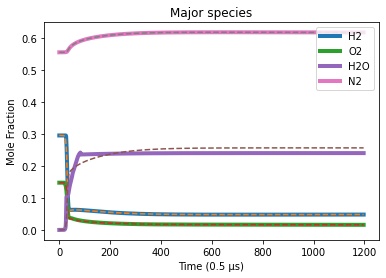

In [15]:
num=[i for i in range(1,len(O2_test_label)+1)]
plt.plot(num, final_model.predict(X_test_dataset)[1], linewidth=4.0,label='H2')#,color='cyan')
plt.plot(num, H2_test_label,linestyle='--')#, color='red')

plt.plot(num, final_model.predict(X_test_dataset)[2], linewidth=4.0,label='O2')#,color='cyan')
plt.plot(num, O2_test_label,linestyle='--')#, color='red')

plt.plot(num, final_model.predict(X_test_dataset)[5], linewidth=4.0,label='H2O')#,color='cyan')
#plt.plot(num,H2O_test_label , linewidth=4.0,label='H2O')#,color='cyan')
plt.plot(num, H2O_test_label,linestyle='--')#, color='red')

plt.plot(num,final_model.predict(X_test_dataset)[9] , linewidth=4.0,label='N2')#,color='cyan')
plt.plot(num, N2_test_label,linestyle='--')#, color='red'

plt.ylabel('Mole Fraction')
#plt.ylim(0,0.3)
plt.xlabel('Time (0.5 \u03BCs)')
plt.title('Major species')
plt.legend(loc='upper right')
plt.show()

(1178, 39)


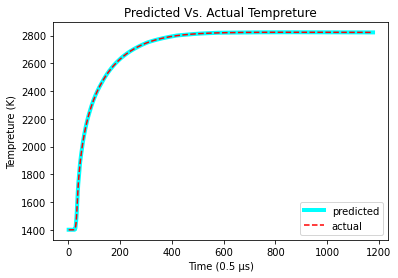

In [16]:
num=[i for i in range(1,len(O2_test_label)-18)]
#plt.plot(num, final_model.predict(X_test_dataset[0:1180-num_input+1])[0], linewidth=4.0, label='predicted',color='cyan')
plt.plot(num, final_model.predict(X_test_dataset[0:1180-num_input+1])[0], linewidth=4.0, label='predicted',color='cyan')
#plt.plot(num,T_test_label[0:1180-num_input+1],linestyle='--',label='actual', color='red')
plt.plot(num,T_test_label[0:1180-num_input+1],linestyle='--',label='actual', color='red')
print(X_test_dataset[0:1180-num_input+1].shape)


plt.ylabel('Tempreture (K)')
#plt.ylim(0,0.3)
plt.xlabel('Time (0.5 \u03BCs)')
plt.title('Predicted Vs. Actual Tempreture')
plt.legend()
plt.show()

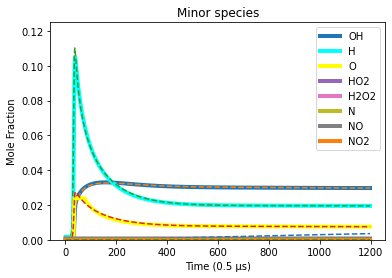

In [17]:
num=[i for i in range(1,len(O2_test_label)+1)]
plt.plot(num, final_model.predict(X_test_dataset)[3], linewidth=4.0,label='OH')#,color='cyan')
plt.plot(num, OH_test_label,linestyle='--')#, color='red')

#plt.plot(num, final_model.predict(X_test_dataset)[4], linewidth=4.0,label='H')#,color='cyan')
plt.plot(num,  final_model.predict(X_test_dataset)[4], linewidth=4.0,label='H',color='cyan')
plt.plot(num, H_test_label,linestyle='--')#, color='red')

plt.plot(num, final_model.predict(X_test_dataset)[6], linewidth=4.0,label='O',color='yellow')
plt.plot(num, O_test_label,linestyle='--')#, color='red')

plt.plot(num,final_model.predict(X_test_dataset)[7] , linewidth=4.0,label='HO2')#,color='cyan')
plt.plot(num, HO2_test_label,linestyle='--')#, color='red'


plt.plot(num,final_model.predict(X_test_dataset)[8] , linewidth=4.0,label='H2O2')#,color='cyan')
plt.plot(num, H2O2_test_label,linestyle='--')#, color='red'

plt.plot(num,final_model.predict(X_test_dataset)[10] , linewidth=4.0,label='N')#,color='cyan')
plt.plot(num, N_test_label,linestyle='--')#, color='red'

plt.plot(num,final_model.predict(X_test_dataset)[11] , linewidth=4.0,label='NO',color='gray')
plt.plot(num, NO_test_label,linestyle='--')#, color='red'

plt.plot(num,final_model.predict(X_test_dataset)[12] , linewidth=4.0,label='NO2')#,color='cyan')
plt.plot(num, NO2_test_label,linestyle='--')#, color='red'

plt.ylabel('Mole Fraction')
plt.ylim(0,0.125)
plt.xlabel('Time (0.5 \u03BCs)')
plt.title('Minor species')
plt.legend()
plt.show()

In [ ]:
new_model=tf.keras.models.load_model('/home/ali/Downloads/Codes/nrc/data/model_temporal1',compile=False)

In [18]:
final_model.predict(X_test_dataset)[5]


array([[0.00700834],
       [0.00700849],
       [0.00700852],
       ...,
       [0.27152753],
       [0.2715271 ],
       [0.27152705]], dtype=float32)